In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st

In [5]:
data = pd.read_csv('Weather.Data.csv')

In [6]:
data.head()

Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  Freezing Drizzle,Fog  
3            4.0     101.27  Freezing Drizzle,Fog  
4            4.8     101.23                   Fog

In [7]:
data.shape

(8784, 8)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [9]:
data.Weather.value_counts()

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

In [10]:
data["Date/Time"].value_counts()

1/1/2012 0:00       1
9/1/2012 3:00       1
8/31/2012 21:00     1
8/31/2012 22:00     1
8/31/2012 23:00     1
                   ..
5/1/2012 17:00      1
5/1/2012 16:00      1
5/1/2012 15:00      1
5/1/2012 14:00      1
12/31/2012 23:00    1
Name: Date/Time, Length: 8784, dtype: int64

In [11]:
data["Temp_C"].value_counts()

 16.6    65
 1.1     58
 0.8     47
 1.5     45
 19.3    44
         ..
-20.7     1
-21.0     1
 31.8     1
 32.6     1
-21.3     1
Name: Temp_C, Length: 533, dtype: int64

In [12]:
data[(data["Weather"] == "Fog") & (data["Temp_C"] < 0)]

Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0        1/1/2012 0:00    -1.8              -3.9         86                4   
1        1/1/2012 1:00    -1.8              -3.7         87                4   
4        1/1/2012 4:00    -1.5              -3.3         88                7   
5        1/1/2012 5:00    -1.4              -3.3         87                9   
6        1/1/2012 6:00    -1.5              -3.1         89                7   
7        1/1/2012 7:00    -1.4              -3.6         85                7   
8        1/1/2012 8:00    -1.4              -3.6         85                9   
9        1/1/2012 9:00    -1.3              -3.1         88               15   
10      1/1/2012 10:00    -1.0              -2.3         91                9   
11      1/1/2012 11:00    -0.5              -2.1         89                7   
12      1/1/2012 12:00    -0.2              -2.0         88                9   
166     1/7/2012 22:00    -1.5              -3.0         89                4   
514    1/22/2012 10:00   -14.5             -17.2         80                9   
515    1/22/2012 11:00   -13.0             -15.5         81                6   
797      2/3/2012 5:00   -11.2             -13.2         85                9   
1478    3/2/2012 14:00    -4.1              -6.1         86               15   
2209     4/2/2012 1:00    -0.1              -1.4         91                7   
2211     4/2/2012 3:00    -1.4              -2.8         90                0   
2212     4/2/2012 4:00    -1.2              -2.2         93                4   
7775  11/19/2012 23:00    -0.7              -2.2         90                6   
7776   11/20/2012 0:00    -3.3              -4.5         91                7   
7777   11/20/2012 1:00    -3.6              -4.3         95                7   
7778   11/20/2012 2:00    -1.8              -3.5         88                6   
7779   11/20/2012 3:00    -3.6              -4.5         93                6   
7780   11/20/2012 4:00    -2.9              -4.5         89                6   
7781   11/20/2012 5:00    -2.9              -4.5         89                6   
7782   11/20/2012 6:00    -2.9              -4.8         87                6   
7783   11/20/2012 7:00    -3.4              -5.2         87                7   
8332   12/13/2012 4:00    -5.4              -6.2         94                6   
8333   12/13/2012 5:00    -6.0              -6.8         94                4   
8334   12/13/2012 6:00    -6.4              -7.5         92                4   
8335   12/13/2012 7:00    -6.1              -7.4         90                4   
8336   12/13/2012 8:00    -6.0              -7.1         92                4   
8337   12/13/2012 9:00    -4.7              -6.0         91                4   
8338  12/13/2012 10:00    -2.3              -4.2         87                4   
8715   12/29/2012 3:00   -13.4             -15.2         86                4   
8716   12/29/2012 4:00   -16.0             -17.2         90                6   
8717   12/29/2012 5:00   -14.8             -15.9         91                4   
8718   12/29/2012 6:00   -13.8             -15.3         88                4   
8719   12/29/2012 7:00   -14.8             -16.4         88                7   
8722  12/29/2012 10:00   -12.0             -13.3         90                7   

      Visibility_km  Press_kPa Weather  
0               8.0     101.24     Fog  
1               8.0     101.24     Fog  
4               4.8     101.23     Fog  
5               6.4     101.27     Fog  
6               6.4     101.29     Fog  
7               8.0     101.26     Fog  
8               8.0     101.23     Fog  
9               4.0     101.20     Fog  
10              1.2     101.15     Fog  
11              4.0     100.98     Fog  
12              4.8     100.79     Fog  
166             4.0     100.54     Fog  
514             8.0     103.02     Fog  
515             8.0     103.04     Fog  
797             9.7     102.47     Fo

In [13]:
data[(data["Weather"] == "Fog") & (data["Temp_C"] < 0)].shape

(41, 8)

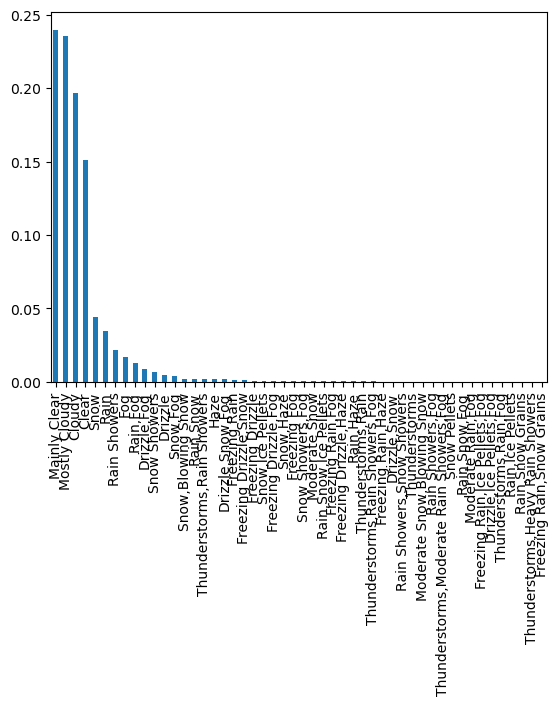

In [14]:
data["Weather"].value_counts(normalize = True).plot(kind = 'bar')
plt.show()

In [15]:
data.dropna()

Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0        1/1/2012 0:00    -1.8              -3.9         86                4   
1        1/1/2012 1:00    -1.8              -3.7         87                4   
2        1/1/2012 2:00    -1.8              -3.4         89                7   
3        1/1/2012 3:00    -1.5              -3.2         88                6   
4        1/1/2012 4:00    -1.5              -3.3         88                7   
...                ...     ...               ...        ...              ...   
8779  12/31/2012 19:00     0.1              -2.7         81               30   
8780  12/31/2012 20:00     0.2              -2.4         83               24   
8781  12/31/2012 21:00    -0.5              -1.5         93               28   
8782  12/31/2012 22:00    -0.2              -1.8         89               28   
8783  12/31/2012 23:00     0.0              -2.1         86               30   

      Visibility_km  Press_kPa               Weather  
0               8.0     101.24                   Fog  
1               8.0     101.24                   Fog  
2               4.0     101.26  Freezing Drizzle,Fog  
3               4.0     101.27  Freezing Drizzle,Fog  
4               4.8     101.23                   Fog  
...             ...        ...                   ...  
8779            9.7     100.13                  Snow  
8780            9.7     100.03                  Snow  
8781            4.8      99.95                  Snow  
8782            9.7      99.91                  Snow  
8783           11.3      99.89                  Snow  

[8784 rows x 8 columns]

In [16]:
data.Weather.value_counts()

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

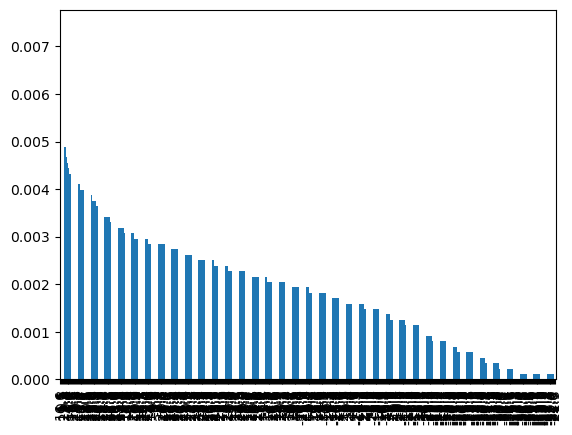

In [17]:
data["Temp_C"].value_counts(normalize = True).plot(kind = 'bar')
plt.show()

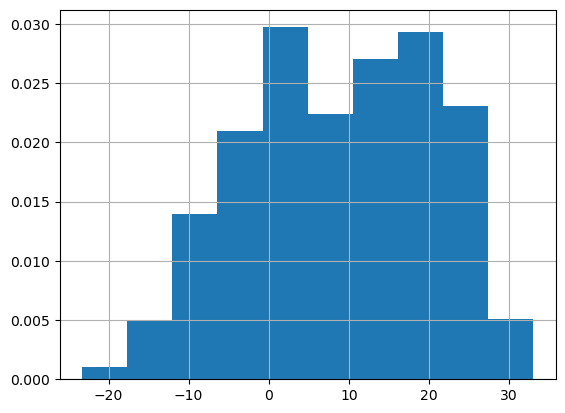

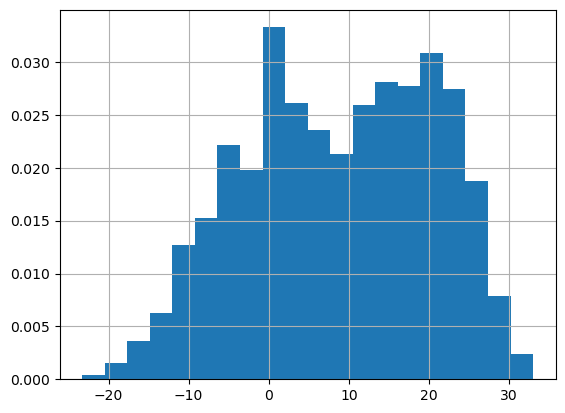

In [18]:
data['Temp_C'].hist(density=True)
plt.show()

data[data["Temp_C"].abs() < 100]["Temp_C"].hist(density=True,bins=20)
plt.show()

In [19]:
data.head()

Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  Freezing Drizzle,Fog  
3            4.0     101.27  Freezing Drizzle,Fog  
4            4.8     101.23                   Fog

In [20]:
data.rename(columns = {"Date/Time" : "Date"},inplace= True)

In [21]:
data.head()

Date  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  Freezing Drizzle,Fog  
3            4.0     101.27  Freezing Drizzle,Fog  
4            4.8     101.23                   Fog

In [22]:
data["Date"] = pd.to_datetime(data["Date"])
data["Date"] = data["Date"].dt.date
data['deuz_mois'] = [int((jour.day-1)*12/31)+1 for jour in data["Date"]]
#data['deuz_mois'] = [int((jour-1)*12/31)+1 for jour in data["Date"].dt.day]

In [23]:
effectifs = data["deuz_mois"].value_counts()
modalites = effectifs.index # l'index effectifs contien les modalités

tab = pd.DataFrame(modalites, columns = ['deuz_mois'])
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(data)
display(tab)


deuz_mois    n         f
0           1  864  0.098361
1           2  864  0.098361
2           4  864  0.098361
3           6  864  0.098361
4           7  864  0.098361
5           9  864  0.098361
6          11  864  0.098361
7           3  576  0.065574
8           5  576  0.065574
9           8  576  0.065574
10         10  576  0.065574
11         12  432  0.049180

In [24]:
tab = tab.sort_values('deuz_mois')
tab['F']=tab['f'].cumsum()
display(tab)

deuz_mois    n         f         F
0           1  864  0.098361  0.098361
1           2  864  0.098361  0.196721
7           3  576  0.065574  0.262295
2           4  864  0.098361  0.360656
8           5  576  0.065574  0.426230
3           6  864  0.098361  0.524590
4           7  864  0.098361  0.622951
9           8  576  0.065574  0.688525
5           9  864  0.098361  0.786885
10         10  576  0.065574  0.852459
6          11  864  0.098361  0.950820
11         12  432  0.049180  1.000000

In [25]:
data.head(2)

Date  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  2012-01-01    -1.8              -3.9         86                4   
1  2012-01-01    -1.8              -3.7         87                4   

   Visibility_km  Press_kPa Weather  deuz_mois  
0            8.0     101.24     Fog          1  
1            8.0     101.24     Fog          1

In [26]:
data["Temp_C"].mean()

8.798144353369764

In [27]:
data["Temp_C"].var()

136.60660363804504

In [28]:
data["Temp_C"].std()

11.687882769691226

In [29]:
data["Temp_C"].mode()

0    16.6
Name: Temp_C, dtype: float64

In [30]:
data["Temp_C"].median()

9.3

In [31]:
ecarttype = np.sqrt(data["Temp_C"].var())

In [32]:
print("l'ecart_type est : ",ecarttype)

l'ecart_type est :  11.687882769691226


In [33]:
np.sqrt(data["Temp_C"].var())
data.head()

Date  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  2012-01-01    -1.8              -3.9         86                4   
1  2012-01-01    -1.8              -3.7         87                4   
2  2012-01-01    -1.8              -3.4         89                7   
3  2012-01-01    -1.5              -3.2         88                6   
4  2012-01-01    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  deuz_mois  
0            8.0     101.24                   Fog          1  
1            8.0     101.24                   Fog          1  
2            4.0     101.26  Freezing Drizzle,Fog          1  
3            4.0     101.27  Freezing Drizzle,Fog          1  
4            4.8     101.23                   Fog          1

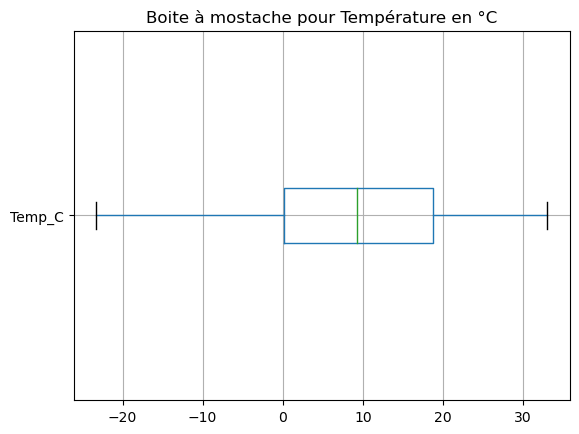

In [34]:
data.boxplot(column = "Temp_C" , vert = False)
plt.title('Boite à mostache pour Température en °C')
plt.show()

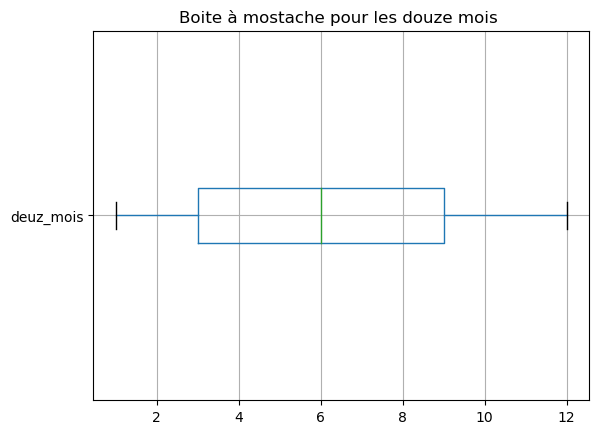

In [35]:
data.boxplot(column = ["deuz_mois"] , vert = False)
plt.title('Boite à mostache pour les douze mois ')
plt.show()

In [36]:
data.head()

Date  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  2012-01-01    -1.8              -3.9         86                4   
1  2012-01-01    -1.8              -3.7         87                4   
2  2012-01-01    -1.8              -3.4         89                7   
3  2012-01-01    -1.5              -3.2         88                6   
4  2012-01-01    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  deuz_mois  
0            8.0     101.24                   Fog          1  
1            8.0     101.24                   Fog          1  
2            4.0     101.26  Freezing Drizzle,Fog          1  
3            4.0     101.27  Freezing Drizzle,Fog          1  
4            4.8     101.23                   Fog          1

--------------------
Fog
moy:
 4.303333333333335
med:
 2.6500000000000004
mod:
 0    0.8
Name: Temp_C, dtype: float64
var:
 65.05897522522524
ect:
 8.06591440725881
cv:
 1.874341070625594


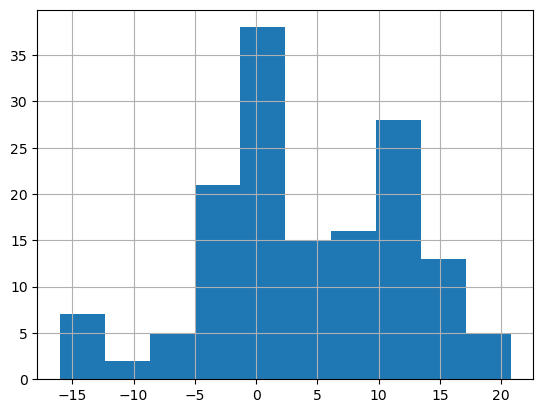

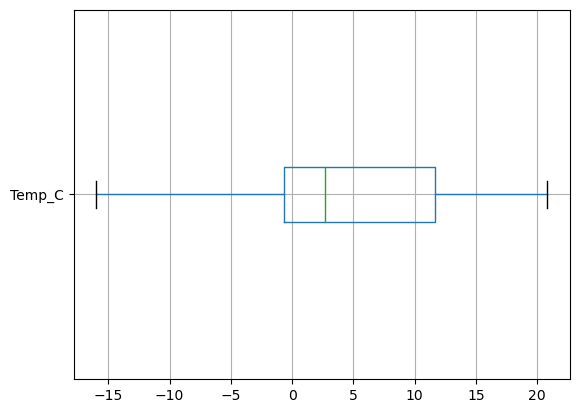

--------------------
Freezing Drizzle,Fog
moy:
 -2.5333333333333337
med:
 -1.85
mod:
 0   -6.4
1   -3.3
2   -1.9
3   -1.8
4   -1.5
5   -0.3
Name: Temp_C, dtype: float64
var:
 5.633333333333335
ect:
 2.37346441585572
cv:
 -0.9368938483640998


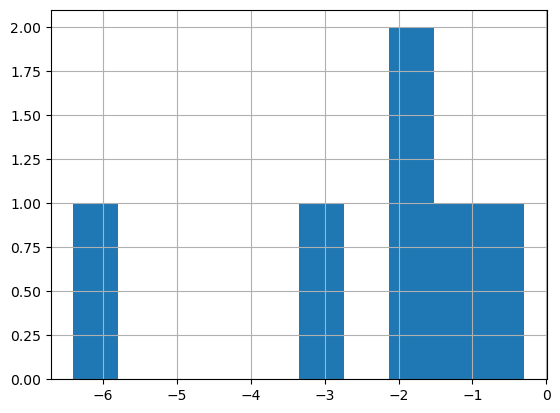

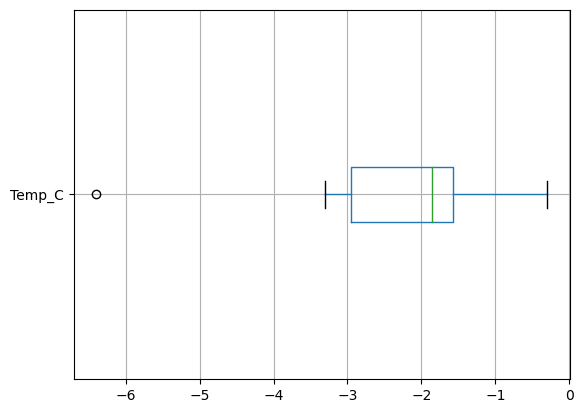

--------------------
Mostly Cloudy
moy:
 10.57428709521508
med:
 11.8
mod:
 0     1.9
1    14.2
Name: Temp_C, dtype: float64
var:
 128.04225064028293
ect:
 11.315575577065575
cv:
 1.0701029275236844


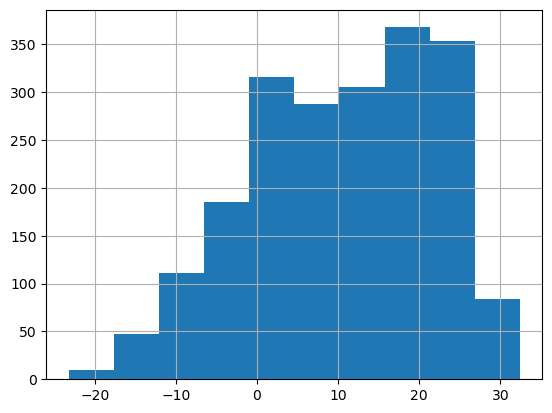

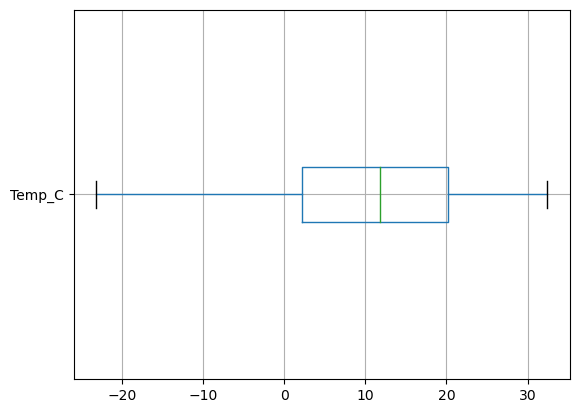

--------------------
Cloudy
moy:
 7.970543981481482
med:
 7.35
mod:
 0    3.7
Name: Temp_C, dtype: float64
var:
 121.07633295982463
ect:
 11.003469132951873
cv:
 1.3805167073310174


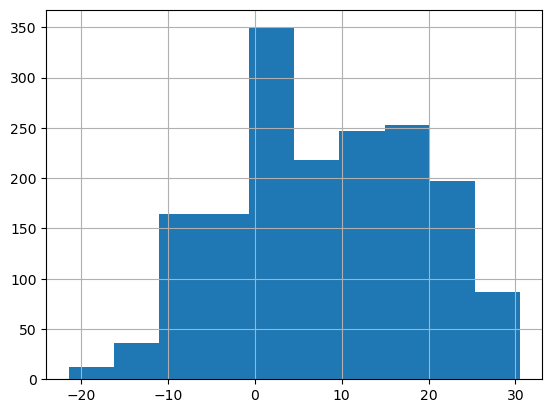

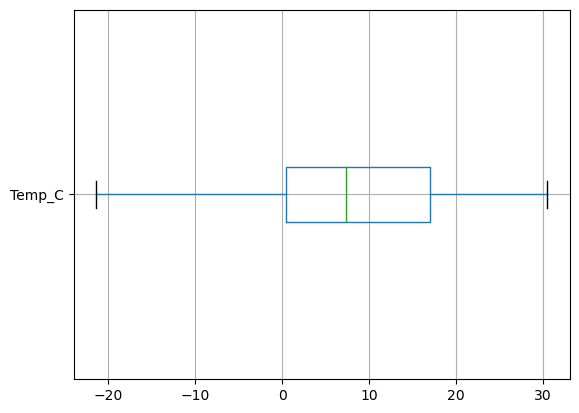

--------------------
Rain
moy:
 9.78627450980392
med:
 8.9
mod:
 0    1.5
Name: Temp_C, dtype: float64
var:
 41.14823142414863
ect:
 6.414688723870289
cv:
 0.65547811043355


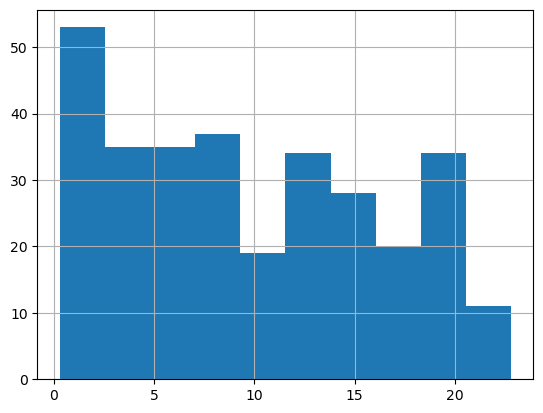

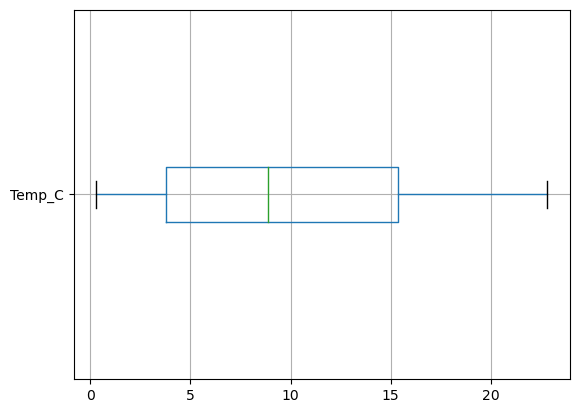

--------------------
Rain Showers
moy:
 13.722340425531916
med:
 14.95
mod:
 0     5.3
1     5.5
2    20.4
Name: Temp_C, dtype: float64
var:
 48.948312743079384
ect:
 6.996307078958112
cv:
 0.5098479459043821


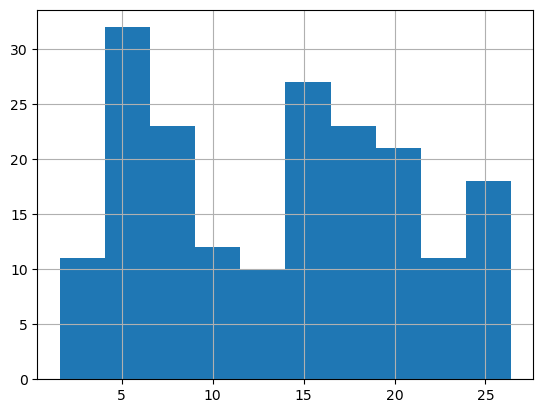

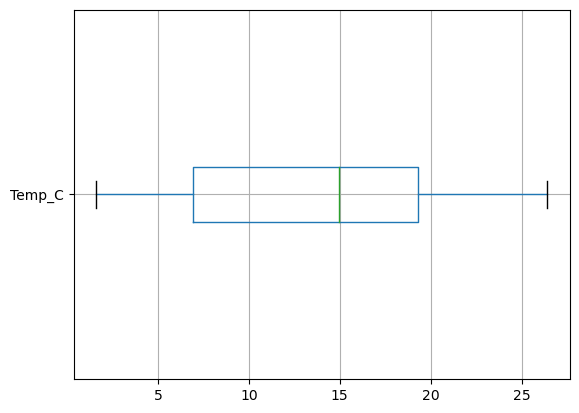

--------------------
Mainly Clear
moy:
 12.558926875593542
med:
 15.8
mod:
 0    16.6
Name: Temp_C, dtype: float64
var:
 152.56550245947628
ect:
 12.351740867565036
cv:
 0.9835028892133179


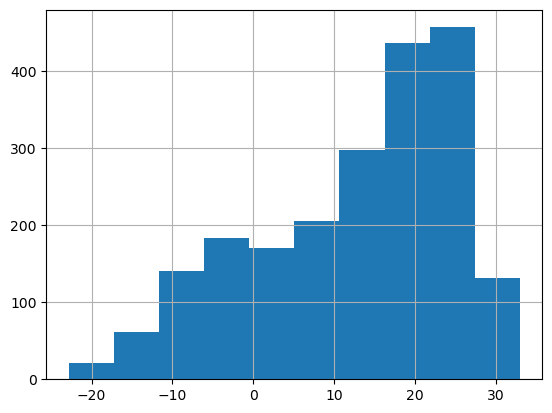

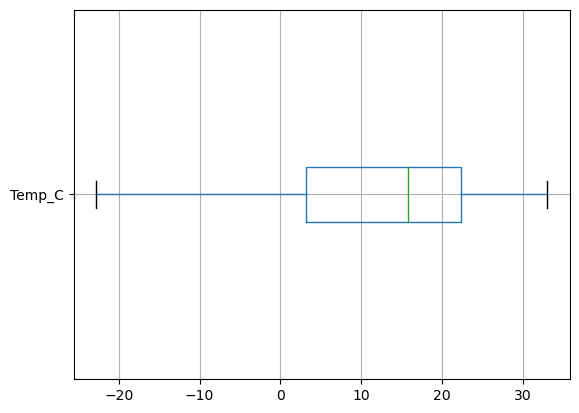

--------------------
Snow Showers
moy:
 -3.506666666666667
med:
 -3.7
mod:
 0   -9.0
1   -5.6
2   -0.2
3    1.0
4    1.1
5    1.5
6    1.6
7    1.8
Name: Temp_C, dtype: float64
var:
 19.00857471264369
ect:
 4.359882419589281
cv:
 -1.2433124770691866


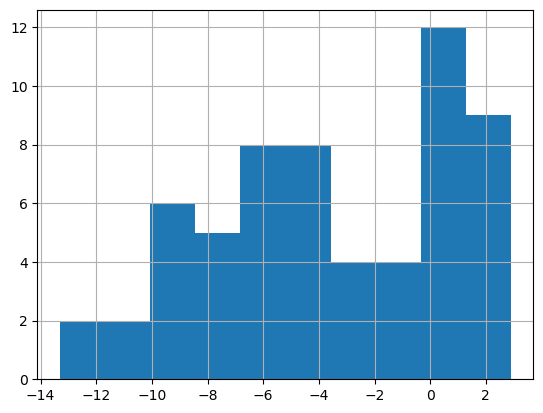

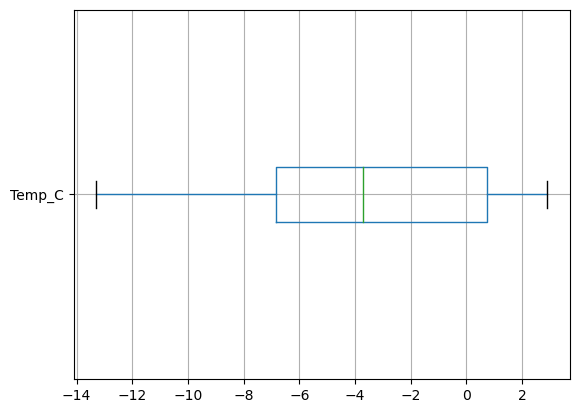

--------------------
Snow
moy:
 -4.524102564102565
med:
 -4.8
mod:
 0   -7.1
1   -5.0
2   -3.7
Name: Temp_C, dtype: float64
var:
 17.31214803066349
ect:
 4.160786948482642
cv:
 -0.9196933291250453


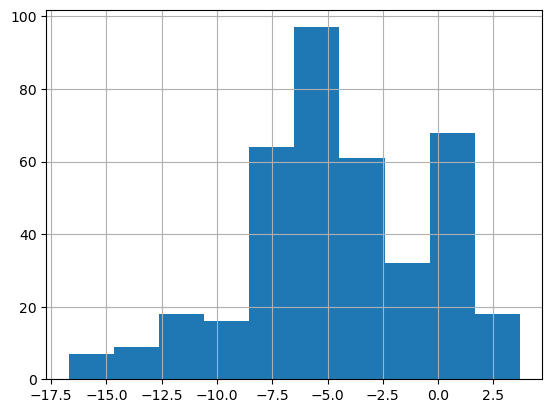

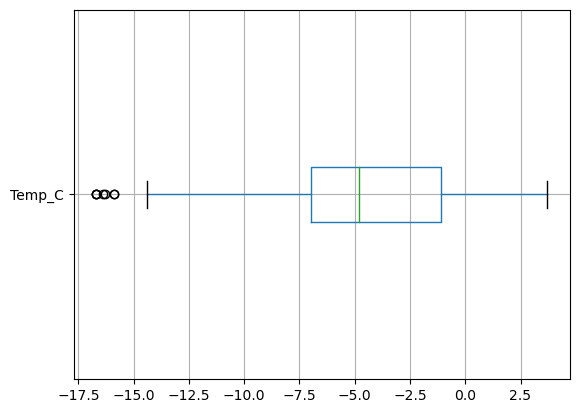

--------------------
Clear
moy:
 6.825716440422324
med:
 7.5
mod:
 0    16.6
Name: Temp_C, dtype: float64
var:
 147.2969585116175
ect:
 12.136595837038387
cv:
 1.7780691511245177


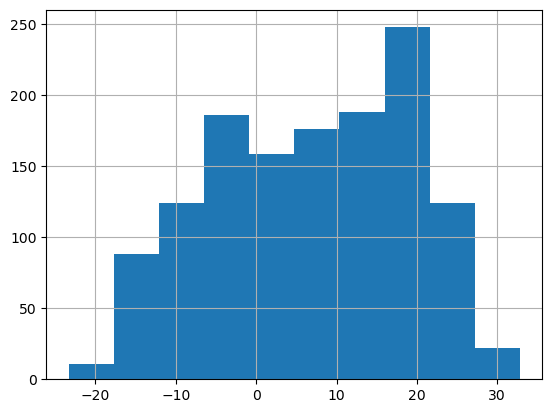

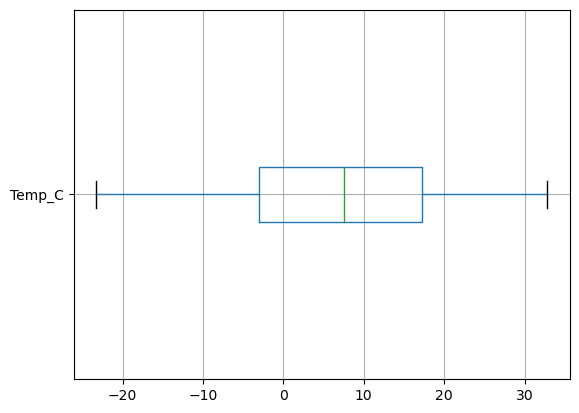

--------------------
Freezing Rain,Fog
moy:
 -2.2249999999999996
med:
 -1.45
mod:
 0   -6.1
1   -2.3
2   -0.6
3    0.1
Name: Temp_C, dtype: float64
var:
 11.53375
ect:
 3.3961375119391146
cv:
 -1.526353937950164


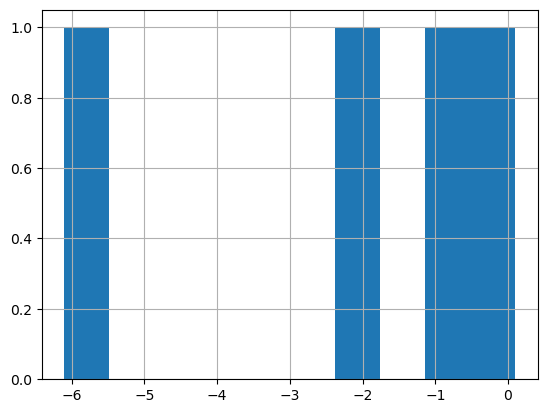

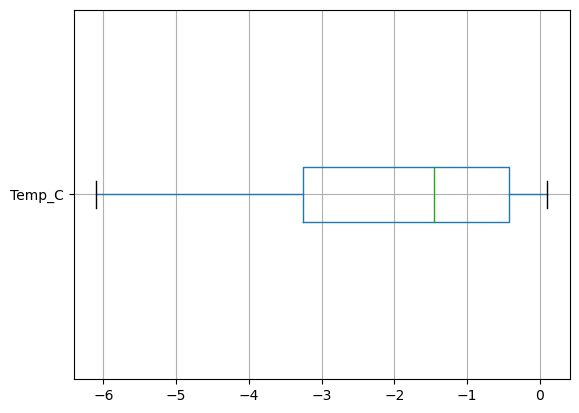

--------------------
Freezing Rain
moy:
 -3.8857142857142857
med:
 -4.8
mod:
 0   -4.8
Name: Temp_C, dtype: float64
var:
 4.833095238095238
ect:
 2.1984301758516778
cv:
 -0.5657724717265348


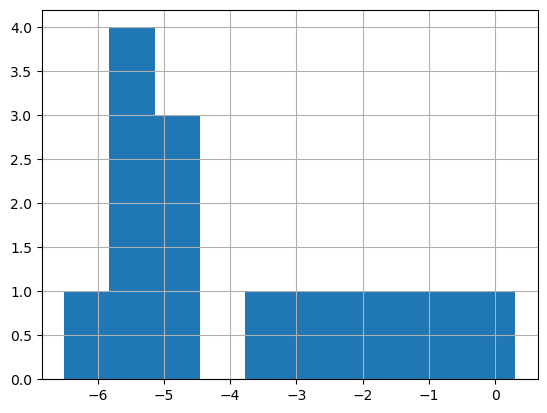

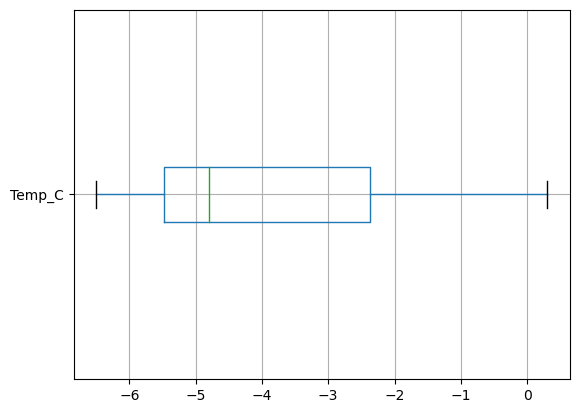

--------------------
Freezing Drizzle
moy:
 -5.657142857142857
med:
 -5.5
mod:
 0   -9.0
1   -6.8
2   -5.8
3   -5.5
4   -5.4
5   -4.8
6   -2.3
Name: Temp_C, dtype: float64
var:
 4.919428571428571
ect:
 2.2179784875937303
cv:
 -0.39206690437262914


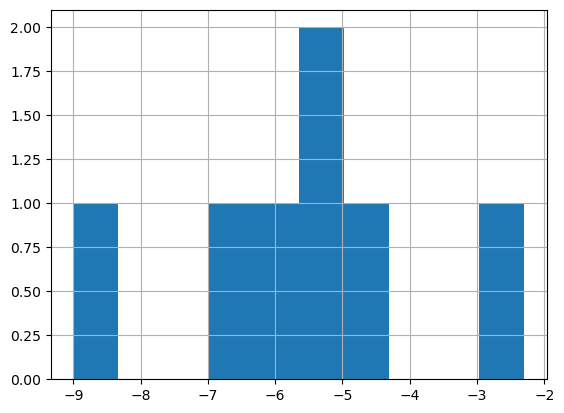

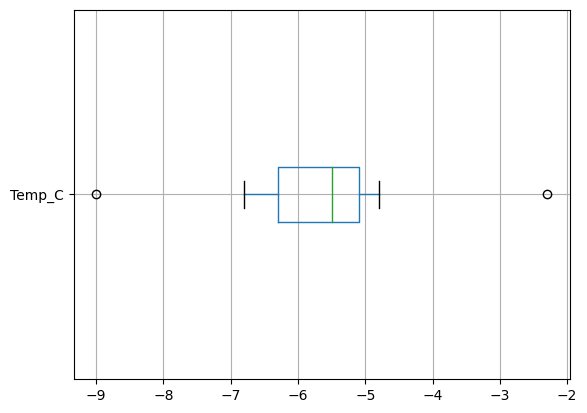

--------------------
Rain,Snow
moy:
 1.0555555555555556
med:
 1.05
mod:
 0    0.8
Name: Temp_C, dtype: float64
var:
 0.08277777777777774
ect:
 0.28771127502720106
cv:
 0.2725685763415589


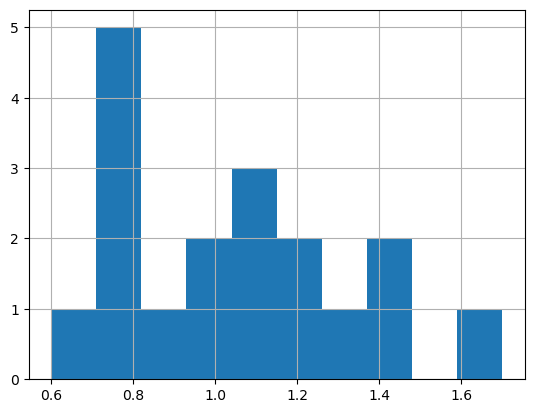

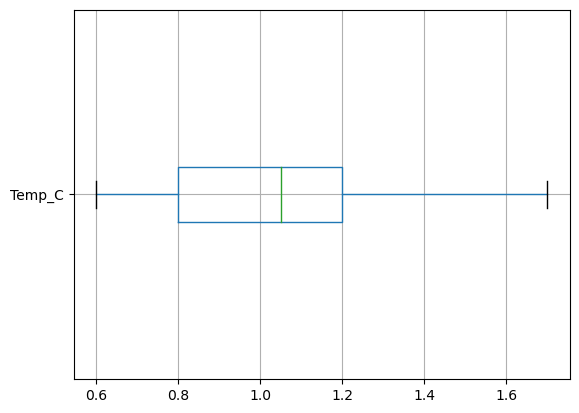

--------------------
Moderate Snow
moy:
 -5.525
med:
 -5.45
mod:
 0   -6.3
1   -5.7
2   -5.2
3   -4.9
Name: Temp_C, dtype: float64
var:
 0.5637499999999996
ect:
 0.75083287088406
cv:
 -0.13589735219620996


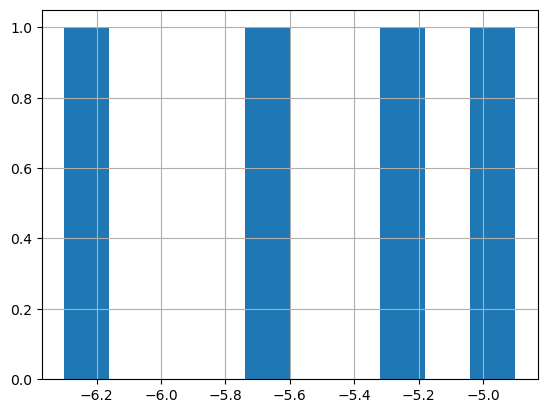

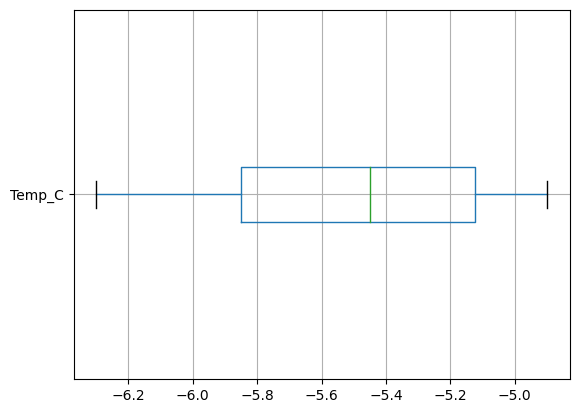

--------------------
Freezing Drizzle,Snow
moy:
 -5.1090909090909085
med:
 -4.4
mod:
 0    -8.3
1    -7.7
2    -6.8
3    -5.2
4    -4.5
5    -4.4
6    -4.3
7    -4.2
8    -3.8
9    -3.7
10   -3.3
Name: Temp_C, dtype: float64
var:
 3.2321212121212124
ect:
 1.7978101157022153
cv:
 -0.3518845422192948


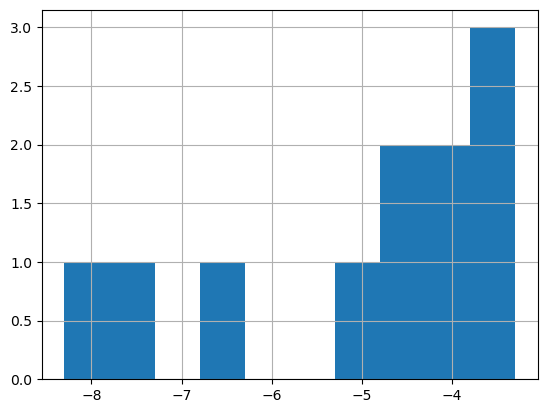

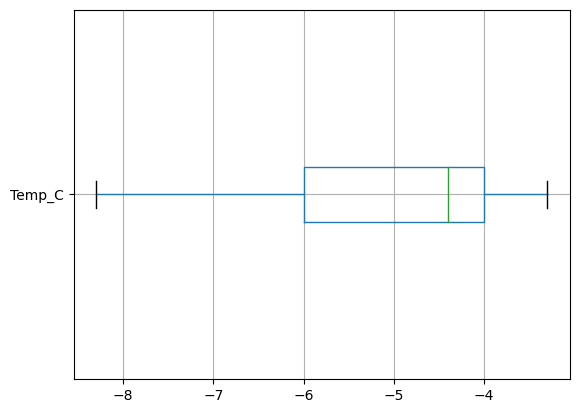

--------------------
Freezing Rain,Snow Grains
moy:
 -5.0
med:
 -5.0
mod:
 0   -5.0
Name: Temp_C, dtype: float64
var:
 nan
ect:
 nan
cv:
 nan


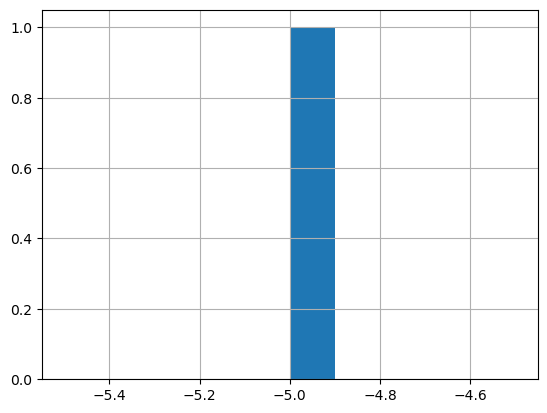

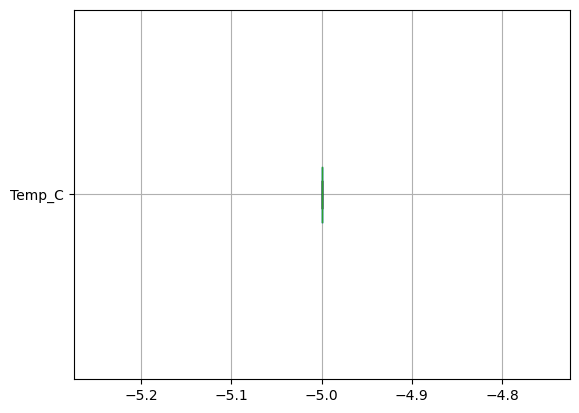

--------------------
Snow,Blowing Snow
moy:
 -5.4105263157894745
med:
 -5.0
mod:
 0   -5.4
1   -5.2
2   -5.0
3   -1.4
Name: Temp_C, dtype: float64
var:
 8.630464396284829
ect:
 2.9377652044172673
cv:
 -0.542972168131596


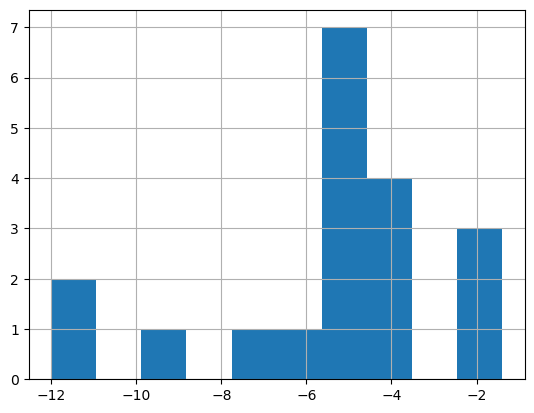

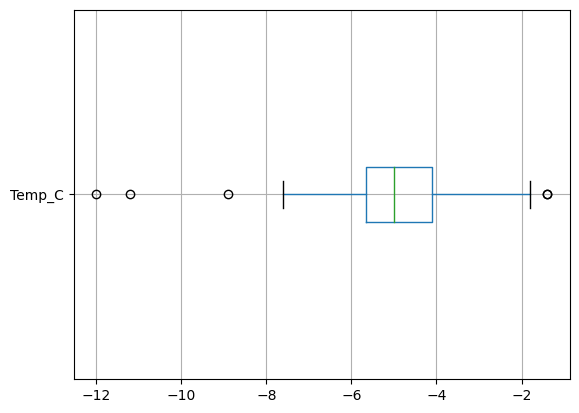

--------------------
Freezing Fog
moy:
 -7.575000000000001
med:
 -5.6
mod:
 0   -0.1
Name: Temp_C, dtype: float64
var:
 127.35375
ect:
 11.285111873614722
cv:
 -1.4897837456917122


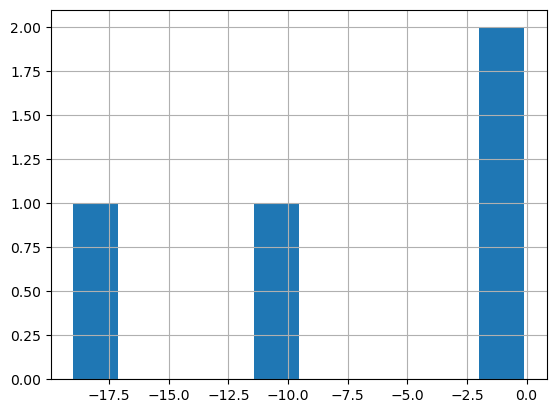

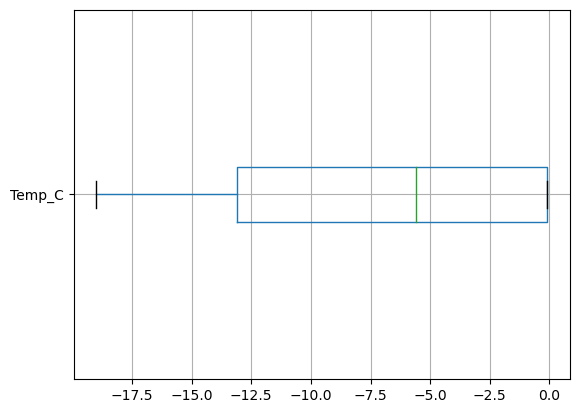

--------------------
Haze
moy:
 -0.19999999999999996
med:
 -0.25
mod:
 0   -0.7
Name: Temp_C, dtype: float64
var:
 42.42428571428571
ect:
 6.513392795946342
cv:
 -32.56696397973172


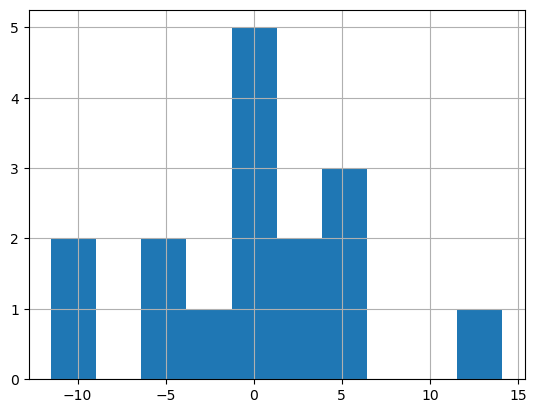

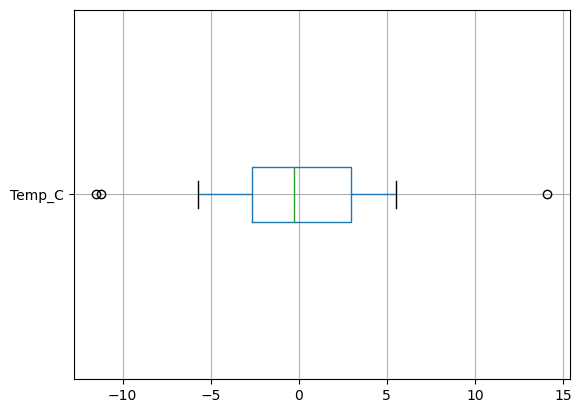

--------------------
Rain,Fog
moy:
 8.273275862068965
med:
 7.9
mod:
 0    1.1
Name: Temp_C, dtype: float64
var:
 36.76760662431943
ect:
 6.063629822500664
cv:
 0.7329176403147619


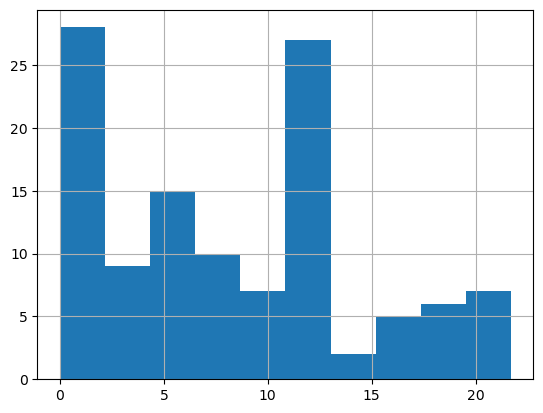

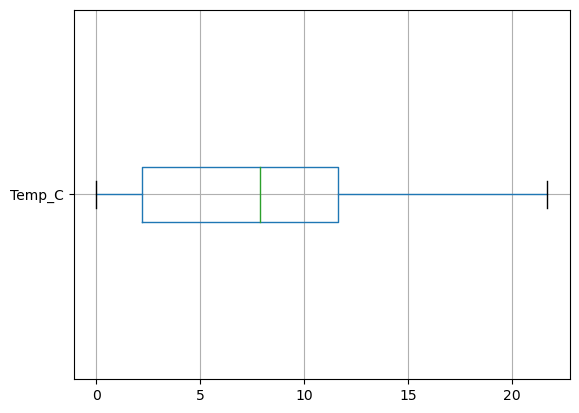

--------------------
Drizzle,Fog
moy:
 8.067499999999999
med:
 9.149999999999999
mod:
 0    3.8
Name: Temp_C, dtype: float64
var:
 25.020455128205136
ect:
 5.00204509457933
cv:
 0.6200241827802083


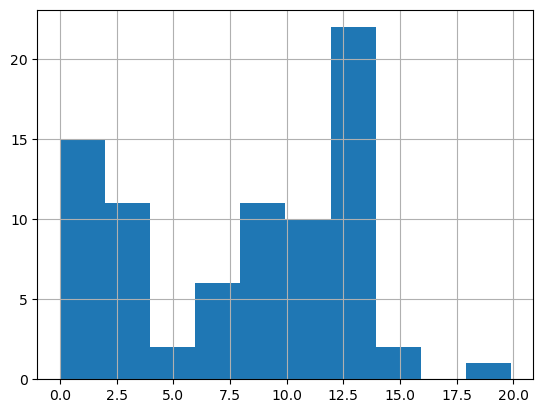

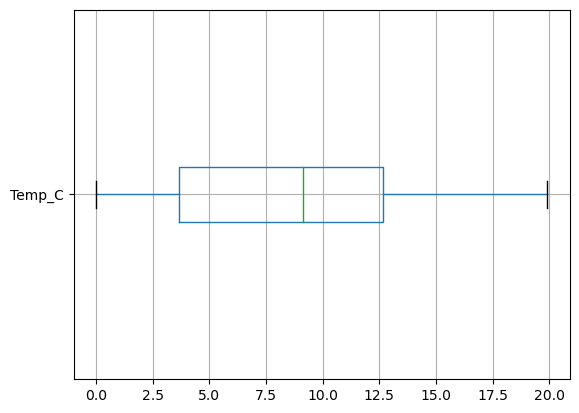

--------------------
Drizzle
moy:
 7.353658536585366
med:
 5.4
mod:
 0    1.3
Name: Temp_C, dtype: float64
var:
 28.7790243902439
ect:
 5.364608502979868
cv:
 0.7295155841531495


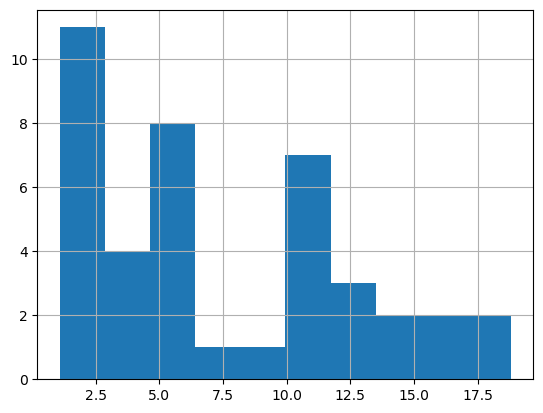

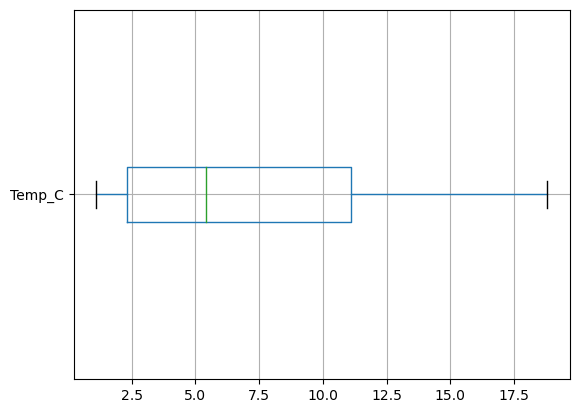

--------------------
Freezing Drizzle,Haze
moy:
 -5.433333333333334
med:
 -5.5
mod:
 0   -5.8
1   -5.5
2   -5.0
Name: Temp_C, dtype: float64
var:
 0.32666666666666655
ect:
 0.5715476066494081
cv:
 -0.10519281103976835


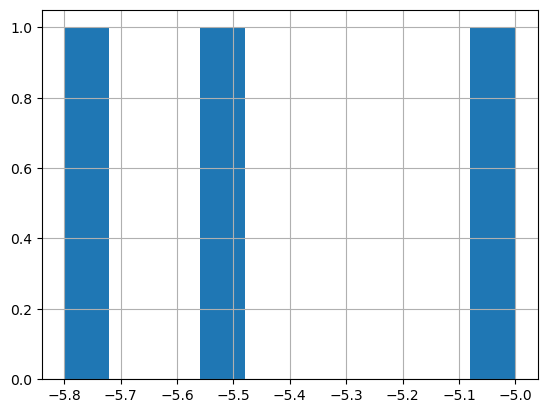

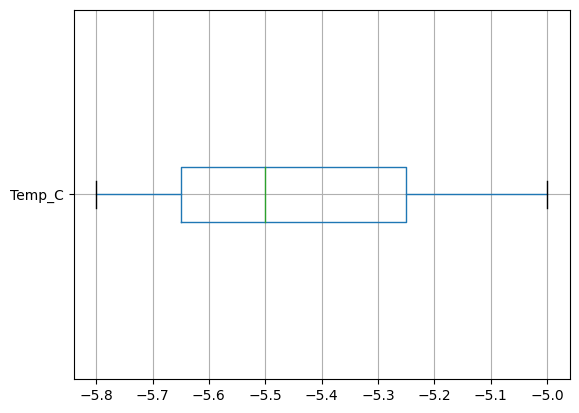

--------------------
Freezing Rain,Haze
moy:
 -4.9
med:
 -4.9
mod:
 0   -4.9
Name: Temp_C, dtype: float64
var:
 nan
ect:
 nan
cv:
 nan


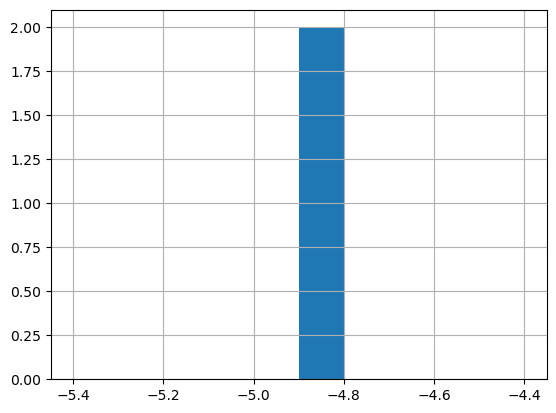

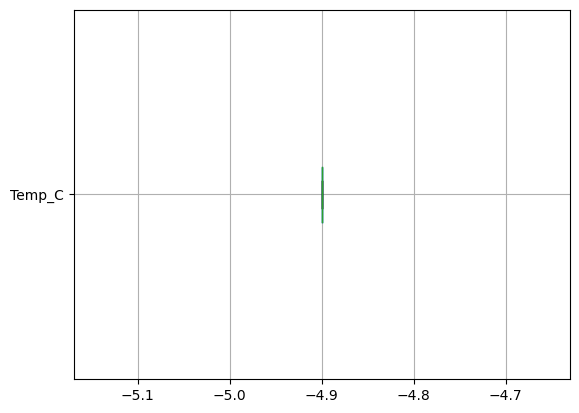

--------------------
Snow,Haze
moy:
 -4.0200000000000005
med:
 -4.0
mod:
 0   -4.3
Name: Temp_C, dtype: float64
var:
 0.11599999999999992
ect:
 0.34058772731852793
cv:
 -0.08472331525336514


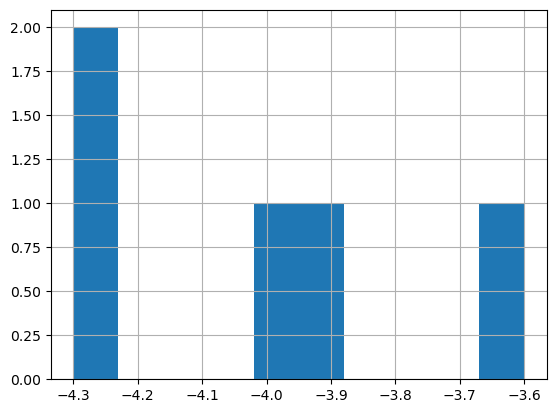

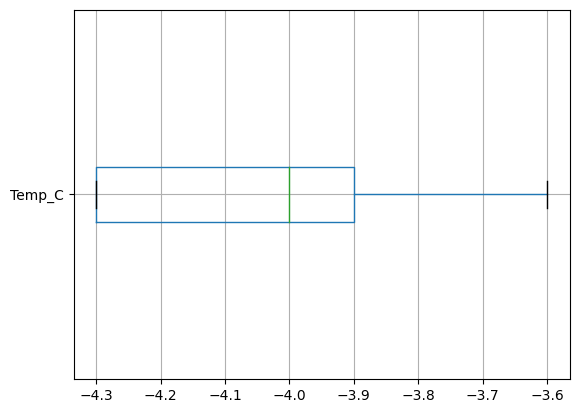

--------------------
Snow,Fog
moy:
 -5.075675675675677
med:
 -7.4
mod:
 0   -9.3
Name: Temp_C, dtype: float64
var:
 22.41966023166023
ect:
 4.73494036199615
cv:
 -0.9328689744081871


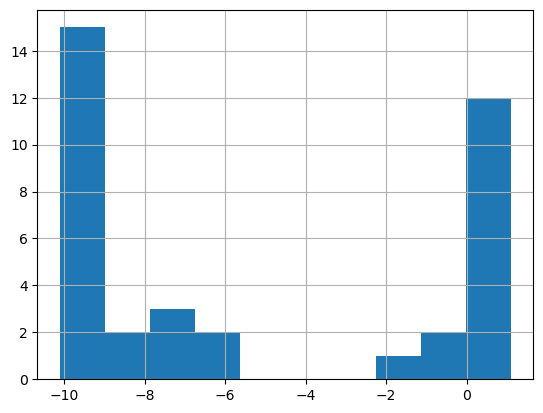

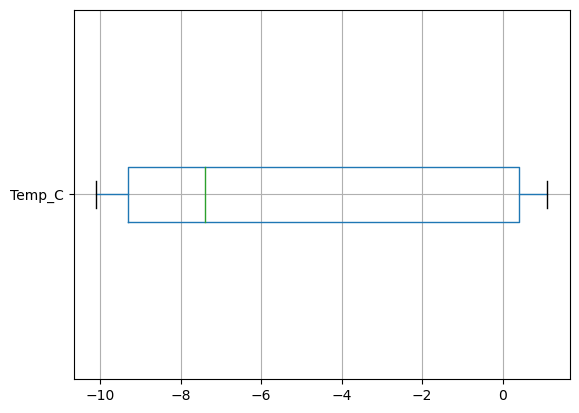

--------------------
Snow,Ice Pellets
moy:
 -1.883333333333333
med:
 -2.55
mod:
 0   -3.0
Name: Temp_C, dtype: float64
var:
 5.087083333333333
ect:
 2.2554563470245514
cv:
 -1.197587440897992


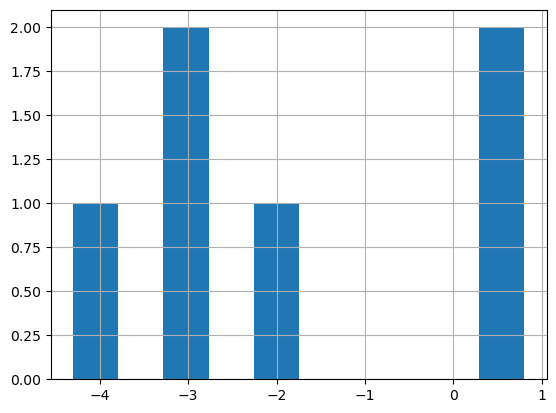

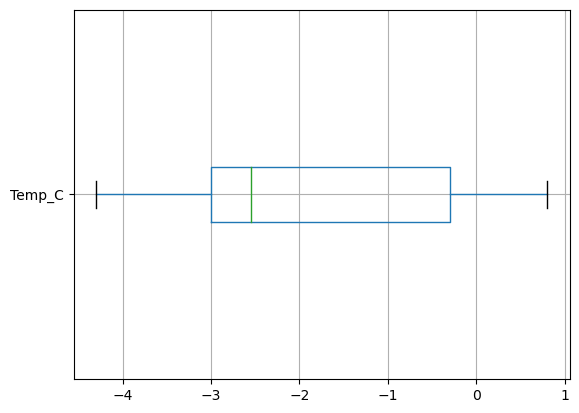

--------------------
Rain,Haze
moy:
 4.633333333333334
med:
 4.4
mod:
 0    4.0
1    4.4
2    5.5
Name: Temp_C, dtype: float64
var:
 1.2066666666666666
ect:
 1.098483803552272
cv:
 0.23708283529905147


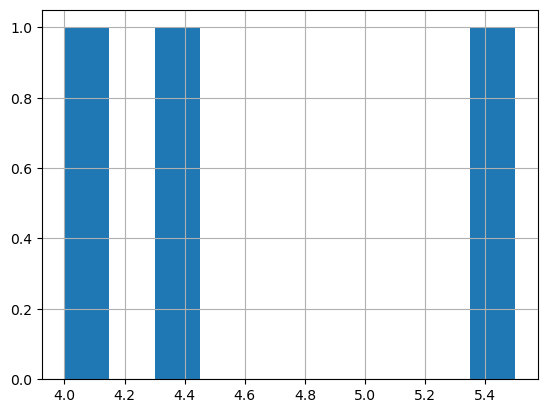

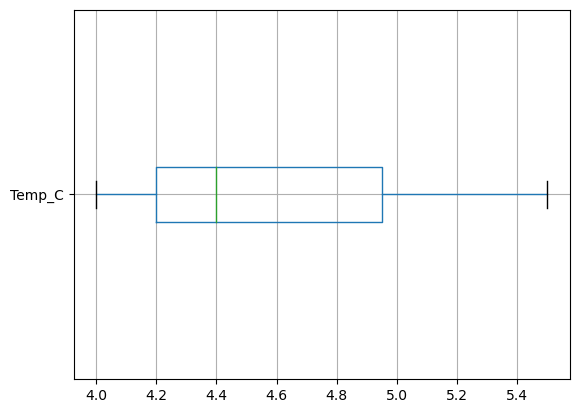

--------------------
Thunderstorms,Rain
moy:
 20.433333333333334
med:
 20.6
mod:
 0    19.4
1    20.6
2    21.3
Name: Temp_C, dtype: float64
var:
 1.8466666666666713
ect:
 1.3589211407093023
cv:
 0.06650511292215182


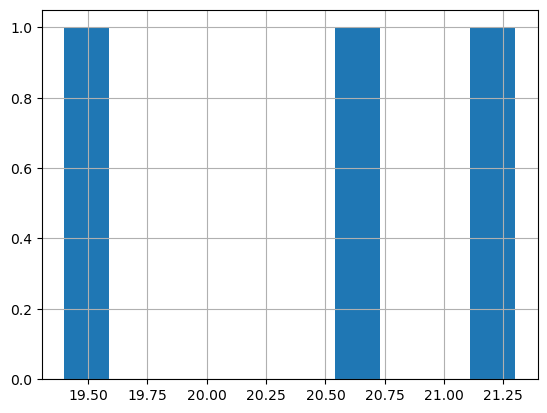

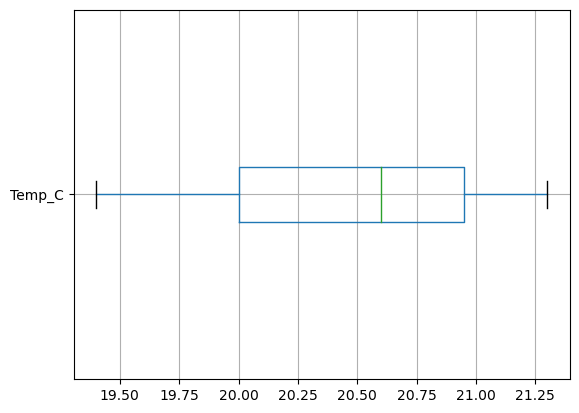

--------------------
Thunderstorms,Rain Showers
moy:
 20.037499999999998
med:
 20.85
mod:
 0     11.0
1     11.4
2     16.5
3     18.1
4     18.7
5     19.7
6     20.2
7     20.7
8     21.0
9     21.6
10    21.9
11    22.7
12    22.8
13    23.8
14    25.0
15    25.5
Name: Temp_C, dtype: float64
var:
 18.935535714285717
ect:
 4.351498099997944
cv:
 0.21716771553327233


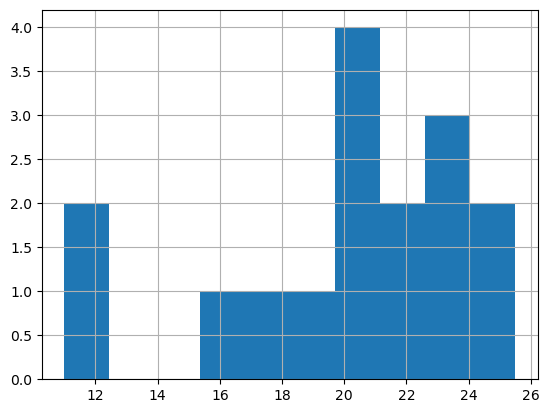

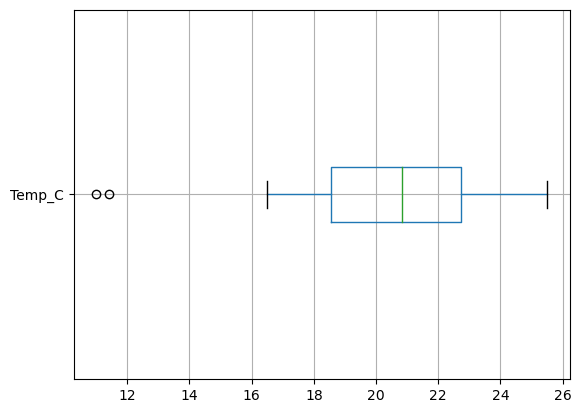

--------------------
Thunderstorms,Heavy Rain Showers
moy:
 10.9
med:
 10.9
mod:
 0    10.9
Name: Temp_C, dtype: float64
var:
 nan
ect:
 nan
cv:
 nan


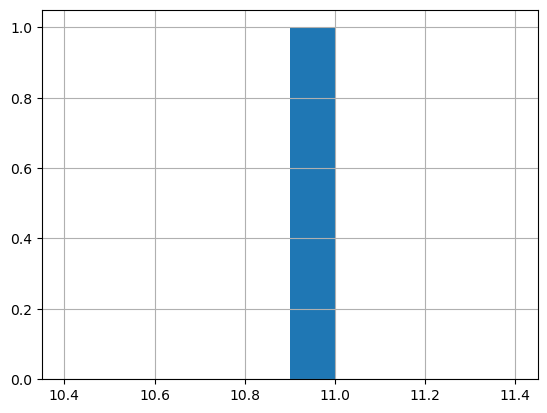

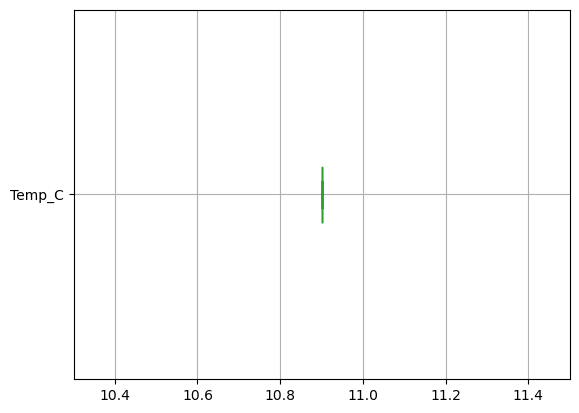

--------------------
Thunderstorms,Rain Showers,Fog
moy:
 21.599999999999998
med:
 22.4
mod:
 0    19.5
1    22.4
2    22.9
Name: Temp_C, dtype: float64
var:
 6.739999999999995
ect:
 2.596150997149433
cv:
 0.12019217579395525


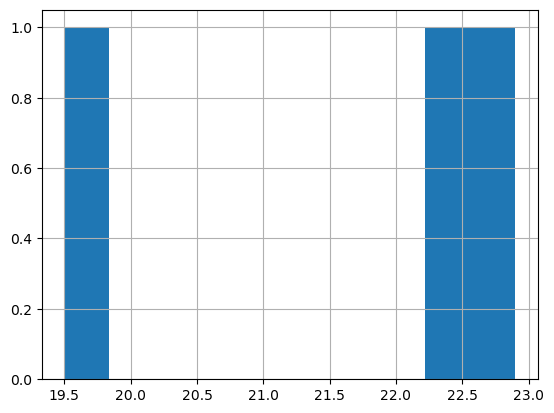

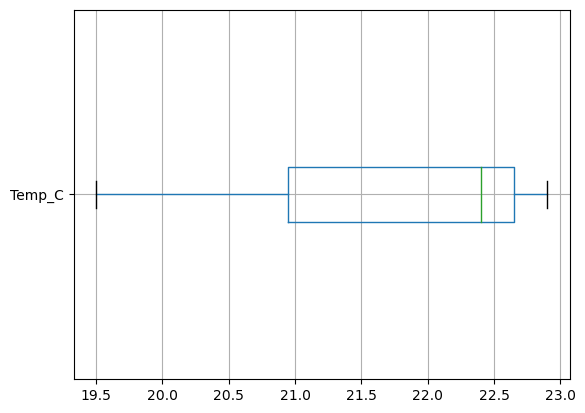

--------------------
Thunderstorms
moy:
 24.15
med:
 24.15
mod:
 0    21.6
1    26.7
Name: Temp_C, dtype: float64
var:
 nan
ect:
 nan
cv:
 nan


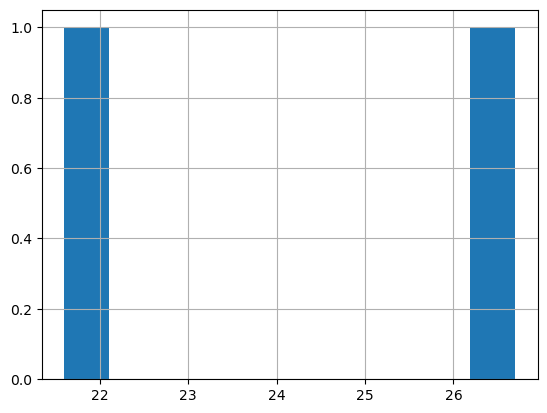

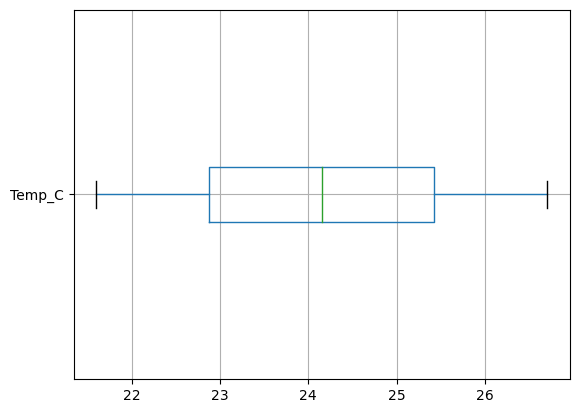

--------------------
Thunderstorms,Rain,Fog
moy:
 20.6
med:
 20.6
mod:
 0    20.6
Name: Temp_C, dtype: float64
var:
 nan
ect:
 nan
cv:
 nan


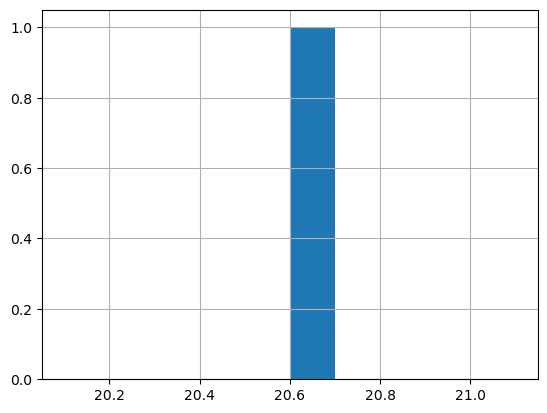

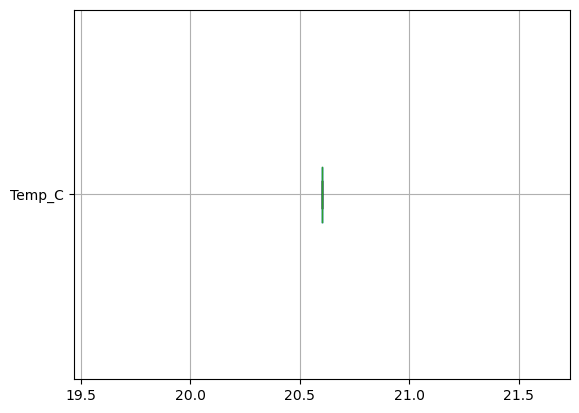

--------------------
Thunderstorms,Moderate Rain Showers,Fog
moy:
 19.6
med:
 19.6
mod:
 0    19.6
Name: Temp_C, dtype: float64
var:
 nan
ect:
 nan
cv:
 nan


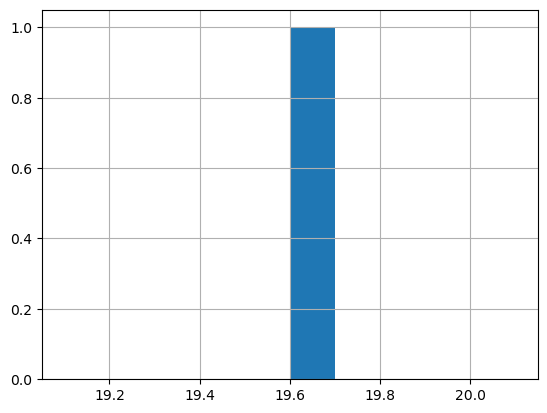

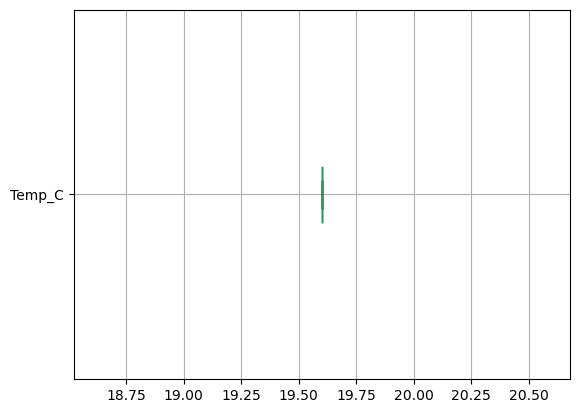

--------------------
Rain Showers,Fog
moy:
 12.8
med:
 12.8
mod:
 0    12.8
Name: Temp_C, dtype: float64
var:
 nan
ect:
 nan
cv:
 nan


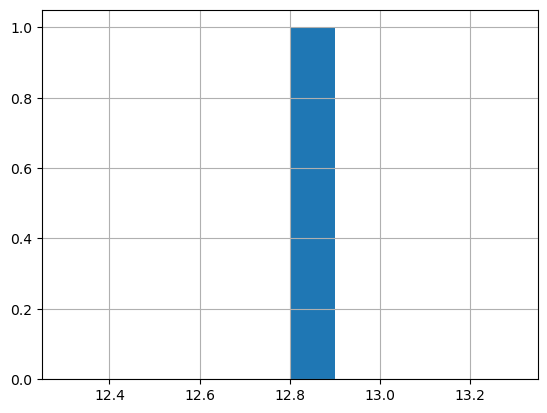

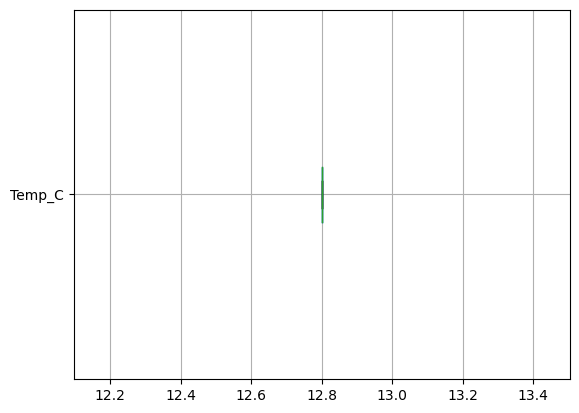

--------------------
Rain Showers,Snow Showers
moy:
 2.1500000000000004
med:
 2.1500000000000004
mod:
 0    2.1
1    2.2
Name: Temp_C, dtype: float64
var:
 nan
ect:
 nan
cv:
 nan


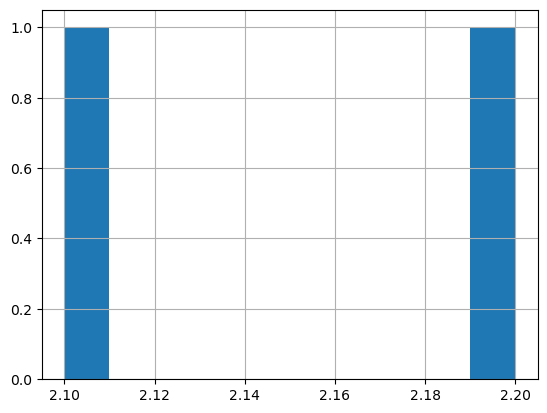

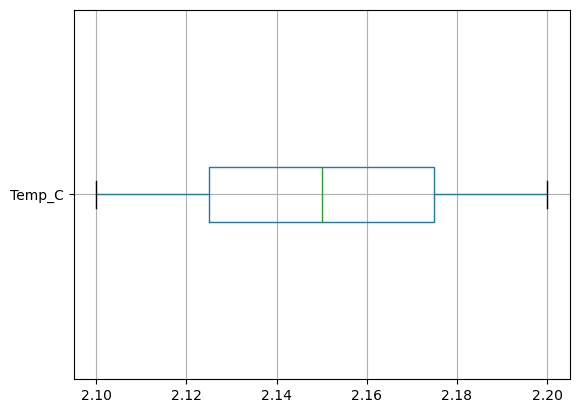

--------------------
Snow Pellets
moy:
 0.7
med:
 0.7
mod:
 0    0.7
Name: Temp_C, dtype: float64
var:
 nan
ect:
 nan
cv:
 nan


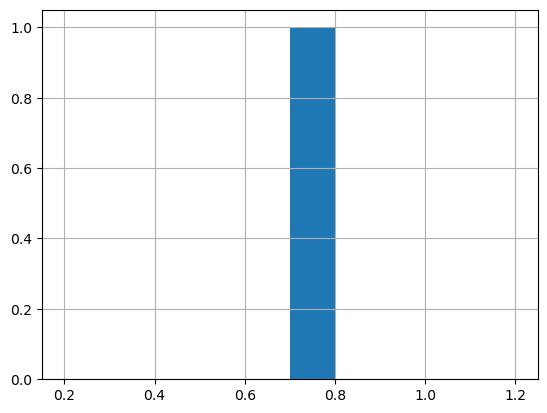

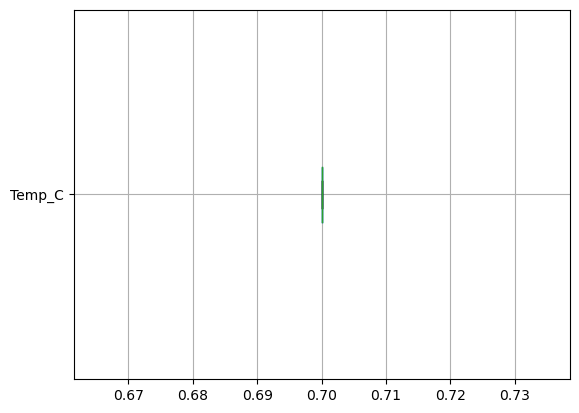

--------------------
Rain,Snow,Fog
moy:
 0.8
med:
 0.8
mod:
 0    0.8
Name: Temp_C, dtype: float64
var:
 nan
ect:
 nan
cv:
 nan


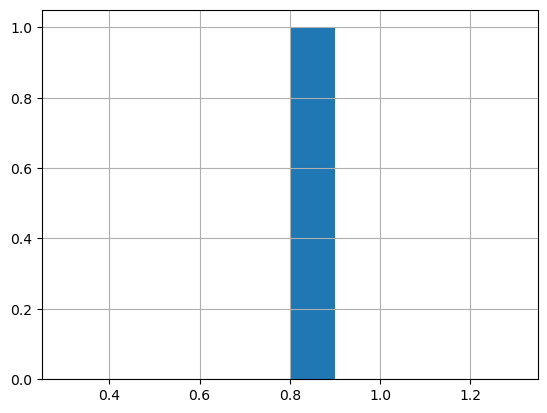

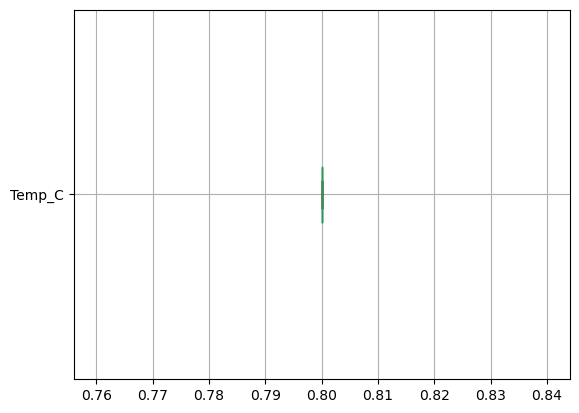

--------------------
Moderate Rain,Fog
moy:
 1.7
med:
 1.7
mod:
 0    1.7
Name: Temp_C, dtype: float64
var:
 nan
ect:
 nan
cv:
 nan


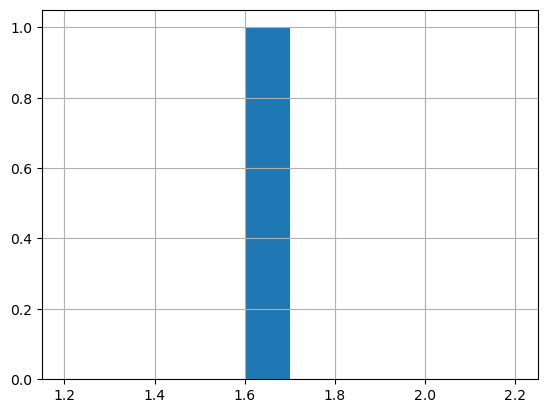

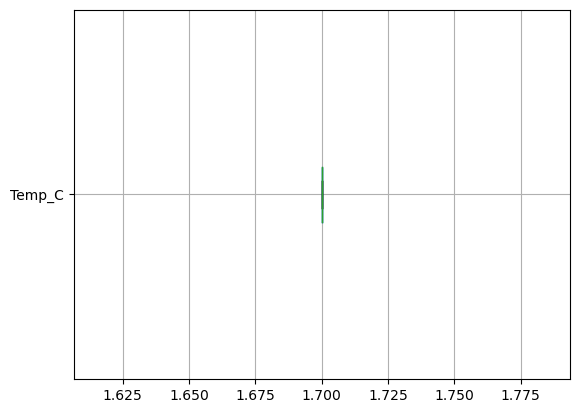

--------------------
Freezing Rain,Ice Pellets,Fog
moy:
 -2.6
med:
 -2.6
mod:
 0   -2.6
Name: Temp_C, dtype: float64
var:
 nan
ect:
 nan
cv:
 nan


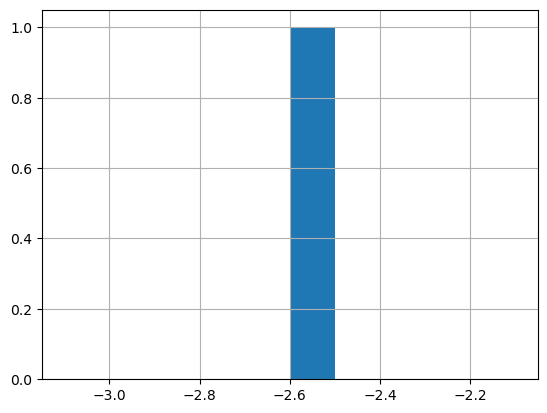

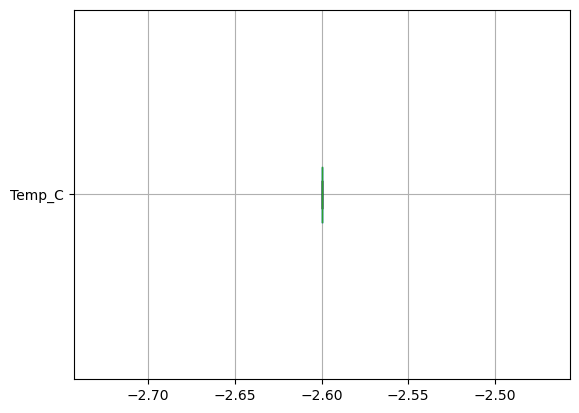

--------------------
Drizzle,Ice Pellets,Fog
moy:
 0.4
med:
 0.4
mod:
 0    0.4
Name: Temp_C, dtype: float64
var:
 nan
ect:
 nan
cv:
 nan


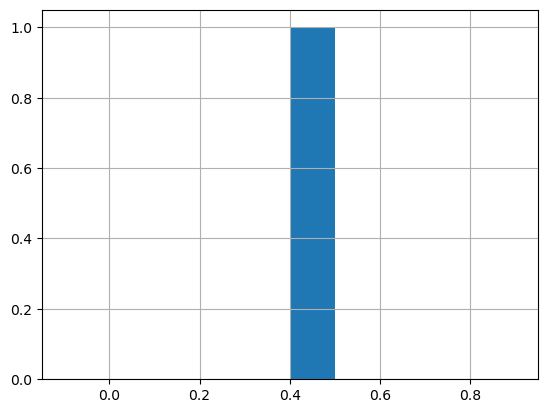

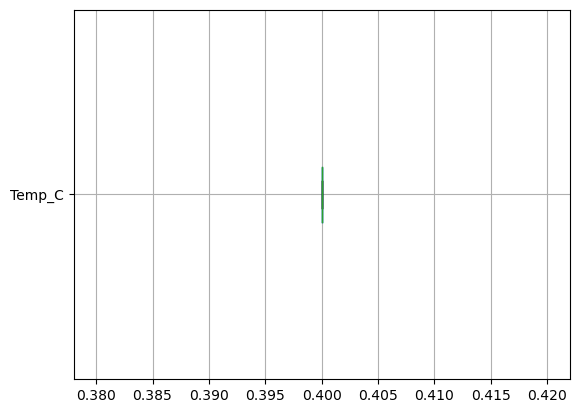

--------------------
Drizzle,Snow
moy:
 1.05
med:
 1.05
mod:
 0    0.9
1    1.2
Name: Temp_C, dtype: float64
var:
 nan
ect:
 nan
cv:
 nan


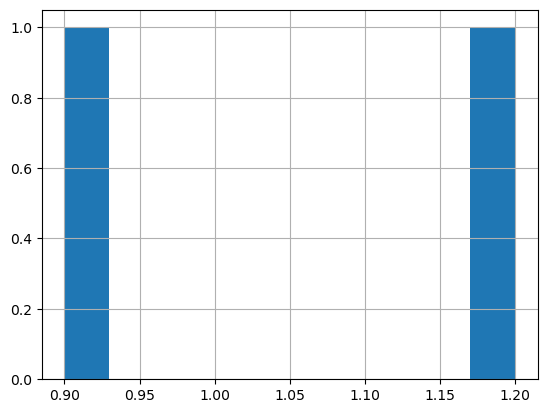

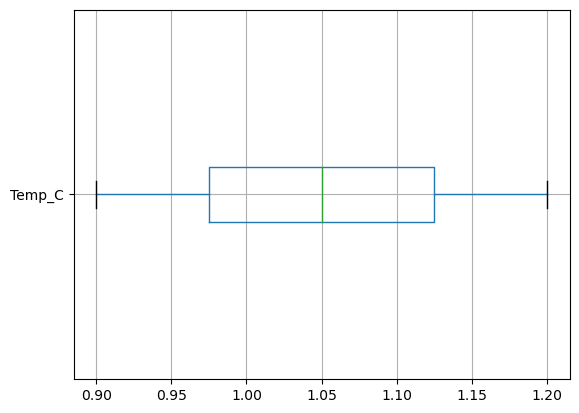

--------------------
Rain,Ice Pellets
moy:
 0.6
med:
 0.6
mod:
 0    0.6
Name: Temp_C, dtype: float64
var:
 nan
ect:
 nan
cv:
 nan


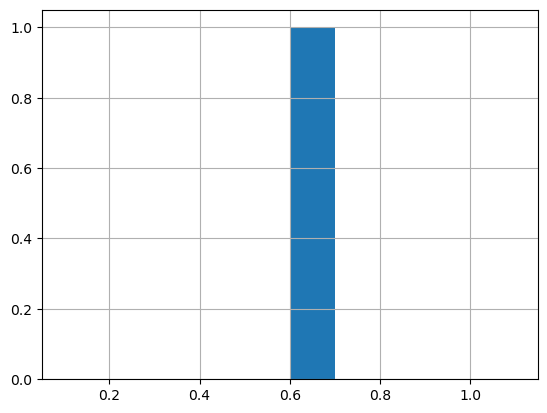

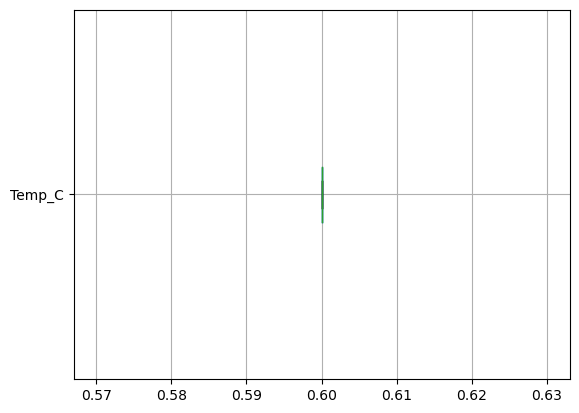

--------------------
Drizzle,Snow,Fog
moy:
 0.6933333333333334
med:
 0.6
mod:
 0    0.4
Name: Temp_C, dtype: float64
var:
 0.10841025641025645
ect:
 0.3292571281084989
cv:
 0.47489008861802723


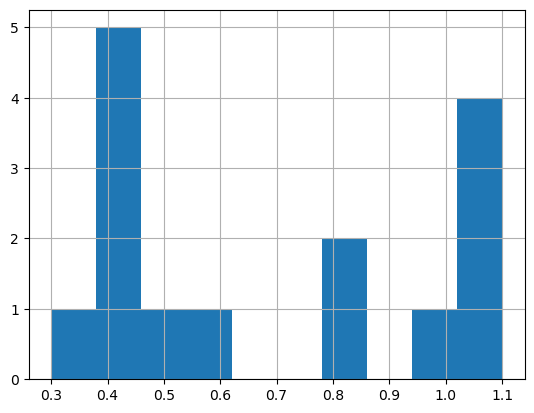

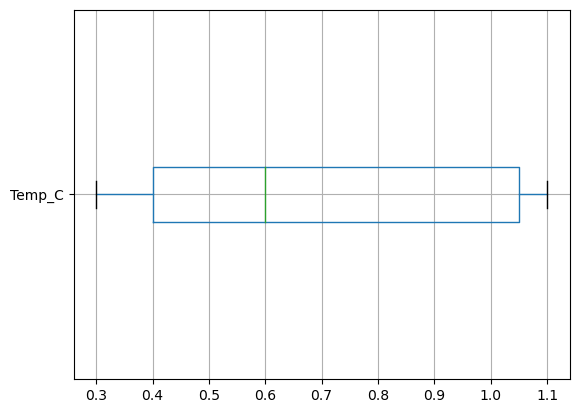

--------------------
Rain,Snow Grains
moy:
 1.9
med:
 1.9
mod:
 0    1.9
Name: Temp_C, dtype: float64
var:
 nan
ect:
 nan
cv:
 nan


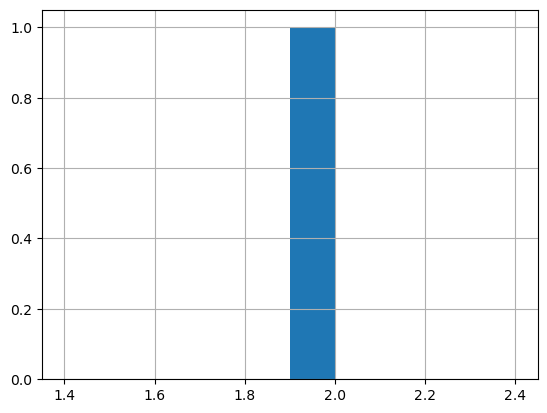

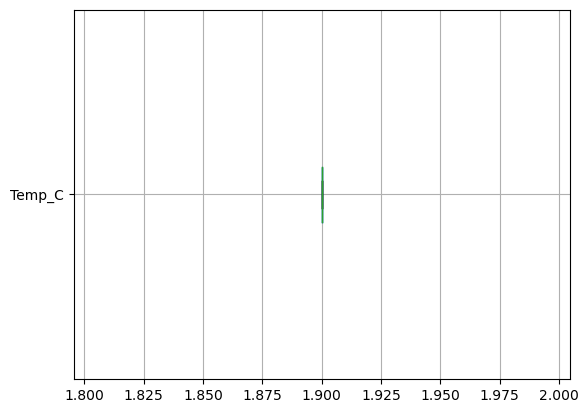

--------------------
Rain,Snow,Ice Pellets
moy:
 1.1
med:
 1.1
mod:
 0    1.1
Name: Temp_C, dtype: float64
var:
 0.04000000000000001
ect:
 0.2
cv:
 0.18181818181818182


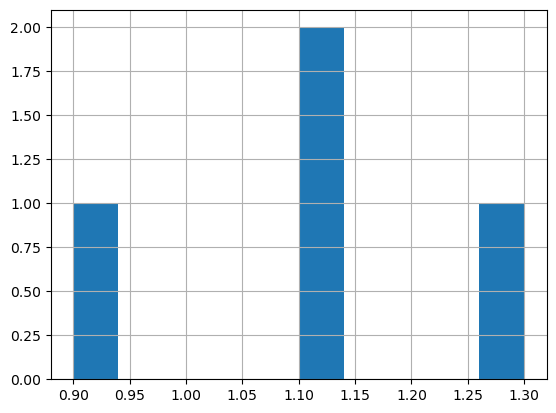

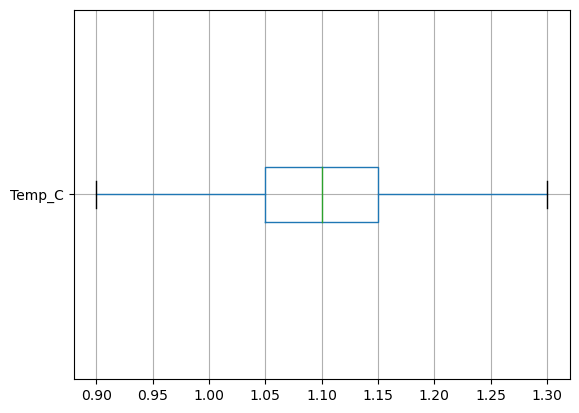

--------------------
Snow Showers,Fog
moy:
 -10.675
med:
 -10.7
mod:
 0   -11.3
1   -10.9
2   -10.5
3   -10.0
Name: Temp_C, dtype: float64
var:
 0.4637500000000005
ect:
 0.6809919235938121
cv:
 -0.06379315443501753


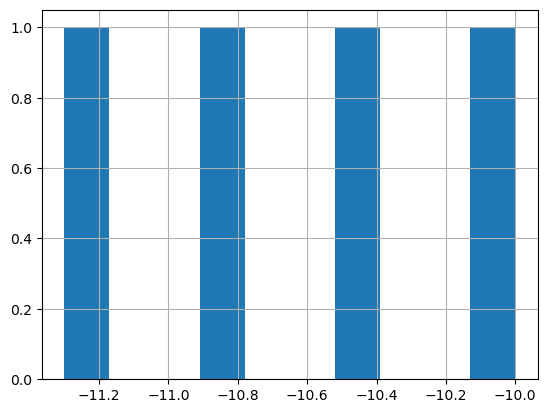

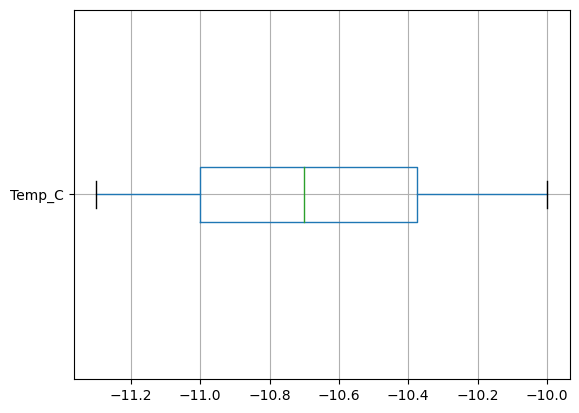

--------------------
Moderate Snow,Blowing Snow
moy:
 -5.45
med:
 -5.45
mod:
 0   -5.5
1   -5.4
Name: Temp_C, dtype: float64
var:
 nan
ect:
 nan
cv:
 nan


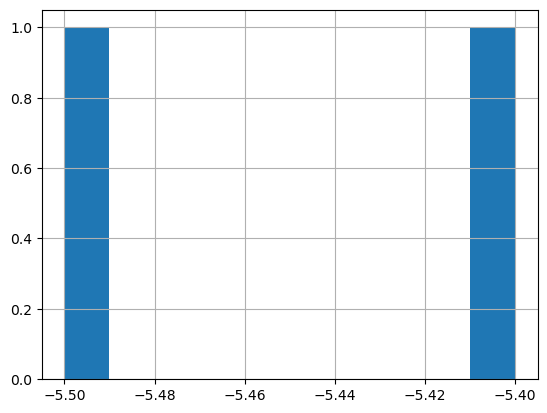

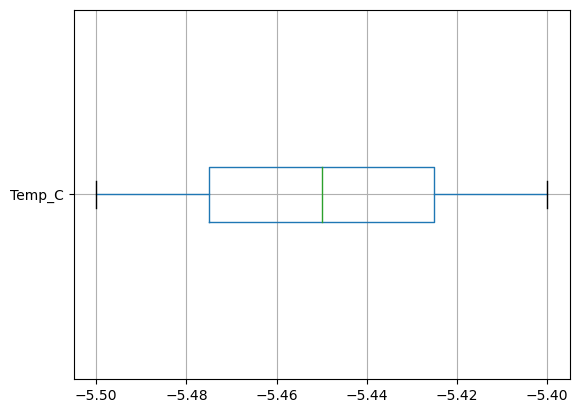

In [37]:
for Wet in data ["Weather"].unique():
    subset = data[data.Weather == Wet]
    print ("-"*20)
    print (Wet)
    print ("moy:\n",subset['Temp_C'].mean())
    print ("med:\n",subset['Temp_C'].median())
    print ("mod:\n",subset['Temp_C'].mode())
    print ("var:\n",subset['Temp_C'].var(ddof=2))
    print ("ect:\n",subset['Temp_C'].std(ddof=2))
    print ("cv:\n",subset['Temp_C'].std(ddof=2)/subset["Temp_C"].mean())
    subset["Temp_C"].hist()
    plt.show()
    subset.boxplot(column="Temp_C", vert=False)
    plt.show()
    

In [38]:
data["Temp_C"].skew()

-0.17766634898276745

In [39]:
data["Temp_C"].kurtosis()

-0.9155567505542197

____________________
Fog
moy : 
 4.303333333333335
mediane : 
 2.6500000000000004
mode : 
 0    0.8
Name: Temp_C, dtype: float64
var : 
 64.62233780760629
ect : 
 8.038802013211066
skewness : 
 -0.23725697727729267
kurtosis : 
 -0.23705169995673891


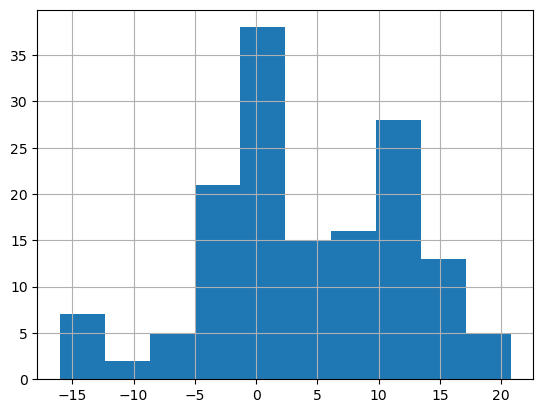

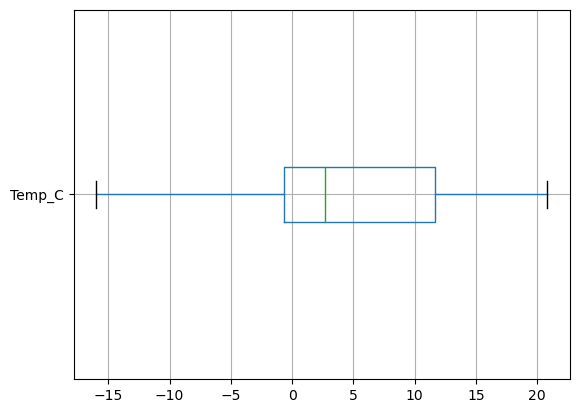

____________________
Freezing Drizzle,Fog
moy : 
 -2.5333333333333337
mediane : 
 -1.85
mode : 
 0   -6.4
1   -3.3
2   -1.9
3   -1.8
4   -1.5
5   -0.3
Name: Temp_C, dtype: float64
var : 
 4.506666666666668
ect : 
 2.122891110412088
skewness : 
 -1.4226927978914794
kurtosis : 
 2.378467796995901


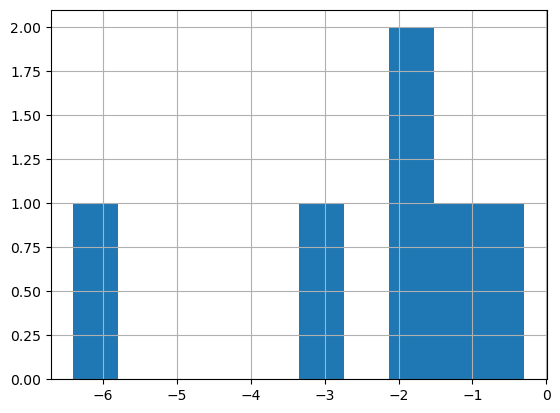

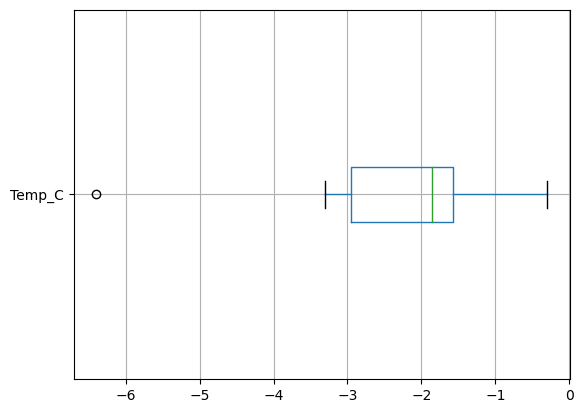

____________________
Mostly Cloudy
moy : 
 10.57428709521508
mediane : 
 11.8
mode : 
 0     1.9
1    14.2
Name: Temp_C, dtype: float64
var : 
 127.98033465834855
ect : 
 11.31283937207404
skewness : 
 -0.3590928308539529
kurtosis : 
 -0.6959734670246842


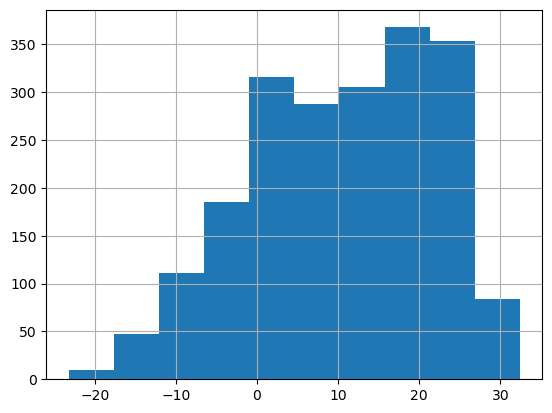

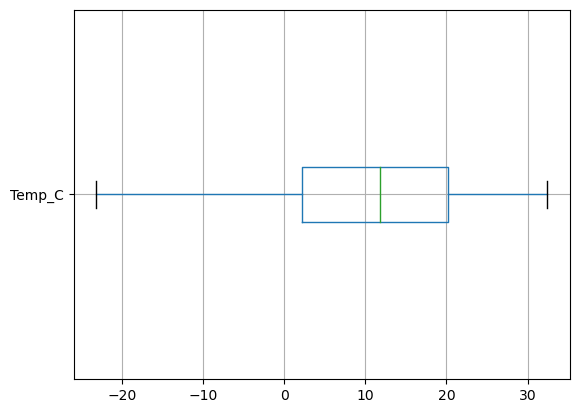

____________________
Cloudy
moy : 
 7.970543981481482
mediane : 
 7.35
mode : 
 0    3.7
Name: Temp_C, dtype: float64
var : 
 121.00622506581199
ect : 
 11.000282953897685
skewness : 
 -0.07850559371602435
kurtosis : 
 -0.822383265017705


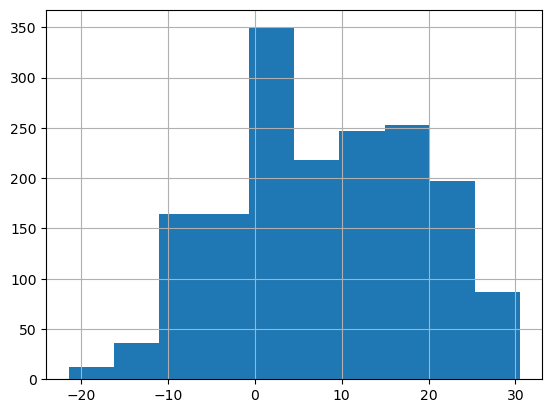

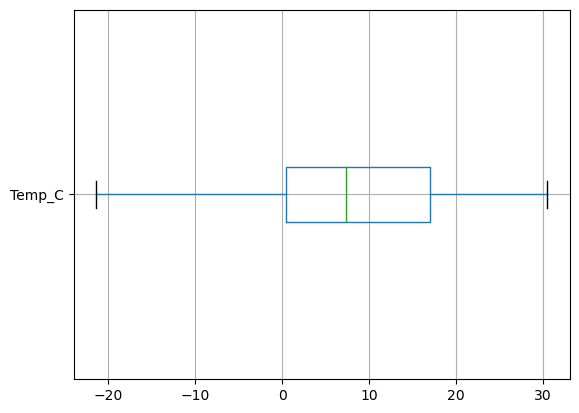

____________________
Rain
moy : 
 9.78627450980392
mediane : 
 8.9
mode : 
 0    1.5
Name: Temp_C, dtype: float64
var : 
 41.01331918997109
ect : 
 6.404164206980571
skewness : 
 0.24503330706337975
kurtosis : 
 -1.2168659853289738


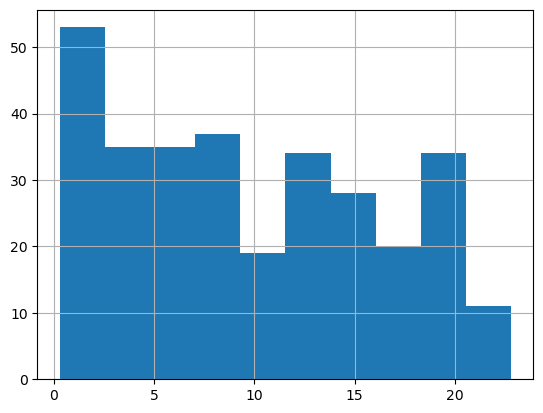

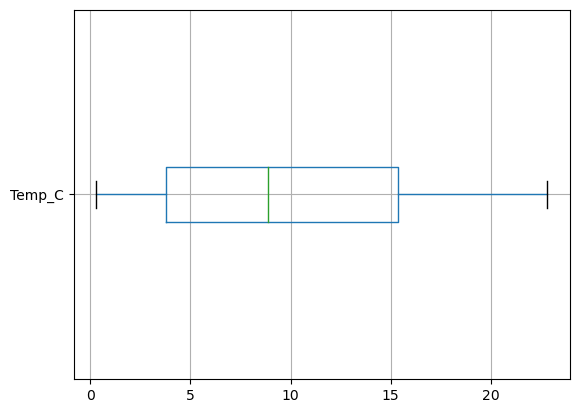

____________________
Rain Showers
moy : 
 13.722340425531916
mediane : 
 14.95
mode : 
 0     5.3
1     5.5
2    20.4
Name: Temp_C, dtype: float64
var : 
 48.68655705996131
ect : 
 6.977575299483433
skewness : 
 0.043851209112903716
kurtosis : 
 -1.2385078067679876


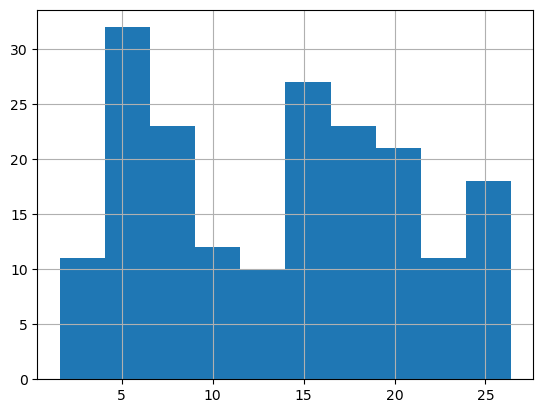

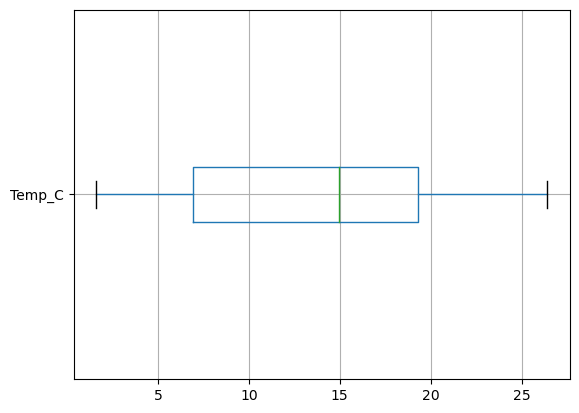

____________________
Mainly Clear
moy : 
 12.558926875593542
mediane : 
 15.8
mode : 
 0    16.6
Name: Temp_C, dtype: float64
var : 
 152.49302478609886
ect : 
 12.348806613843253
skewness : 
 -0.646261021986797
kurtosis : 
 -0.598316732881274


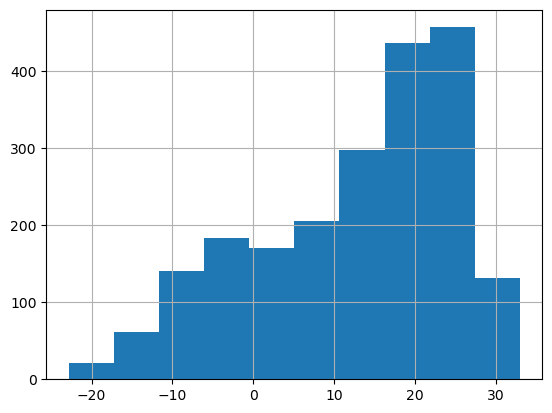

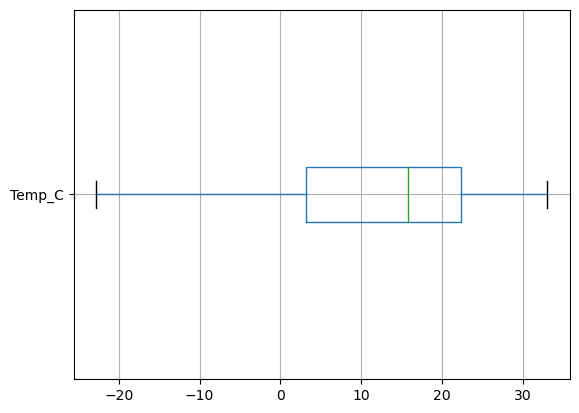

____________________
Snow Showers
moy : 
 -3.506666666666667
mediane : 
 -3.7
mode : 
 0   -9.0
1   -5.6
2   -0.2
3    1.0
4    1.1
5    1.5
6    1.6
7    1.8
Name: Temp_C, dtype: float64
var : 
 18.686395480226
ect : 
 4.322776362504311
skewness : 
 -0.3423404002665518
kurtosis : 
 -0.9276420161162342


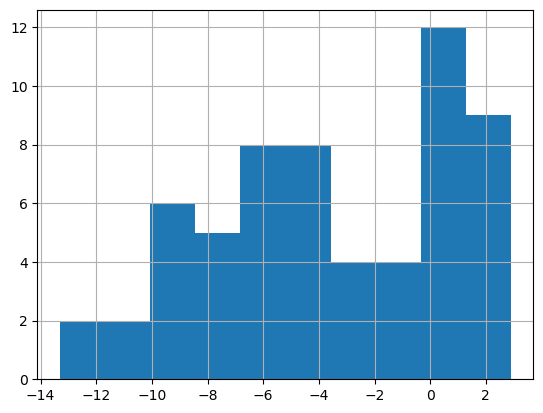

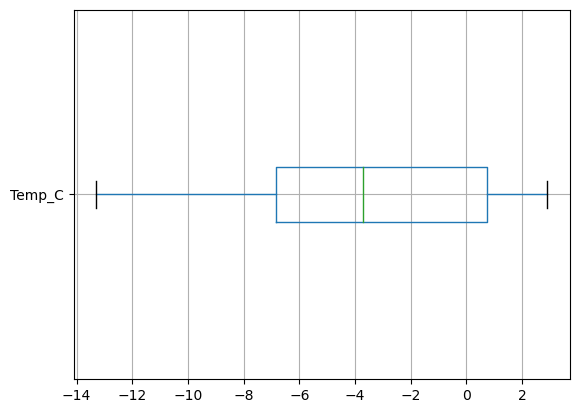

____________________
Snow
moy : 
 -4.524102564102565
mediane : 
 -4.8
mode : 
 0   -7.1
1   -5.0
2   -3.7
Name: Temp_C, dtype: float64
var : 
 17.267643794080808
ect : 
 4.155435451800546
skewness : 
 -0.4310060651806549
kurtosis : 
 0.0908035159293763


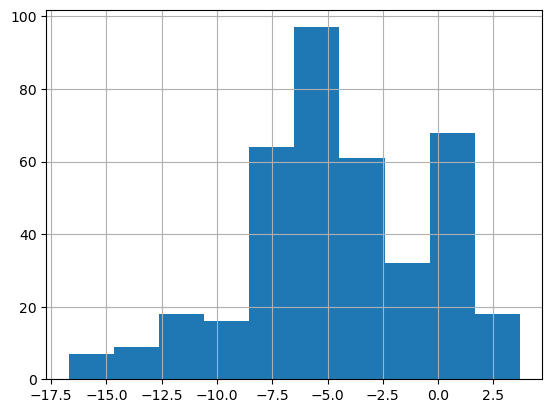

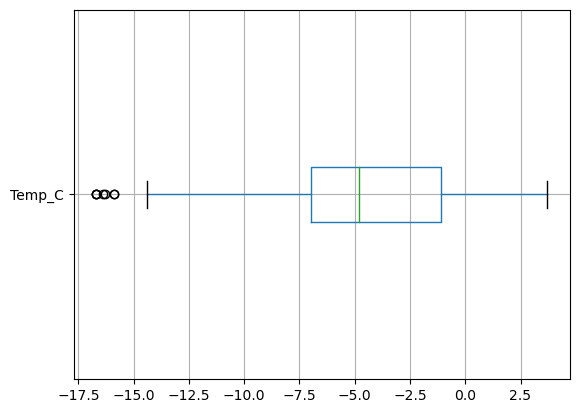

____________________
Clear
moy : 
 6.825716440422324
mediane : 
 7.5
mode : 
 0    16.6
Name: Temp_C, dtype: float64
var : 
 147.1857909957597
ect : 
 12.132015125104308
skewness : 
 -0.18699807121109824
kurtosis : 
 -1.0095087795343114


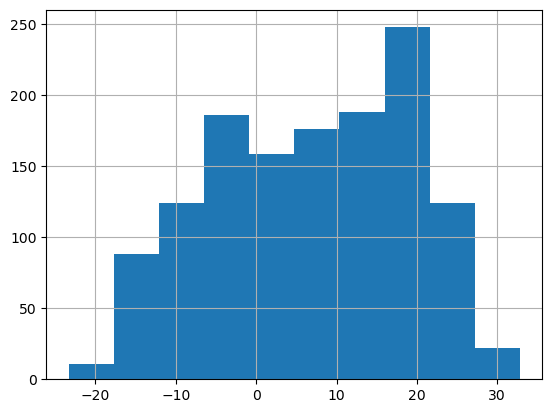

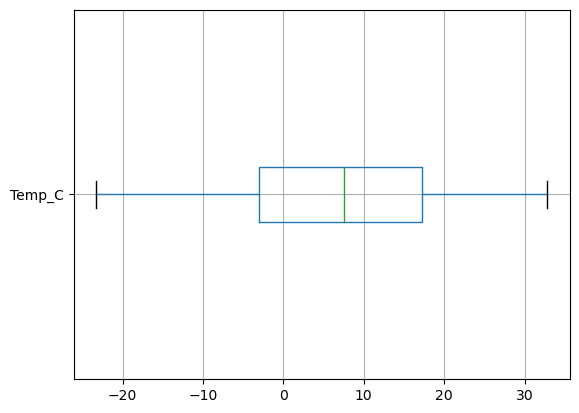

____________________
Freezing Rain,Fog
moy : 
 -2.2249999999999996
mediane : 
 -1.45
mode : 
 0   -6.1
1   -2.3
2   -0.6
3    0.1
Name: Temp_C, dtype: float64
var : 
 7.689166666666666
ect : 
 2.7729346668586814
skewness : 
 -1.2921781578370446
kurtosis : 
 1.2523778555987928


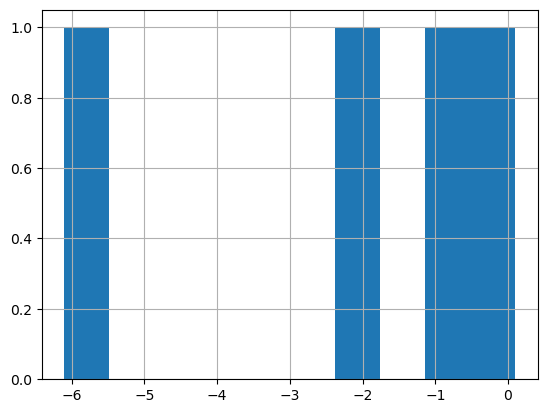

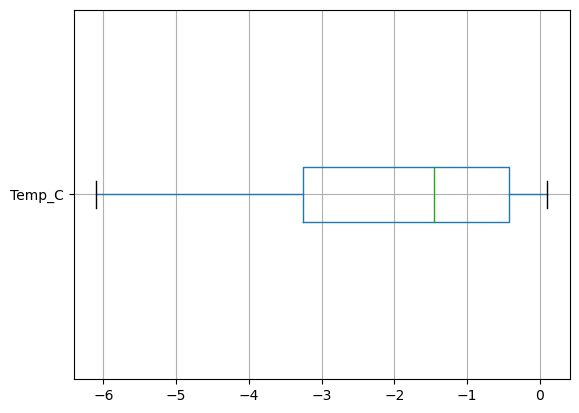

____________________
Freezing Rain
moy : 
 -3.8857142857142857
mediane : 
 -4.8
mode : 
 0   -4.8
Name: Temp_C, dtype: float64
var : 
 4.461318681318681
ect : 
 2.112183391971133
skewness : 
 0.7483426785757991
kurtosis : 
 -0.6403584274462881


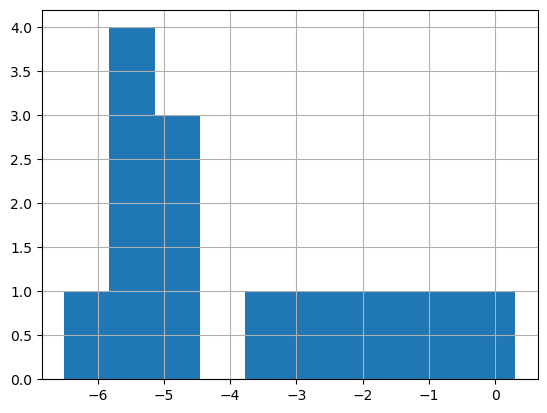

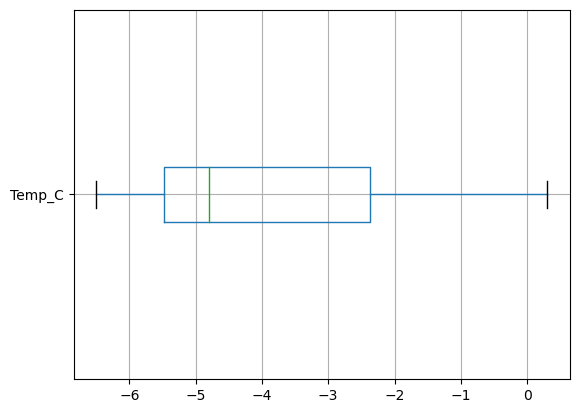

____________________
Freezing Drizzle
moy : 
 -5.657142857142857
mediane : 
 -5.5
mode : 
 0   -9.0
1   -6.8
2   -5.8
3   -5.5
4   -5.4
5   -4.8
6   -2.3
Name: Temp_C, dtype: float64
var : 
 4.099523809523809
ect : 
 2.024728082860464
skewness : 
 -0.010233560118425073
kurtosis : 
 1.6570787585829088


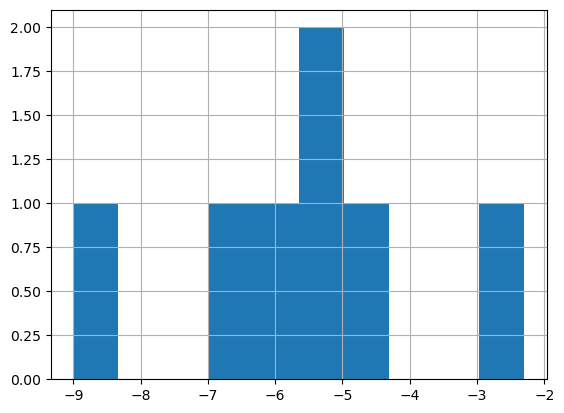

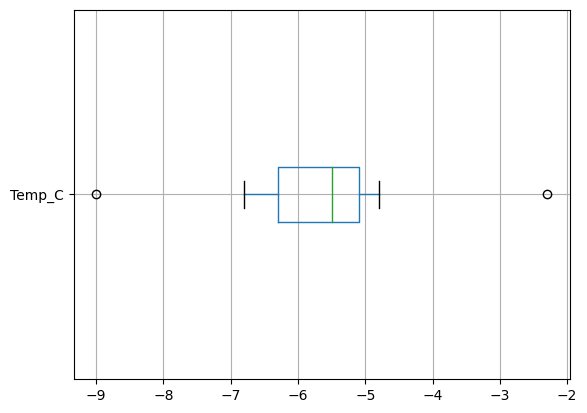

____________________
Rain,Snow
moy : 
 1.0555555555555556
mediane : 
 1.05
mode : 
 0    0.8
Name: Temp_C, dtype: float64
var : 
 0.07790849673202611
ect : 
 0.27912093567489005
skewness : 
 0.5726421381094277
kurtosis : 
 0.11740455103373737


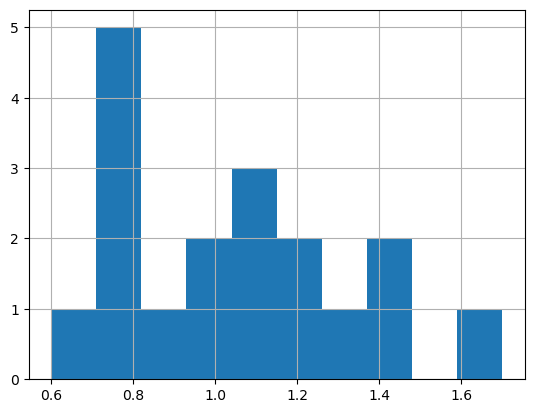

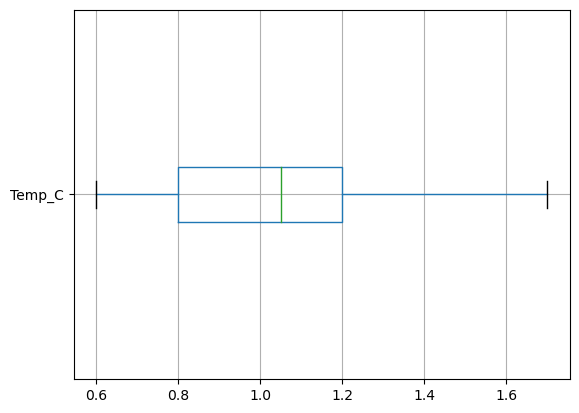

____________________
Moderate Snow
moy : 
 -5.525
mediane : 
 -5.45
mode : 
 0   -6.3
1   -5.7
2   -5.2
3   -4.9
Name: Temp_C, dtype: float64
var : 
 0.3758333333333331
ect : 
 0.6130524719249838
skewness : 
 -0.5566272069218222
kurtosis : 
 -1.100466566044421


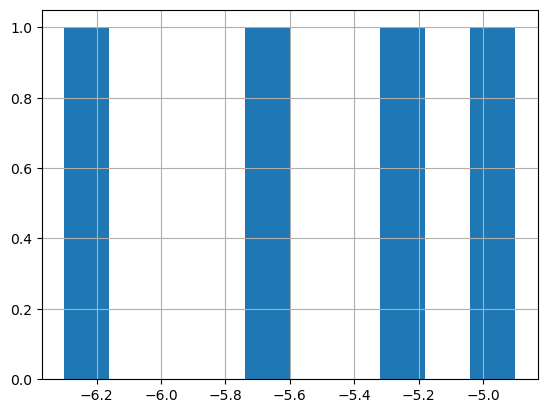

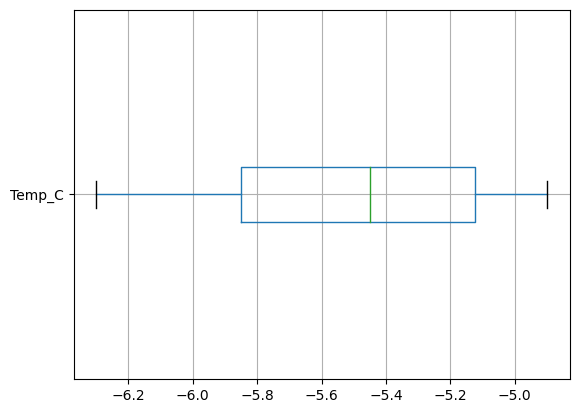

____________________
Freezing Drizzle,Snow
moy : 
 -5.1090909090909085
mediane : 
 -4.4
mode : 
 0    -8.3
1    -7.7
2    -6.8
3    -5.2
4    -4.5
5    -4.4
6    -4.3
7    -4.2
8    -3.8
9    -3.7
10   -3.3
Name: Temp_C, dtype: float64
var : 
 2.9089090909090913
ect : 
 1.7055524298329534
skewness : 
 -1.03200653819893
kurtosis : 
 -0.35342218420496696


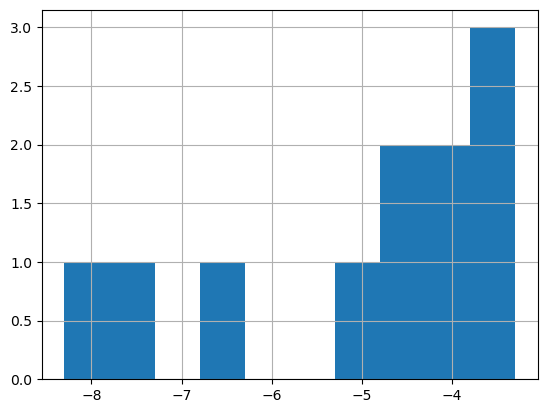

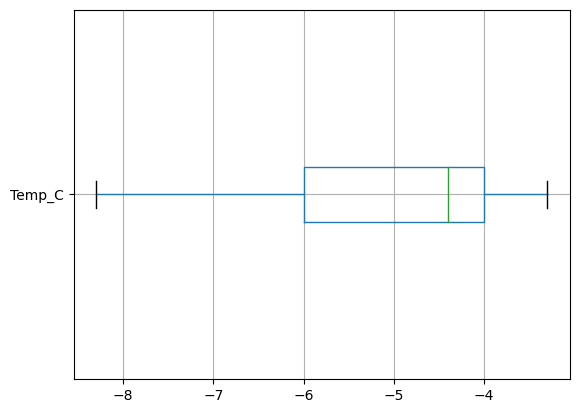

____________________
Freezing Rain,Snow Grains
moy : 
 -5.0
mediane : 
 -5.0
mode : 
 0   -5.0
Name: Temp_C, dtype: float64
var : 
 nan
ect : 
 nan
skewness : 
 nan
kurtosis : 
 nan


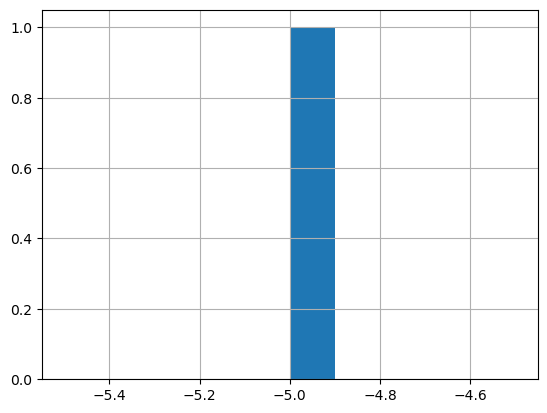

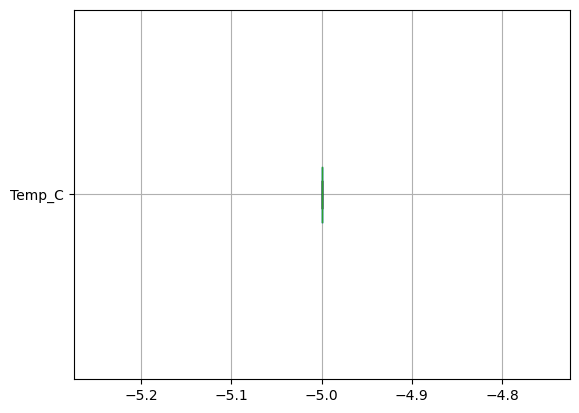

____________________
Snow,Blowing Snow
moy : 
 -5.4105263157894745
mediane : 
 -5.0
mode : 
 0   -5.4
1   -5.2
2   -5.0
3   -1.4
Name: Temp_C, dtype: float64
var : 
 8.150994152046783
ect : 
 2.8549945975512427
skewness : 
 -0.9286112877611489
kurtosis : 
 0.9587780418026637


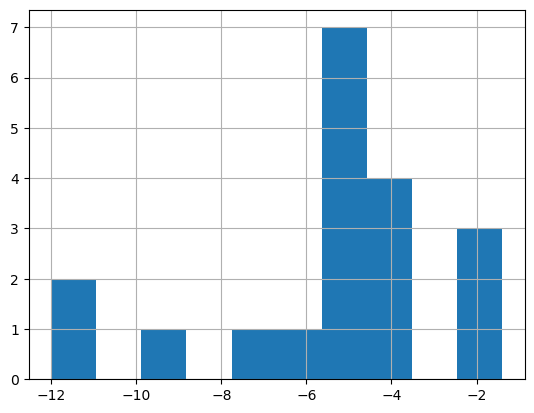

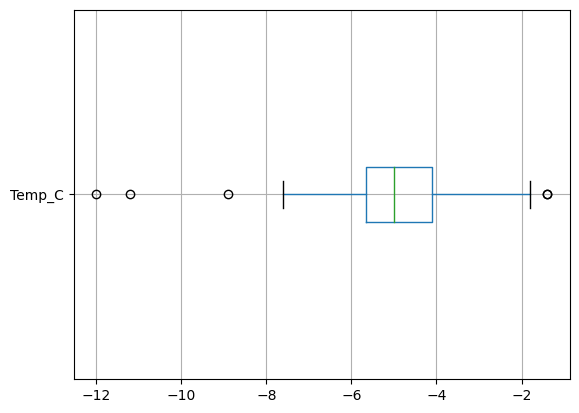

____________________
Freezing Fog
moy : 
 -7.575000000000001
mediane : 
 -5.6
mode : 
 0   -0.1
Name: Temp_C, dtype: float64
var : 
 84.9025
ect : 
 9.214255260193307
skewness : 
 -0.5963272587714036
kurtosis : 
 -2.6623203635075665


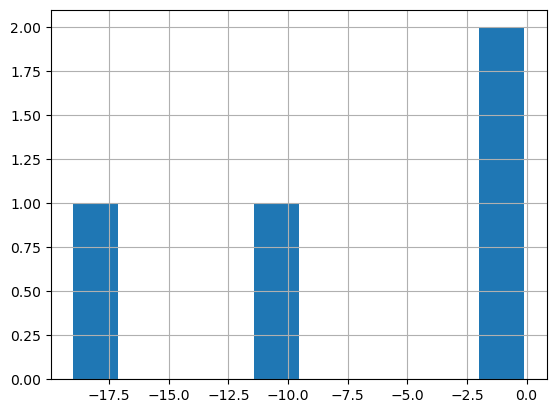

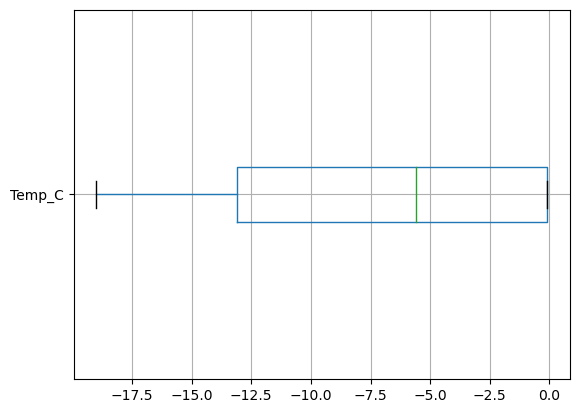

____________________
Haze
moy : 
 -0.19999999999999996
mediane : 
 -0.25
mode : 
 0   -0.7
Name: Temp_C, dtype: float64
var : 
 39.596
ect : 
 6.292535260131642
skewness : 
 0.09739910533630011
kurtosis : 
 1.1300034510817865


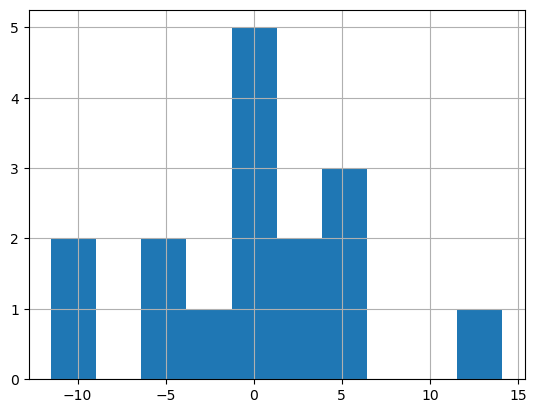

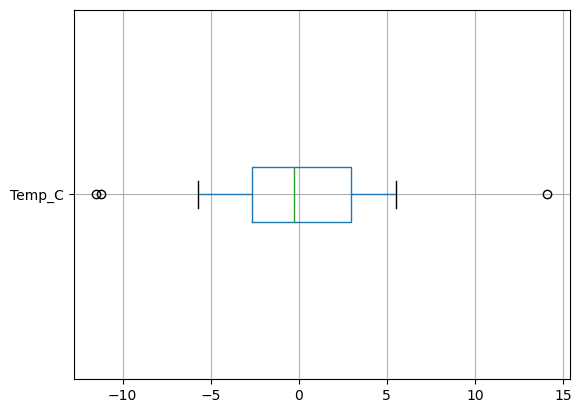

____________________
Rain,Fog
moy : 
 8.273275862068965
mediane : 
 7.9
mode : 
 0    1.1
Name: Temp_C, dtype: float64
var : 
 36.44788830584709
ect : 
 6.037208651839614
skewness : 
 0.4799330729729442
kurtosis : 
 -0.7236490880628272


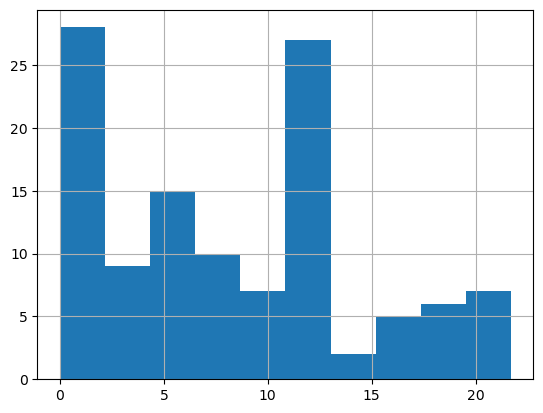

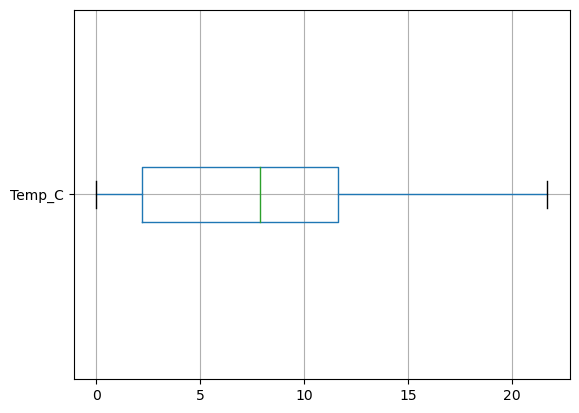

____________________
Drizzle,Fog
moy : 
 8.067499999999999
mediane : 
 9.149999999999999
mode : 
 0    3.8
Name: Temp_C, dtype: float64
var : 
 24.703740506329122
ect : 
 4.970285757009261
skewness : 
 -0.19749903618718323
kurtosis : 
 -1.1461692191024322


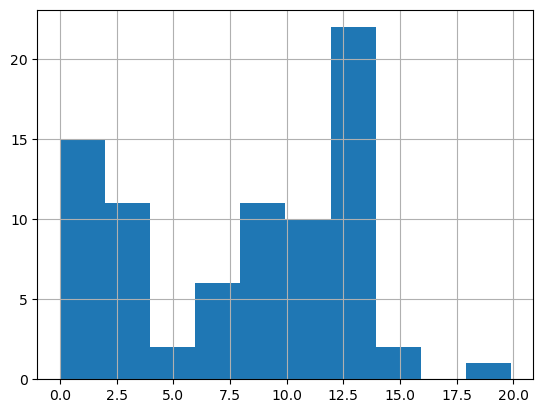

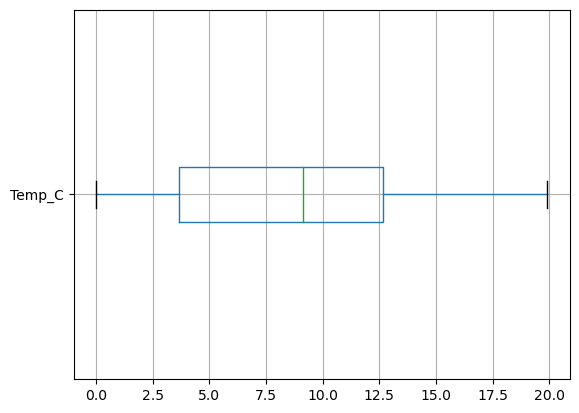

____________________
Drizzle
moy : 
 7.353658536585366
mediane : 
 5.4
mode : 
 0    1.3
Name: Temp_C, dtype: float64
var : 
 28.059548780487802
ect : 
 5.297126464460501
skewness : 
 0.5821146838193907
kurtosis : 
 -0.7855187888951387


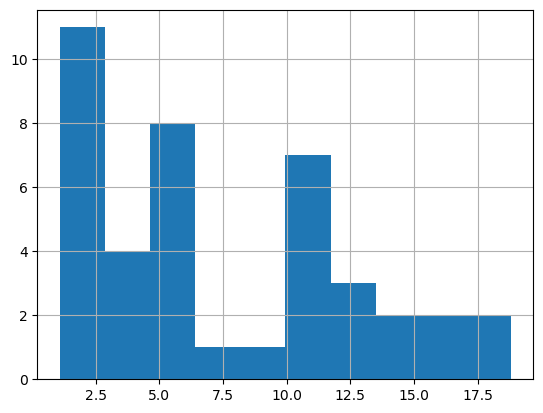

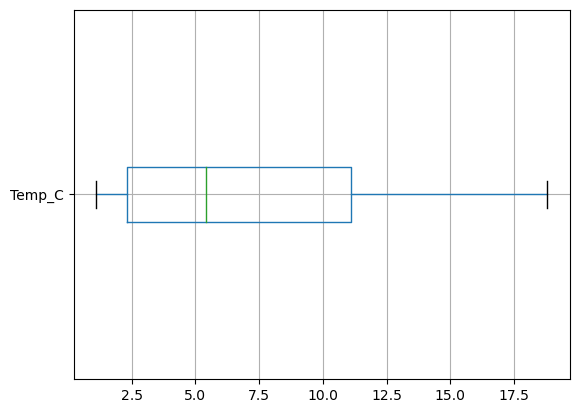

____________________
Freezing Drizzle,Haze
moy : 
 -5.433333333333334
mediane : 
 -5.5
mode : 
 0   -5.8
1   -5.5
2   -5.0
Name: Temp_C, dtype: float64
var : 
 0.16333333333333327
ect : 
 0.40414518843273795
skewness : 
 0.7221086457211429
kurtosis : 
 nan


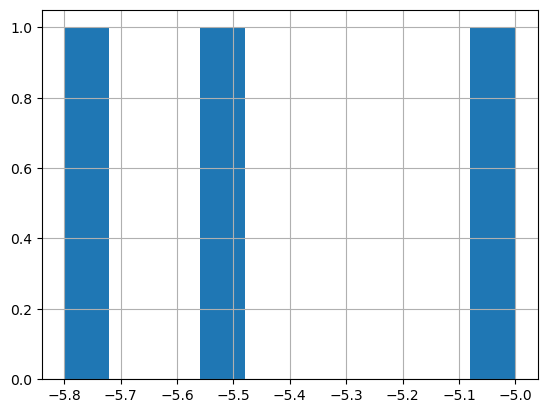

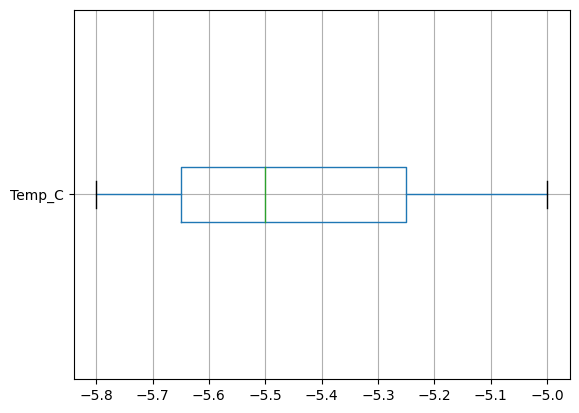

____________________
Freezing Rain,Haze
moy : 
 -4.9
mediane : 
 -4.9
mode : 
 0   -4.9
Name: Temp_C, dtype: float64
var : 
 0.0
ect : 
 0.0
skewness : 
 nan
kurtosis : 
 nan


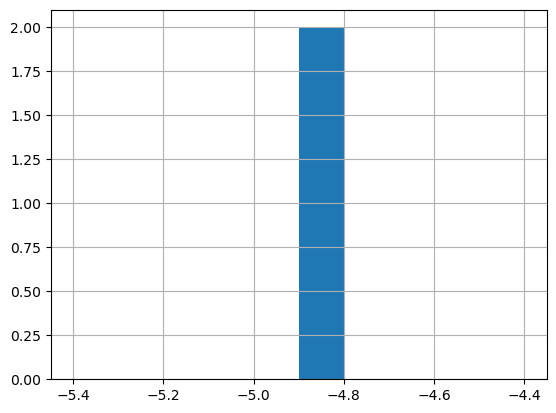

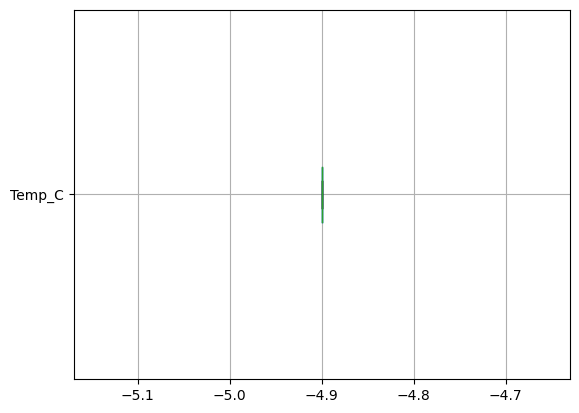

____________________
Snow,Haze
moy : 
 -4.0200000000000005
mediane : 
 -4.0
mode : 
 0   -4.3
Name: Temp_C, dtype: float64
var : 
 0.08699999999999994
ect : 
 0.29495762407505244
skewness : 
 0.5182899194343068
kurtosis : 
 -0.7966706302021311


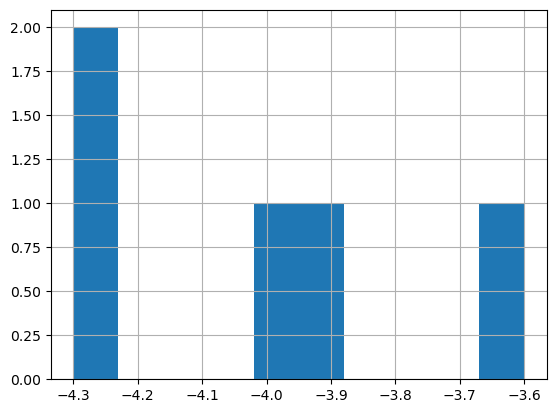

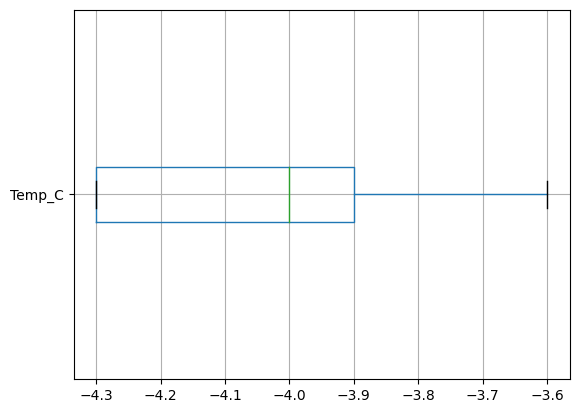

____________________
Snow,Fog
moy : 
 -5.075675675675677
mediane : 
 -7.4
mode : 
 0   -9.3
Name: Temp_C, dtype: float64
var : 
 21.79689189189189
ect : 
 4.668714158297966
skewness : 
 0.32415263688636753
kurtosis : 
 -1.8569423072258164


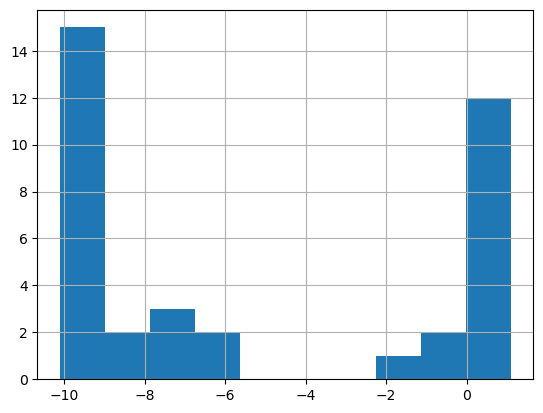

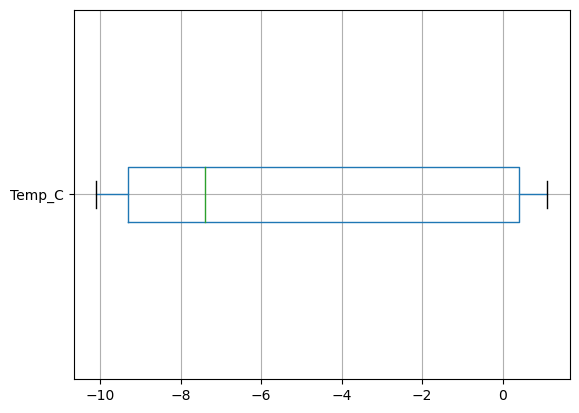

____________________
Snow,Ice Pellets
moy : 
 -1.883333333333333
mediane : 
 -2.55
mode : 
 0   -3.0
Name: Temp_C, dtype: float64
var : 
 4.0696666666666665
ect : 
 2.0173414848921007
skewness : 
 0.4684421493446858
kurtosis : 
 -1.5252625557410129


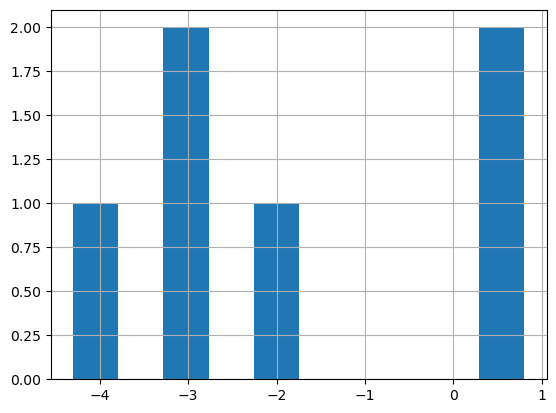

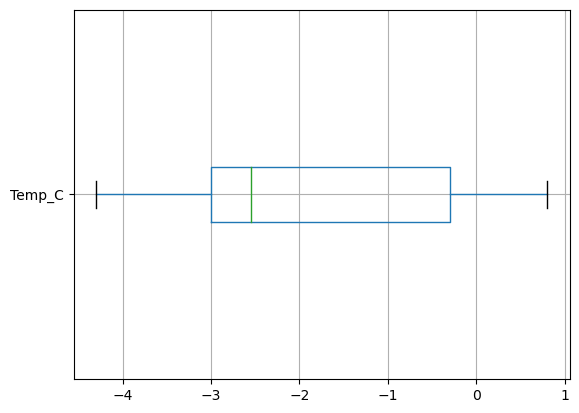

____________________
Rain,Haze
moy : 
 4.633333333333334
mediane : 
 4.4
mode : 
 0    4.0
1    4.4
2    5.5
Name: Temp_C, dtype: float64
var : 
 0.6033333333333333
ect : 
 0.7767453465154028
skewness : 
 1.2298092586842222
kurtosis : 
 nan


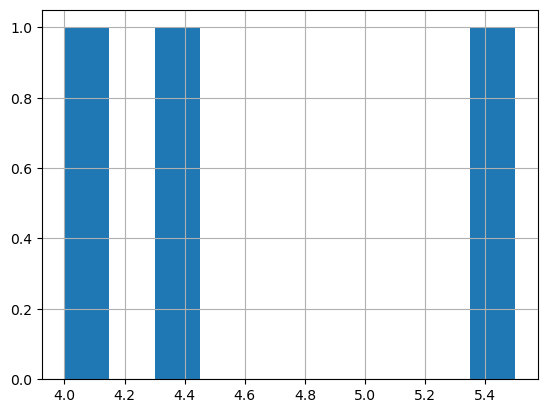

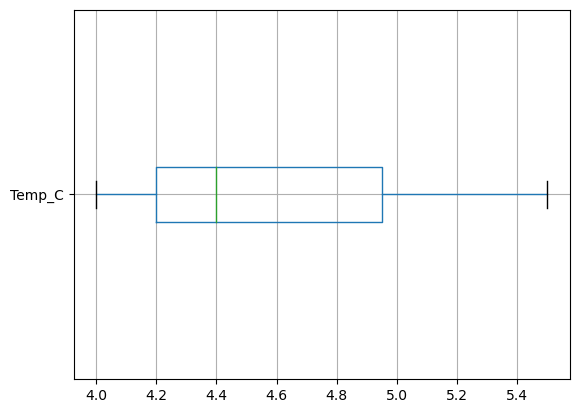

____________________
Thunderstorms,Rain
moy : 
 20.433333333333334
mediane : 
 20.6
mode : 
 0    19.4
1    20.6
2    21.3
Name: Temp_C, dtype: float64
var : 
 0.9233333333333357
ect : 
 0.9609023536933061
skewness : 
 -0.7570351142431232
kurtosis : 
 nan


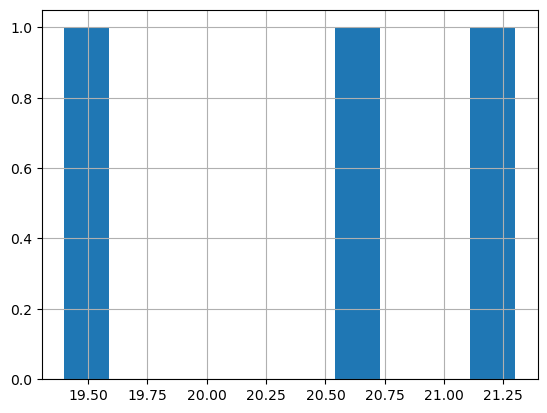

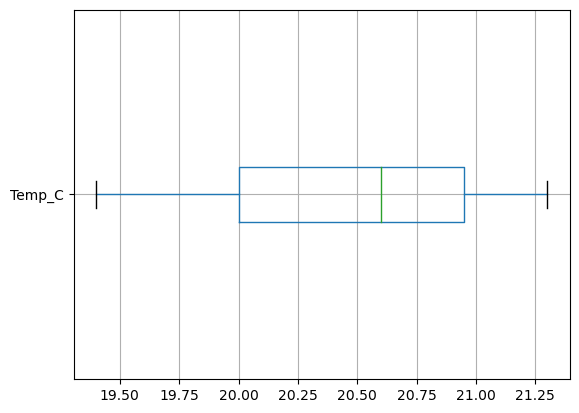

____________________
Thunderstorms,Rain Showers
moy : 
 20.037499999999998
mediane : 
 20.85
mode : 
 0     11.0
1     11.4
2     16.5
3     18.1
4     18.7
5     19.7
6     20.2
7     20.7
8     21.0
9     21.6
10    21.9
11    22.7
12    22.8
13    23.8
14    25.0
15    25.5
Name: Temp_C, dtype: float64
var : 
 17.673166666666667
ect : 
 4.203946558493182
skewness : 
 -1.0733237411348688
kurtosis : 
 0.8322958363437225


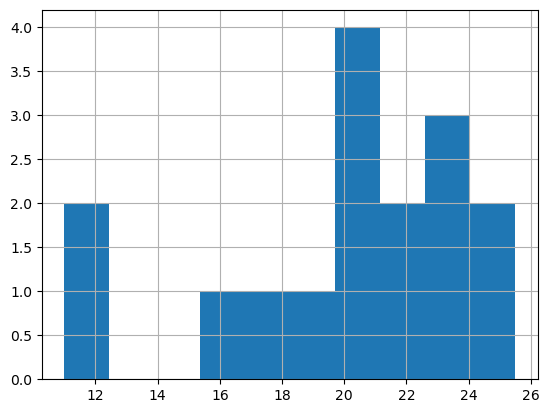

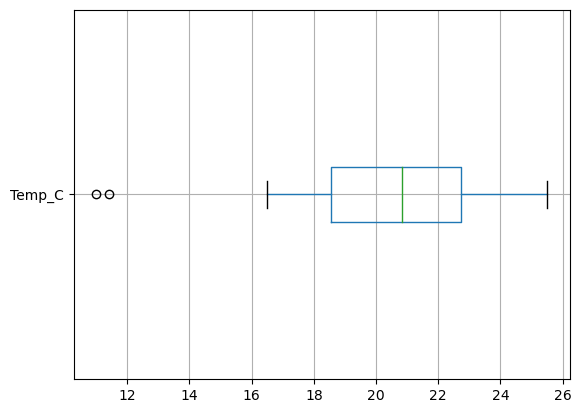

____________________
Thunderstorms,Heavy Rain Showers
moy : 
 10.9
mediane : 
 10.9
mode : 
 0    10.9
Name: Temp_C, dtype: float64
var : 
 nan
ect : 
 nan
skewness : 
 nan
kurtosis : 
 nan


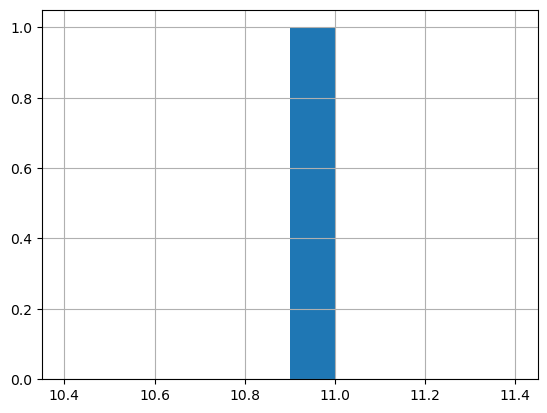

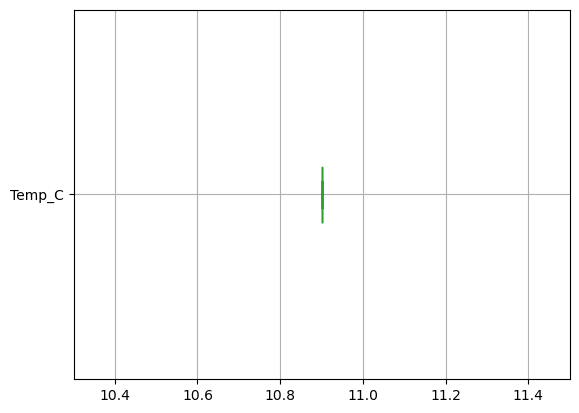

____________________
Thunderstorms,Rain Showers,Fog
moy : 
 21.599999999999998
mediane : 
 22.4
mode : 
 0    19.5
1    22.4
2    22.9
Name: Temp_C, dtype: float64
var : 
 3.3699999999999974
ect : 
 1.8357559750685812
skewness : 
 -1.5886209901446657
kurtosis : 
 nan


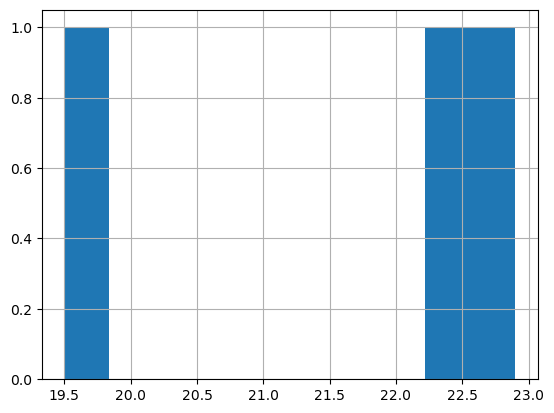

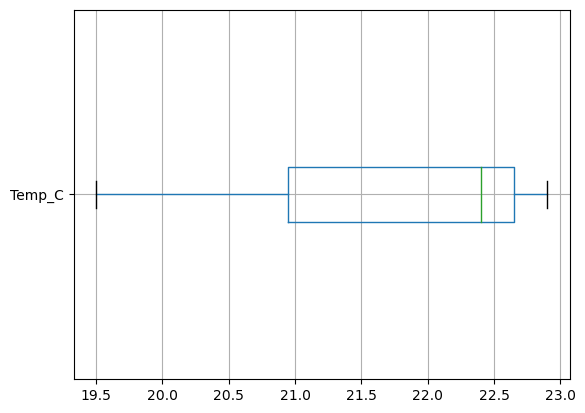

____________________
Thunderstorms
moy : 
 24.15
mediane : 
 24.15
mode : 
 0    21.6
1    26.7
Name: Temp_C, dtype: float64
var : 
 13.004999999999988
ect : 
 3.6062445840513906
skewness : 
 nan
kurtosis : 
 nan


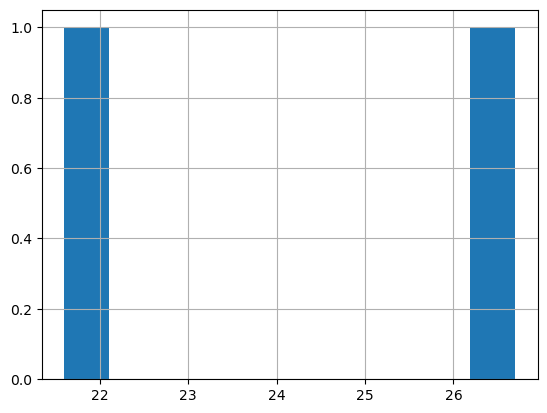

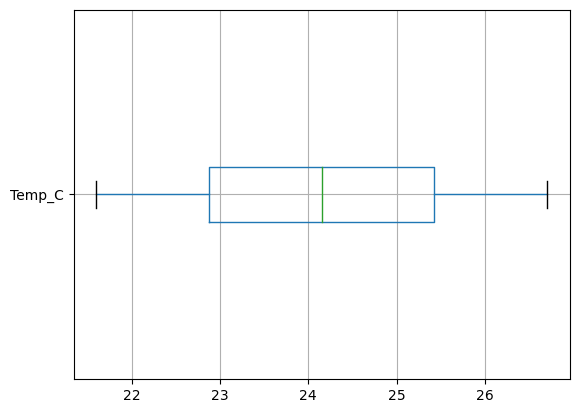

____________________
Thunderstorms,Rain,Fog
moy : 
 20.6
mediane : 
 20.6
mode : 
 0    20.6
Name: Temp_C, dtype: float64
var : 
 nan
ect : 
 nan
skewness : 
 nan
kurtosis : 
 nan


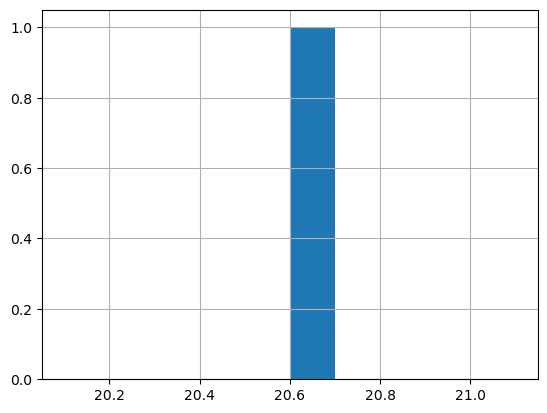

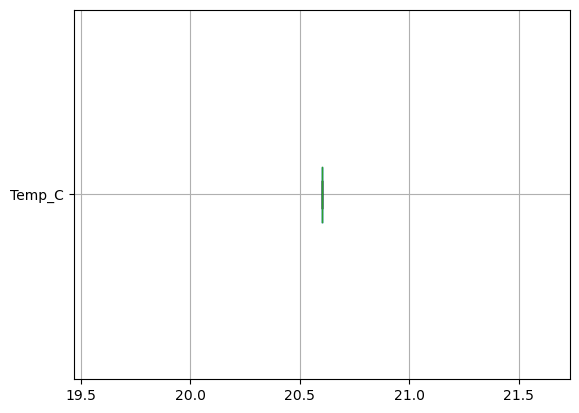

____________________
Thunderstorms,Moderate Rain Showers,Fog
moy : 
 19.6
mediane : 
 19.6
mode : 
 0    19.6
Name: Temp_C, dtype: float64
var : 
 nan
ect : 
 nan
skewness : 
 nan
kurtosis : 
 nan


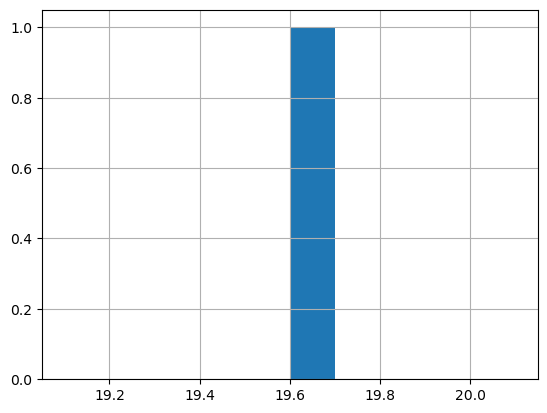

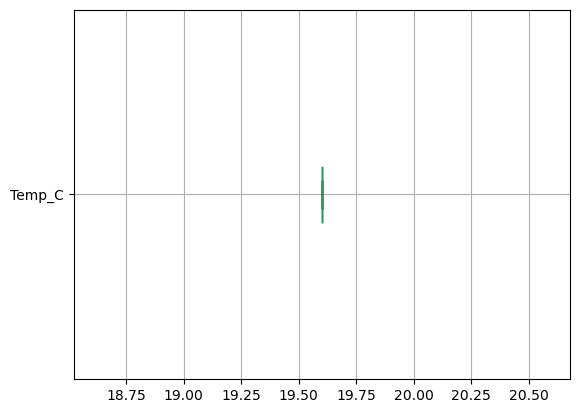

____________________
Rain Showers,Fog
moy : 
 12.8
mediane : 
 12.8
mode : 
 0    12.8
Name: Temp_C, dtype: float64
var : 
 nan
ect : 
 nan
skewness : 
 nan
kurtosis : 
 nan


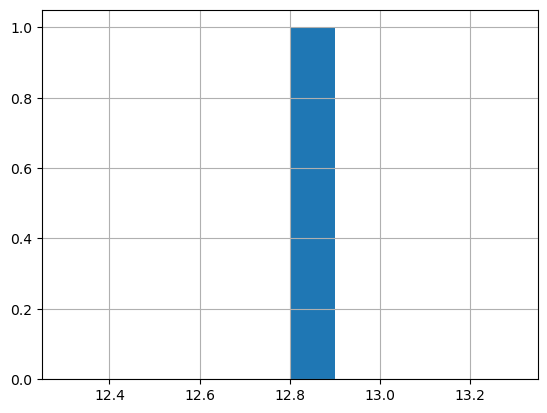

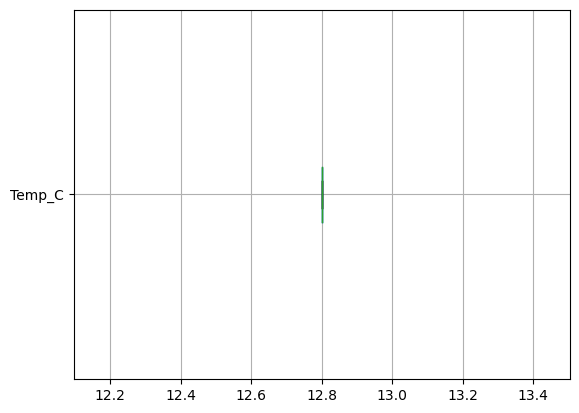

____________________
Rain Showers,Snow Showers
moy : 
 2.1500000000000004
mediane : 
 2.1500000000000004
mode : 
 0    2.1
1    2.2
Name: Temp_C, dtype: float64
var : 
 0.005000000000000009
ect : 
 0.07071067811865482
skewness : 
 nan
kurtosis : 
 nan


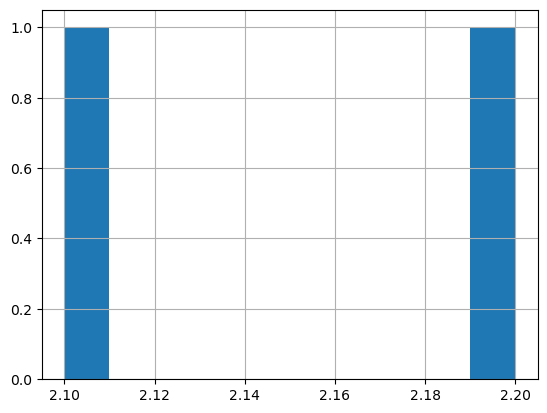

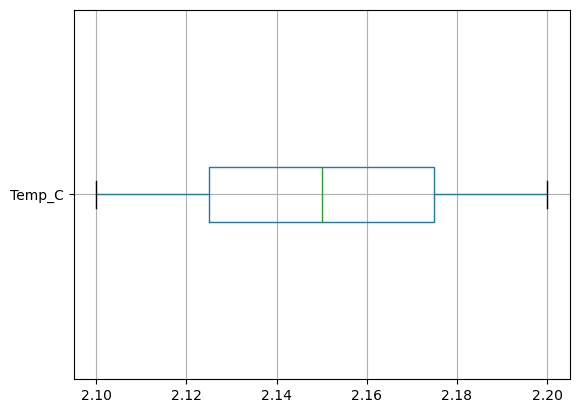

____________________
Snow Pellets
moy : 
 0.7
mediane : 
 0.7
mode : 
 0    0.7
Name: Temp_C, dtype: float64
var : 
 nan
ect : 
 nan
skewness : 
 nan
kurtosis : 
 nan


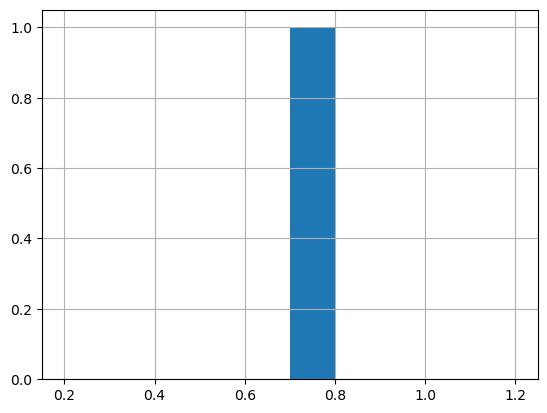

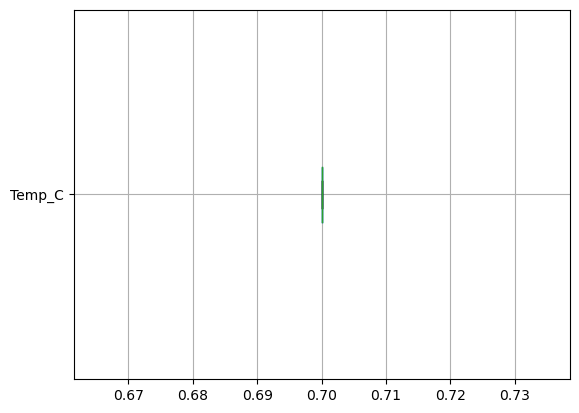

____________________
Rain,Snow,Fog
moy : 
 0.8
mediane : 
 0.8
mode : 
 0    0.8
Name: Temp_C, dtype: float64
var : 
 nan
ect : 
 nan
skewness : 
 nan
kurtosis : 
 nan


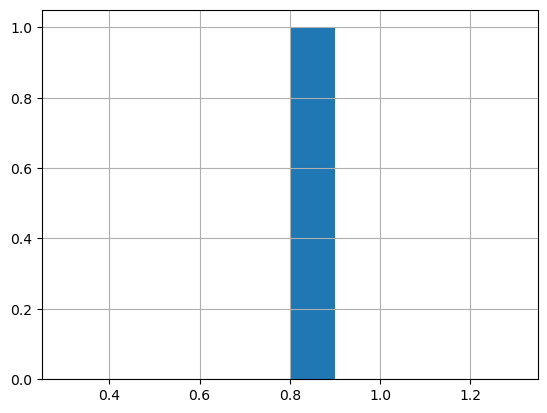

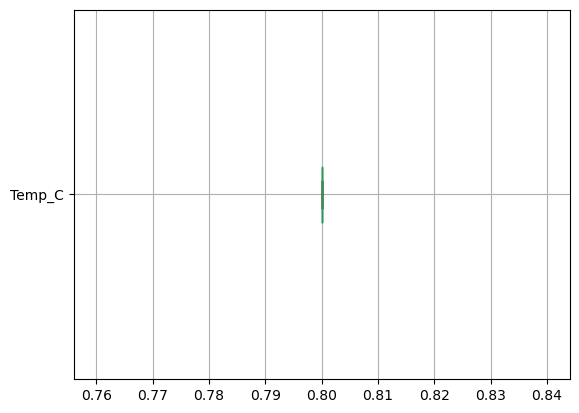

____________________
Moderate Rain,Fog
moy : 
 1.7
mediane : 
 1.7
mode : 
 0    1.7
Name: Temp_C, dtype: float64
var : 
 nan
ect : 
 nan
skewness : 
 nan
kurtosis : 
 nan


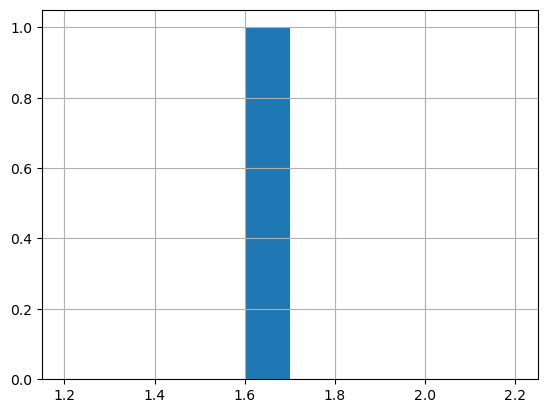

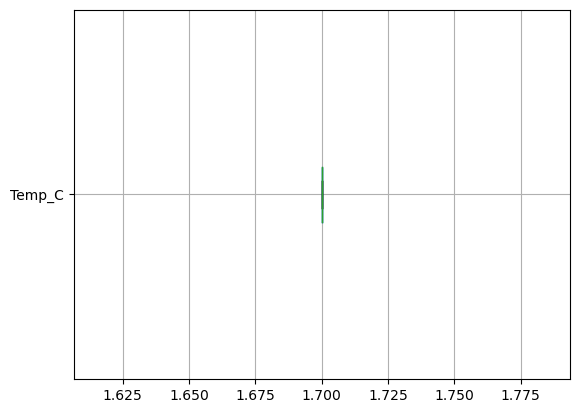

____________________
Freezing Rain,Ice Pellets,Fog
moy : 
 -2.6
mediane : 
 -2.6
mode : 
 0   -2.6
Name: Temp_C, dtype: float64
var : 
 nan
ect : 
 nan
skewness : 
 nan
kurtosis : 
 nan


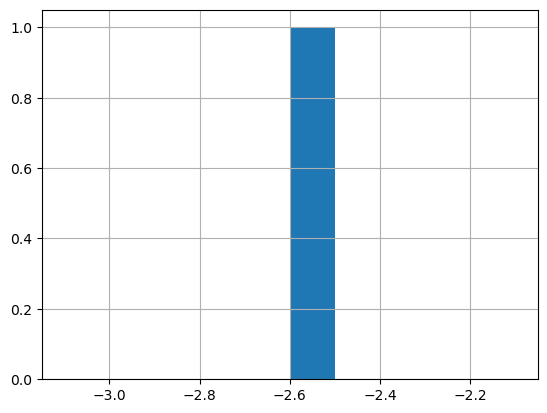

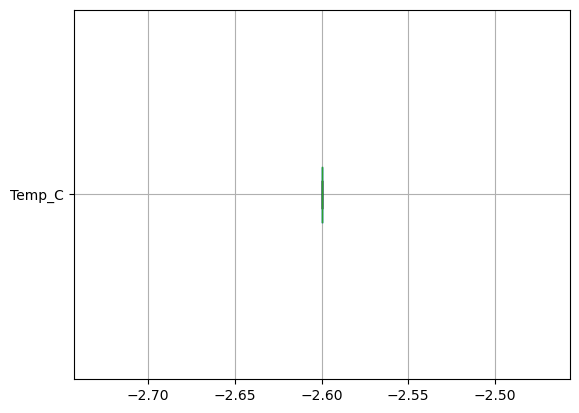

____________________
Drizzle,Ice Pellets,Fog
moy : 
 0.4
mediane : 
 0.4
mode : 
 0    0.4
Name: Temp_C, dtype: float64
var : 
 nan
ect : 
 nan
skewness : 
 nan
kurtosis : 
 nan


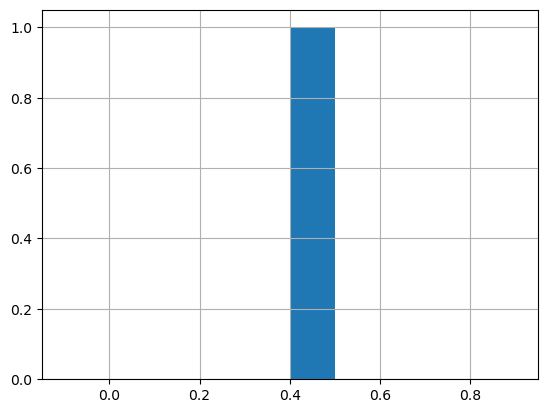

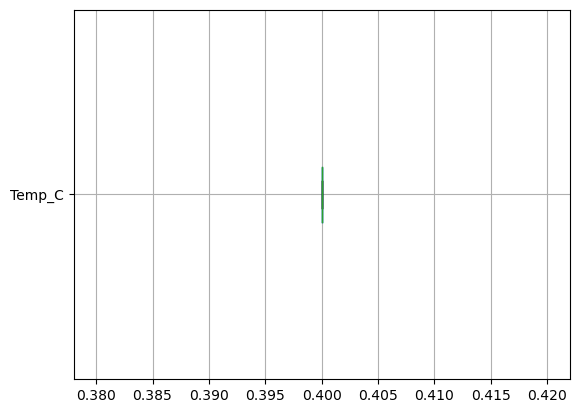

____________________
Drizzle,Snow
moy : 
 1.05
mediane : 
 1.05
mode : 
 0    0.9
1    1.2
Name: Temp_C, dtype: float64
var : 
 0.044999999999999984
ect : 
 0.21213203435596423
skewness : 
 nan
kurtosis : 
 nan


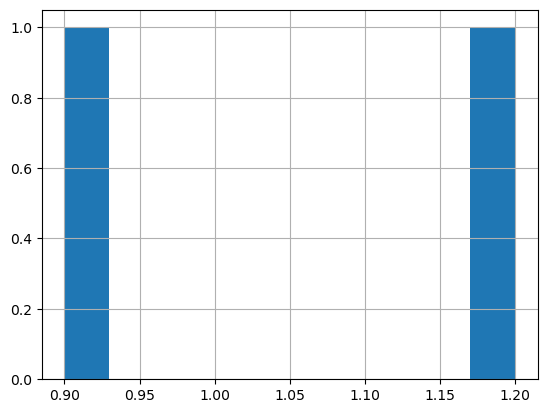

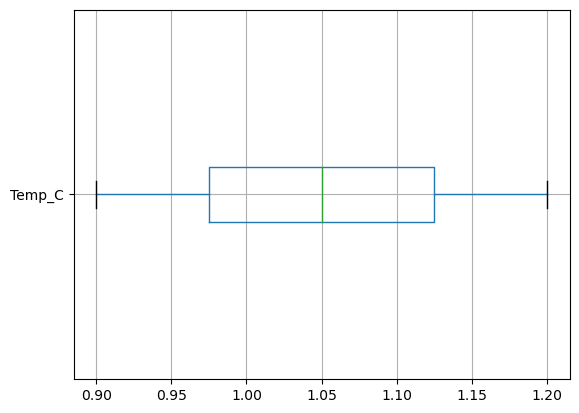

____________________
Rain,Ice Pellets
moy : 
 0.6
mediane : 
 0.6
mode : 
 0    0.6
Name: Temp_C, dtype: float64
var : 
 nan
ect : 
 nan
skewness : 
 nan
kurtosis : 
 nan


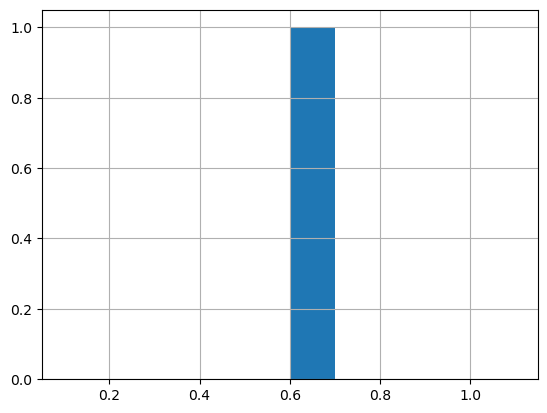

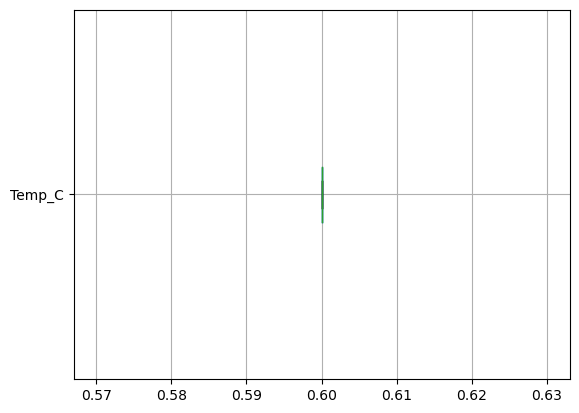

____________________
Drizzle,Snow,Fog
moy : 
 0.6933333333333334
mediane : 
 0.6
mode : 
 0    0.4
Name: Temp_C, dtype: float64
var : 
 0.1006666666666667
ect : 
 0.3172801075810879
skewness : 
 0.27143783406800126
kurtosis : 
 -1.807244332352881


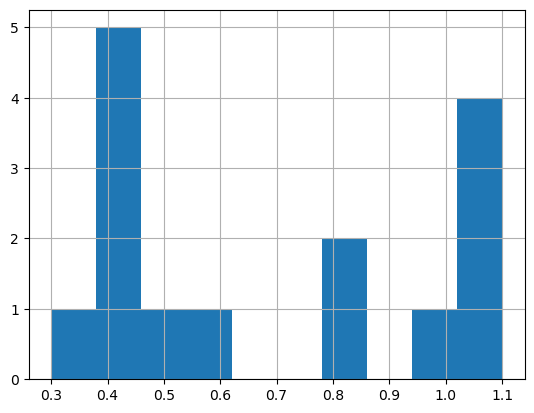

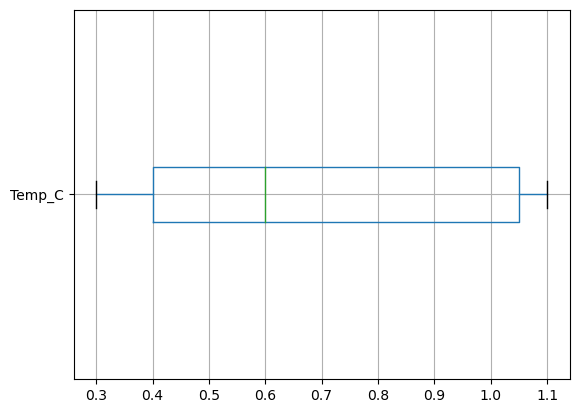

____________________
Rain,Snow Grains
moy : 
 1.9
mediane : 
 1.9
mode : 
 0    1.9
Name: Temp_C, dtype: float64
var : 
 nan
ect : 
 nan
skewness : 
 nan
kurtosis : 
 nan


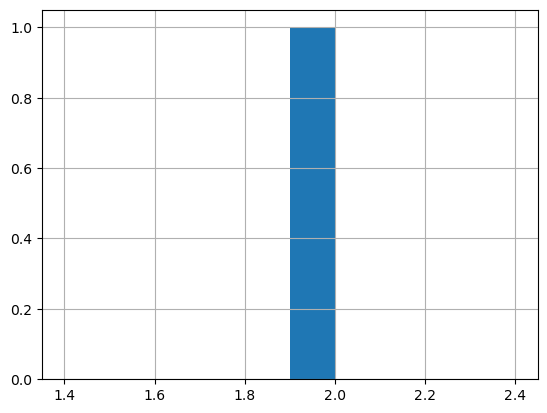

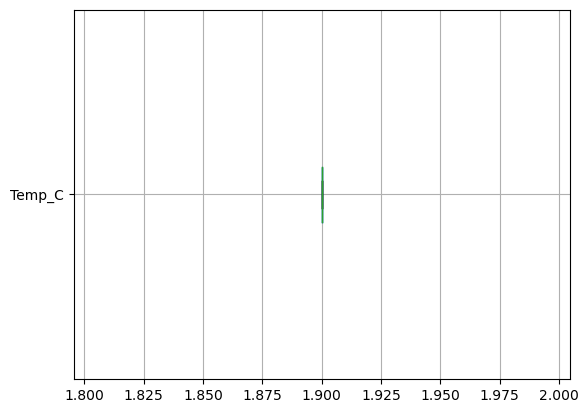

____________________
Rain,Snow,Ice Pellets
moy : 
 1.1
mediane : 
 1.1
mode : 
 0    1.1
Name: Temp_C, dtype: float64
var : 
 0.026666666666666672
ect : 
 0.16329931618554522
skewness : 
 0.0
kurtosis : 
 1.4999999999999964


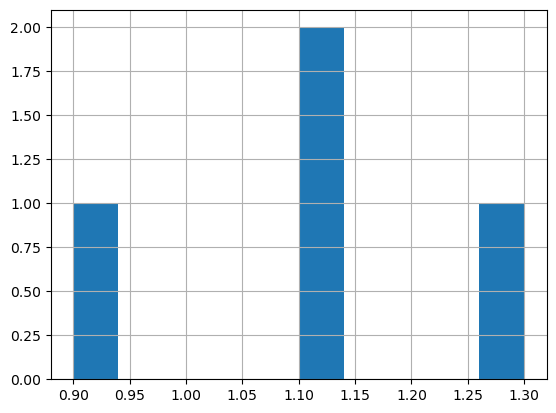

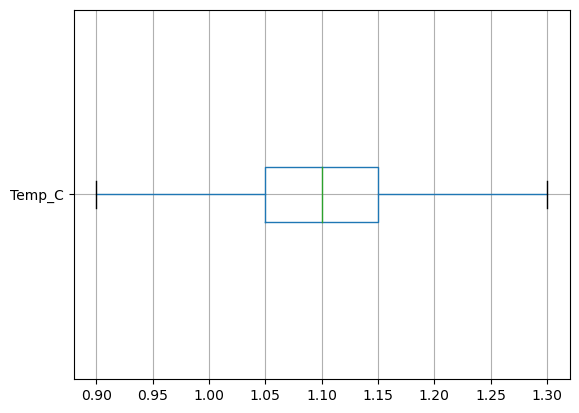

____________________
Snow Showers,Fog
moy : 
 -10.675
mediane : 
 -10.7
mode : 
 0   -11.3
1   -10.9
2   -10.5
3   -10.0
Name: Temp_C, dtype: float64
var : 
 0.309166666666667
ect : 
 0.5560275772537429
skewness : 
 0.2225063676893997
kurtosis : 
 -0.8171693027513545


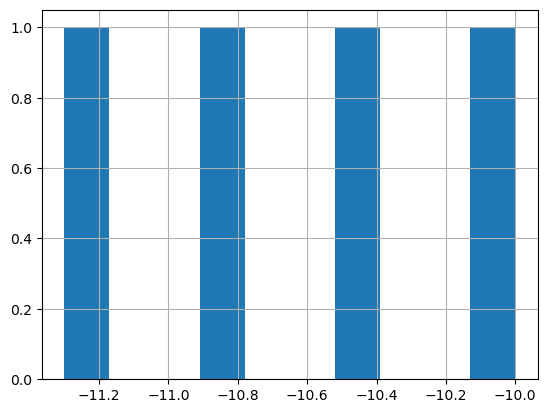

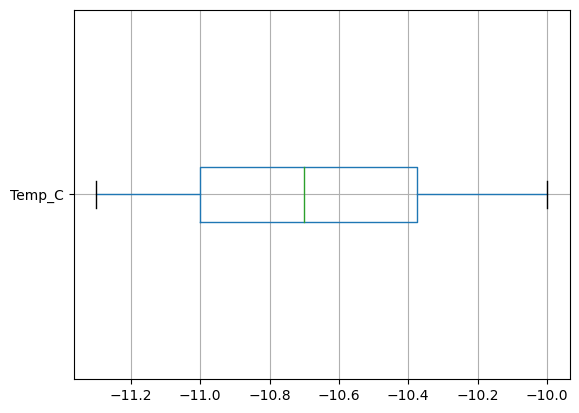

____________________
Moderate Snow,Blowing Snow
moy : 
 -5.45
mediane : 
 -5.45
mode : 
 0   -5.5
1   -5.4
Name: Temp_C, dtype: float64
var : 
 0.0049999999999999645
ect : 
 0.0707106781186545
skewness : 
 nan
kurtosis : 
 nan


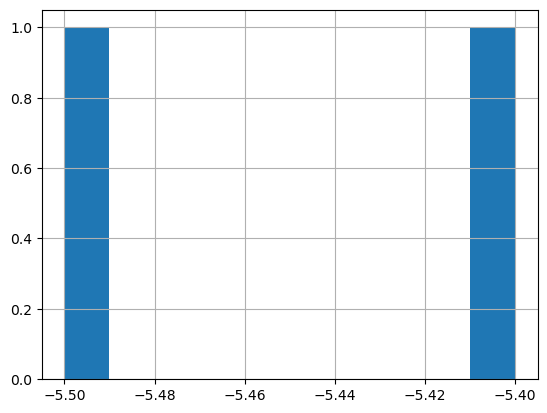

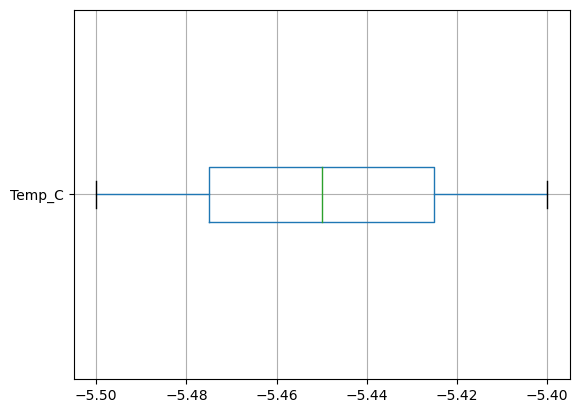

In [40]:
for Wet in data["Weather"].unique():
        subset = data[data.Weather == Wet]
        print("_"*20)
        print(Wet)
        print("moy : \n",subset["Temp_C"].mean())
        print("mediane : \n",subset["Temp_C"].median())
        print("mode : \n",subset["Temp_C"].mode())
        print("var : \n",subset["Temp_C"].var())
        print("ect : \n",subset["Temp_C"].std())
        print("skewness : \n",subset["Temp_C"].skew())
        print("kurtosis : \n",subset["Temp_C"].kurtosis())
        subset["Temp_C"].hist()
        plt.show()
        subset.boxplot(column = "Temp_C" , vert = False)
        plt.show()

In [41]:
data.head()

Date  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  2012-01-01    -1.8              -3.9         86                4   
1  2012-01-01    -1.8              -3.7         87                4   
2  2012-01-01    -1.8              -3.4         89                7   
3  2012-01-01    -1.5              -3.2         88                6   
4  2012-01-01    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  deuz_mois  
0            8.0     101.24                   Fog          1  
1            8.0     101.24                   Fog          1  
2            4.0     101.26  Freezing Drizzle,Fog          1  
3            4.0     101.27  Freezing Drizzle,Fog          1  
4            4.8     101.23                   Fog          1

In [42]:
X = "Weather"
Y = "Temp_C"

sous_echantillon = data.loc[data[Y] < 0, :].copy()
sous_echantillon["Temp_C"] = -sous_echantillon["Temp_C"]
sous_echantillon = sous_echantillon.loc[sous_echantillon["Weather"] != "Fog", :]

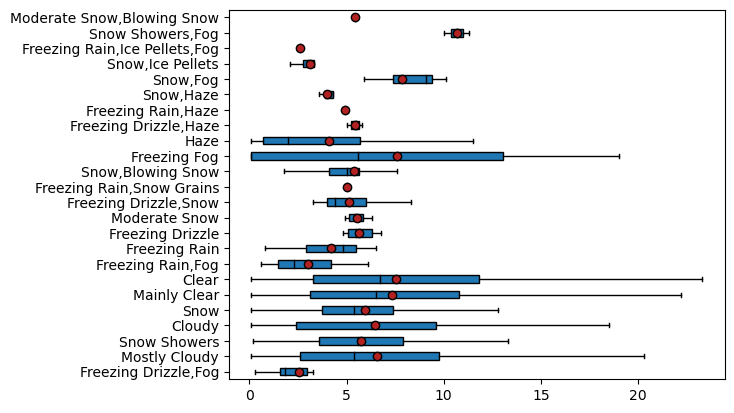

In [43]:
modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])
    
medianprops = {'color':'black'}
meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor':'firebrick'}

plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
           vert=False, patch_artist=True, showmeans=True,meanprops=meanprops)
plt.show()

In [44]:
X = "deuz_mois"
Y = "Weather"
cont = data[[X , Y]].pivot_table(index = X , columns=Y , aggfunc=len, margins= True,margins_name ="Total")
cont

Weather     Clear  Cloudy  Drizzle  Drizzle,Fog  Drizzle,Ice Pellets,Fog  \
deuz_mois                                                                  
1            87.0   201.0     15.0         15.0                      NaN   
2           103.0   192.0      1.0         14.0                      NaN   
3            81.0   105.0      NaN          3.0                      NaN   
4           147.0   184.0      NaN          8.0                      NaN   
5            90.0    96.0      NaN          3.0                      NaN   
6           158.0   185.0      2.0         15.0                      NaN   
7           150.0   101.0      8.0          6.0                      1.0   
8           132.0    89.0      NaN          NaN                      NaN   
9           101.0   172.0      3.0          1.0                      NaN   
10          119.0   129.0      2.0          1.0                      NaN   
11           95.0   214.0      8.0          9.0                      NaN   
12           63.0    60.0      2.0          5.0                      NaN   
Total      1326.0  1728.0     41.0         80.0                      1.0   

Weather    Drizzle,Snow  Drizzle,Snow,Fog    Fog  Freezing Drizzle  \
deuz_mois                                                            
1                   NaN               NaN   36.0               2.0   
2                   NaN               NaN   11.0               NaN   
3                   NaN               NaN    6.0               2.0   
4                   NaN               NaN    5.0               NaN   
5                   NaN               NaN   13.0               1.0   
6                   NaN               NaN   24.0               NaN   
7                   2.0              11.0   13.0               2.0   
8                   NaN               1.0   18.0               NaN   
9                   NaN               3.0    8.0               NaN   
10                  NaN               NaN    NaN               NaN   
11                  NaN               NaN   16.0               NaN   
12                  NaN               NaN    NaN               NaN   
Total               2.0              15.0  150.0               7.0   

Weather    Freezing Drizzle,Fog  ...  Snow,Haze  Snow,Ice Pellets  \
deuz_mois                        ...                                
1                           2.0  ...        5.0               1.0   
2                           NaN  ...        NaN               NaN   
3                           1.0  ...        NaN               NaN   
4                           2.0  ...        NaN               1.0   
5                           NaN  ...        NaN               NaN   
6                           NaN  ...        NaN               NaN   
7                           NaN  ...        NaN               3.0   
8                           NaN  ...        NaN               NaN   
9                           NaN  ...        NaN               NaN   
10                          NaN  ...        NaN               NaN   
11                          1.0  ...        NaN               1.0   
12                          NaN  ...        NaN               NaN   
Total                       6.0  ...        5.0               6.0   

Weather    Thunderstorms  Thunderstorms,Heavy Rain Showers  \
deuz_mois                                                    
1                    NaN                               NaN   
2                    1.0                               NaN   
3                    NaN                               NaN   
4                    NaN                               NaN   
5                    NaN                               NaN   
6                    1.0                               NaN   
7                    NaN                               NaN   
8                    NaN                               NaN   
9                    NaN                               NaN   
10                   NaN                               NaN   
11                   NaN    

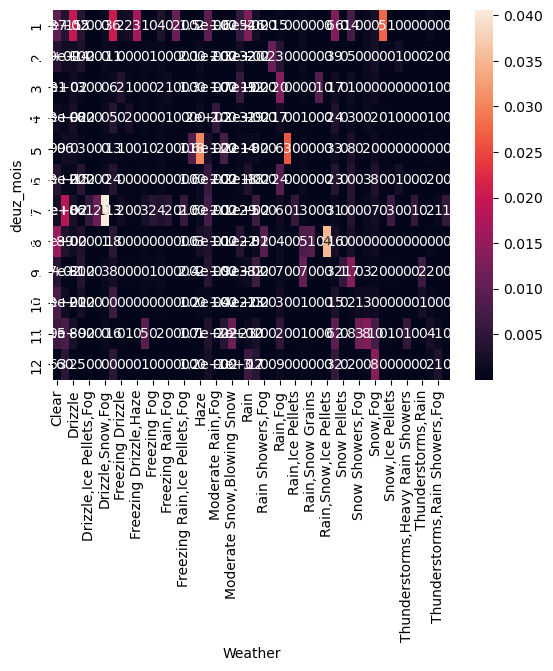

In [45]:
import seaborn as sns 
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n=len(data)
indep = tx.dot(ty)/n
c = cont.fillna(0)
measure =(c-indep)**2/indep
xi_n = measure.sum().sum()
table= measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

In [46]:
data.Weather.unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

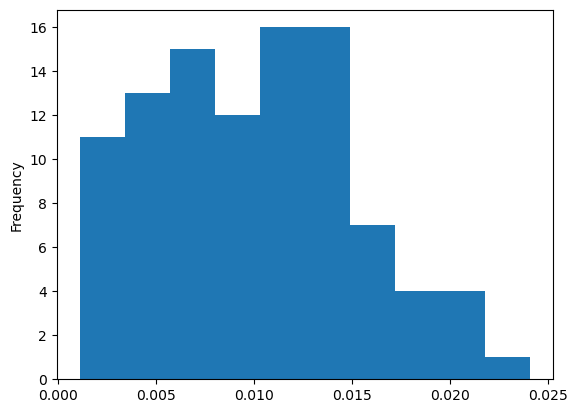

In [47]:
data2 = data[(data["Temp_C"] < 30) & (data["Temp_C"] > 20) ]
data2["Temp_C"].value_counts(normalize = True).plot(kind = 'hist')
plt.show()

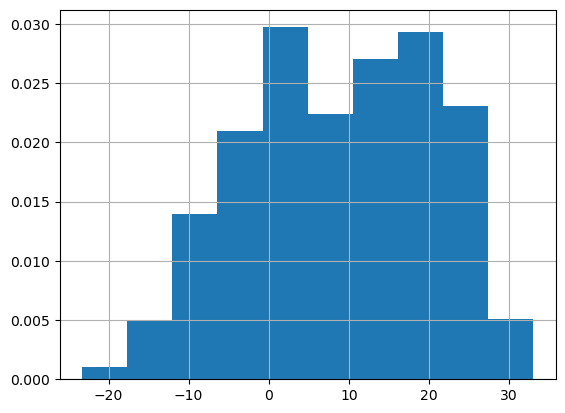

In [48]:
data["Temp_C"].hist(density = True)
plt.show()

In [49]:
data.head()

Date  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  2012-01-01    -1.8              -3.9         86                4   
1  2012-01-01    -1.8              -3.7         87                4   
2  2012-01-01    -1.8              -3.4         89                7   
3  2012-01-01    -1.5              -3.2         88                6   
4  2012-01-01    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  deuz_mois  
0            8.0     101.24                   Fog          1  
1            8.0     101.24                   Fog          1  
2            4.0     101.26  Freezing Drizzle,Fog          1  
3            4.0     101.27  Freezing Drizzle,Fog          1  
4            4.8     101.23                   Fog          1

In [50]:
data.rename(columns = {"Date":"Date/Time"},inplace= True)

In [51]:
data.head(2)

Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  2012-01-01    -1.8              -3.9         86                4   
1  2012-01-01    -1.8              -3.7         87                4   

   Visibility_km  Press_kPa Weather  deuz_mois  
0            8.0     101.24     Fog          1  
1            8.0     101.24     Fog          1

********************
Fog
moy
 6.248
Mode
 0    9.7
Name: Visibility_km, dtype: float64
Var
 10.647747651006743


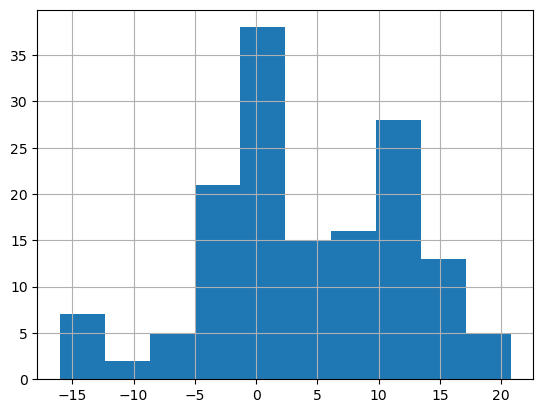

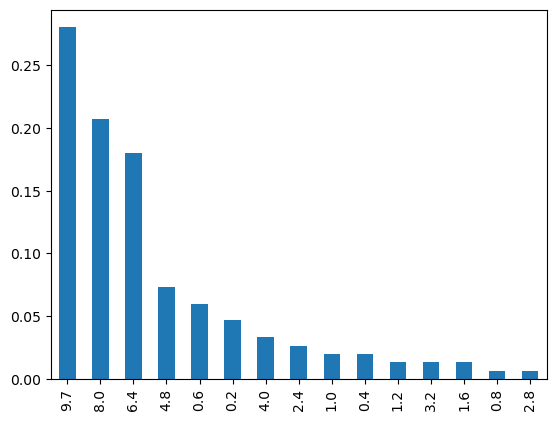

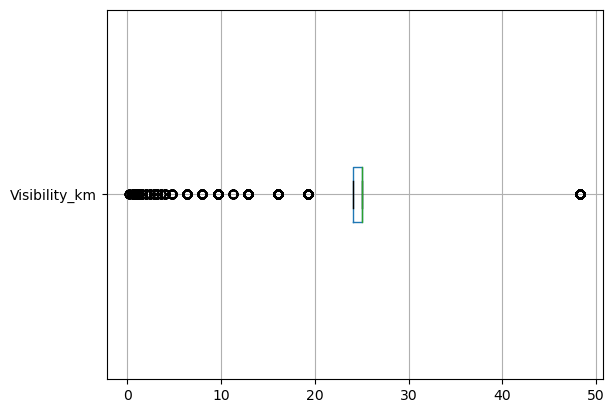

********************
Freezing Drizzle,Fog
moy
 5.266666666666667
Mode
 0    4.0
Name: Visibility_km, dtype: float64
Var
 4.506666666666666


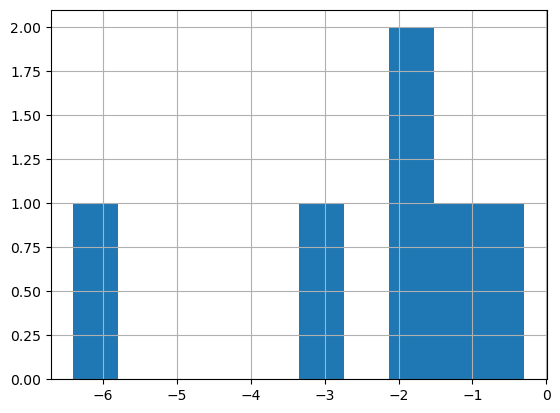

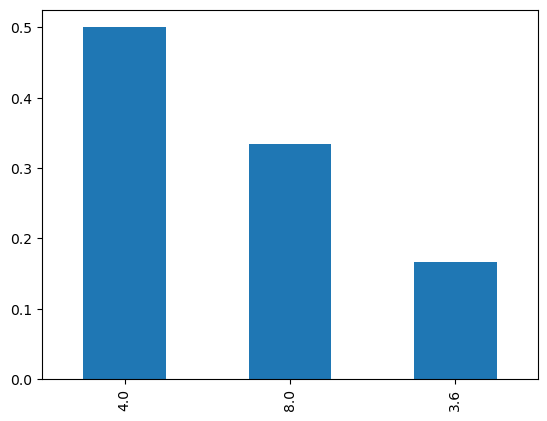

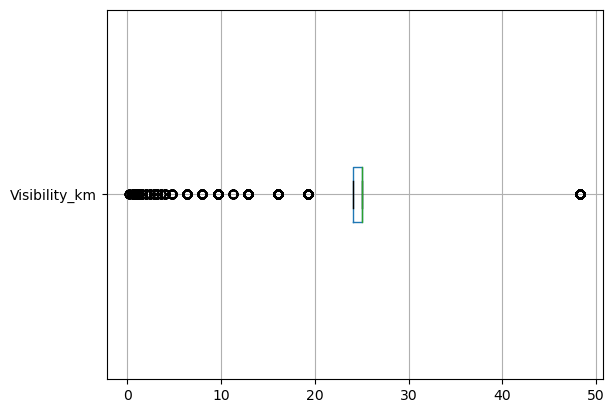

********************
Mostly Cloudy
moy
 31.253842435959402
Mode
 0    25.0
Name: Visibility_km, dtype: float64
Var
 121.32704156316652


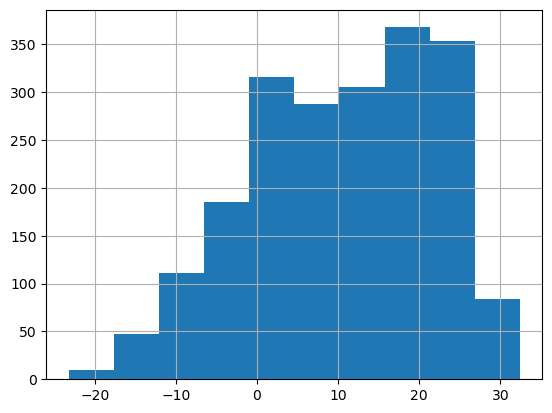

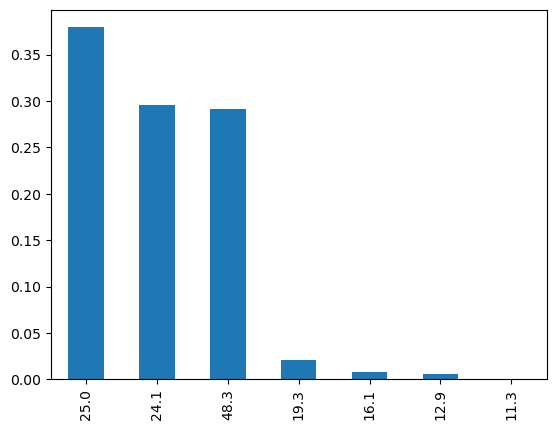

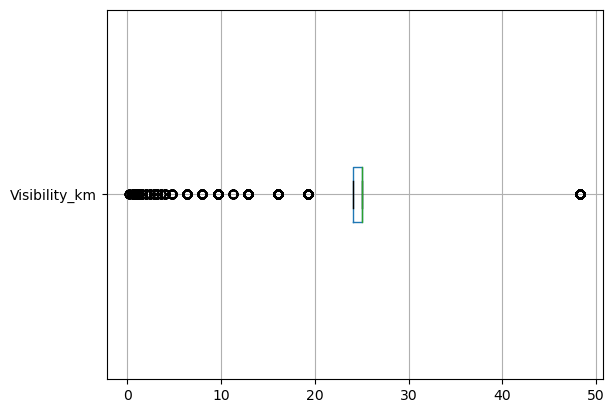

********************
Cloudy
moy
 26.625752314814818
Mode
 0    25.0
Name: Visibility_km, dtype: float64
Var
 78.07864737810675


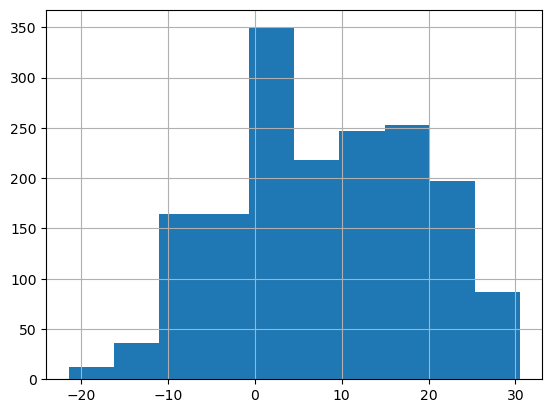

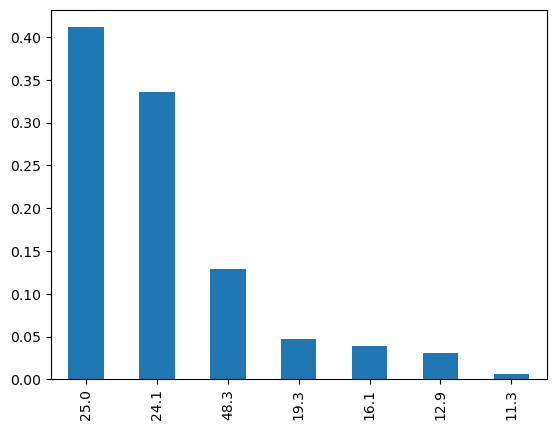

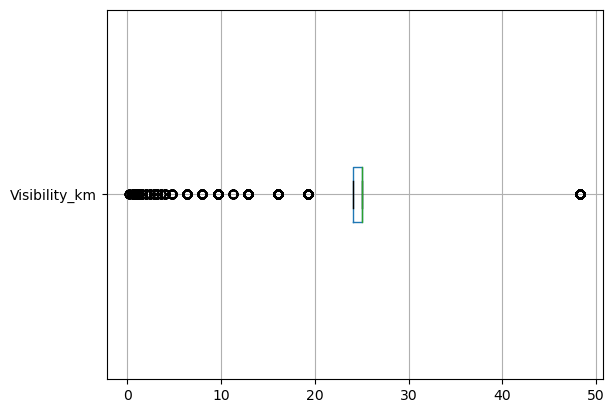

********************
Rain
moy
 18.85653594771242
Mode
 0    24.1
Name: Visibility_km, dtype: float64
Var
 40.610203042965736


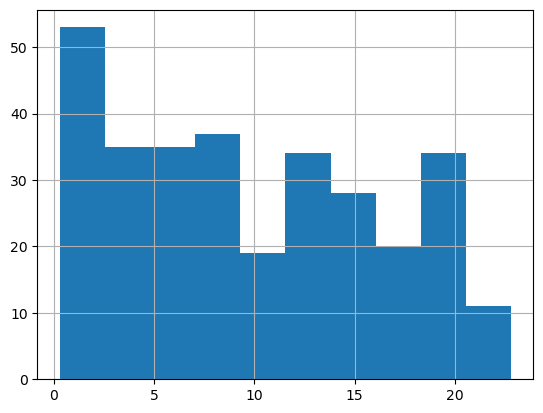

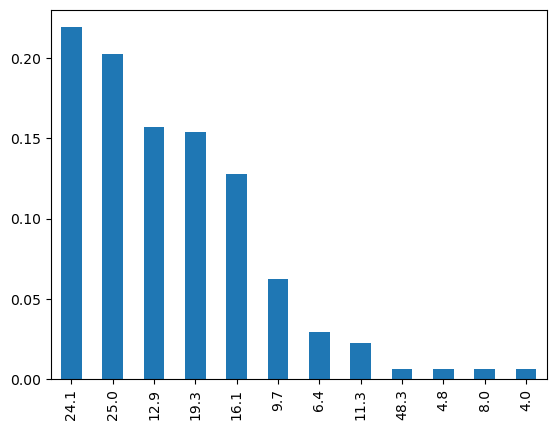

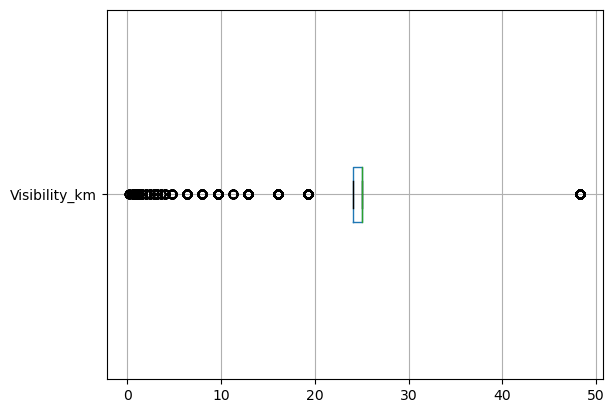

********************
Rain Showers
moy
 22.81648936170213
Mode
 0    25.0
Name: Visibility_km, dtype: float64
Var
 23.522988679030608


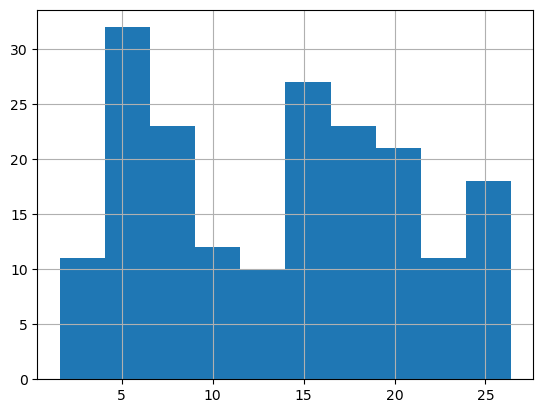

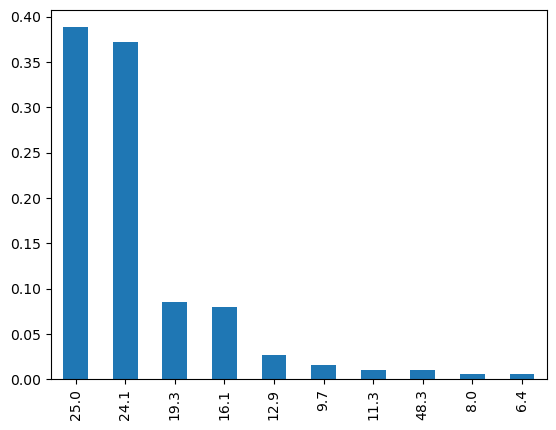

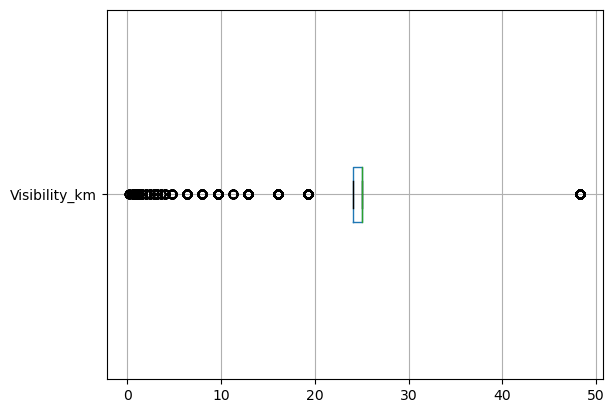

********************
Mainly Clear
moy
 34.26486229819563
Mode
 0    48.3
Name: Visibility_km, dtype: float64
Var
 140.42235620430714


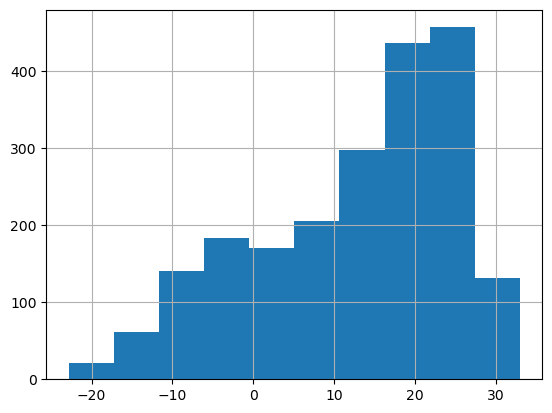

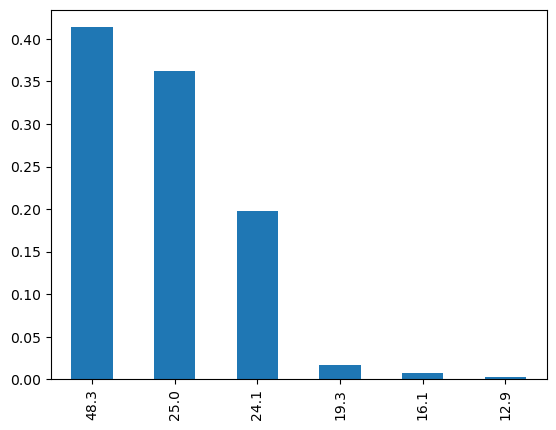

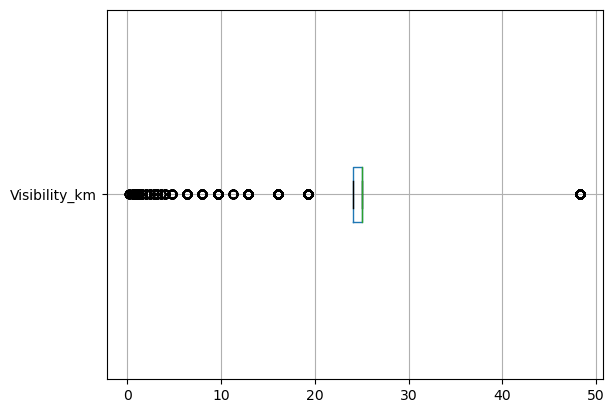

********************
Snow Showers
moy
 20.158333333333335
Mode
 0    25.0
Name: Visibility_km, dtype: float64
Var
 55.055014124293784


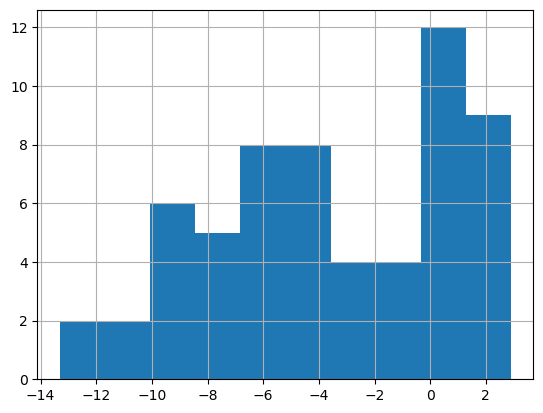

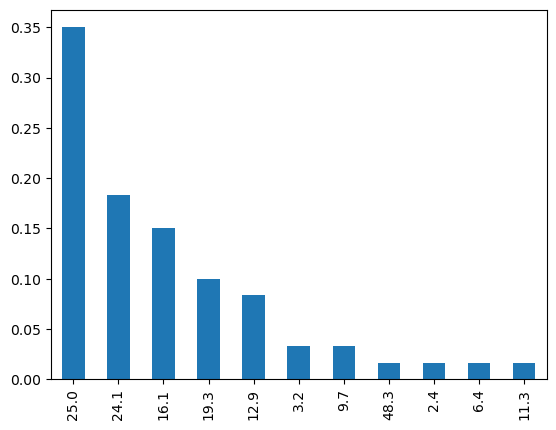

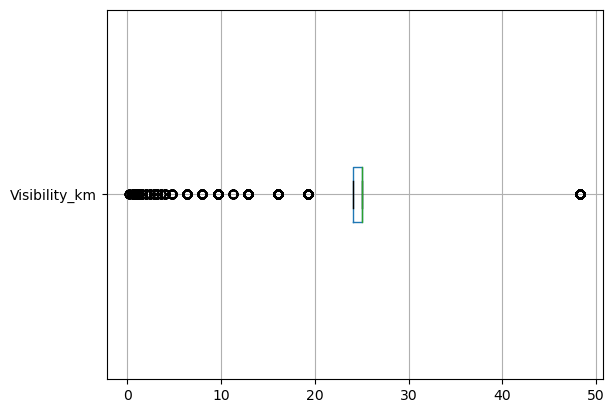

********************
Snow
moy
 11.171794871794871
Mode
 0    25.0
Name: Visibility_km, dtype: float64
Var
 70.94778854393242


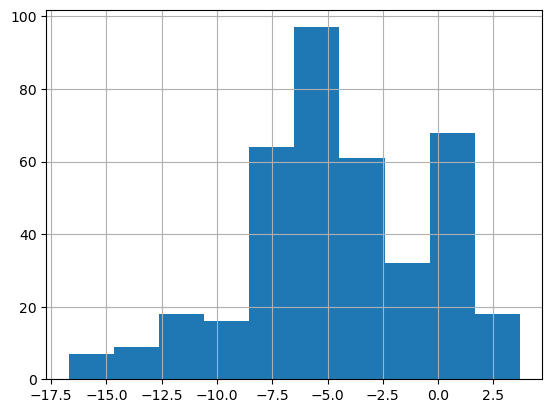

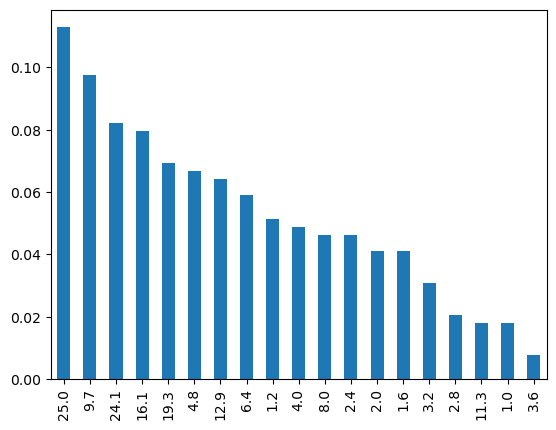

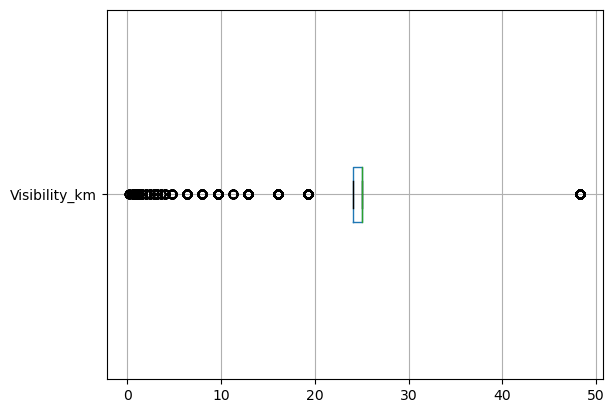

********************
Clear
moy
 30.153242835595776
Mode
 0    25.0
Name: Visibility_km, dtype: float64
Var
 104.1933592874021


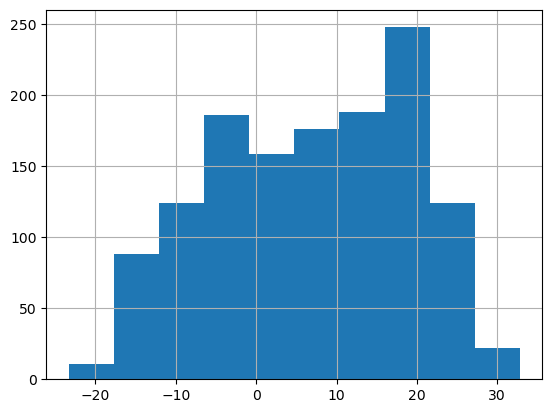

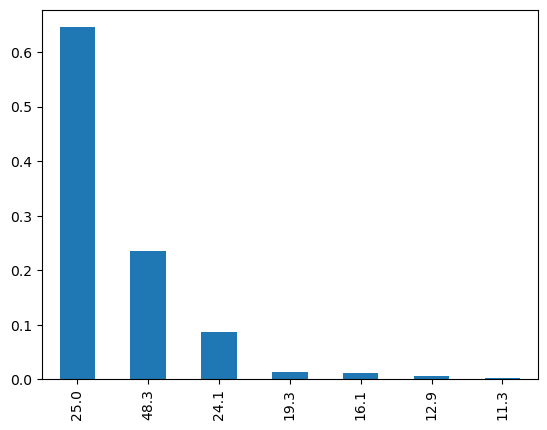

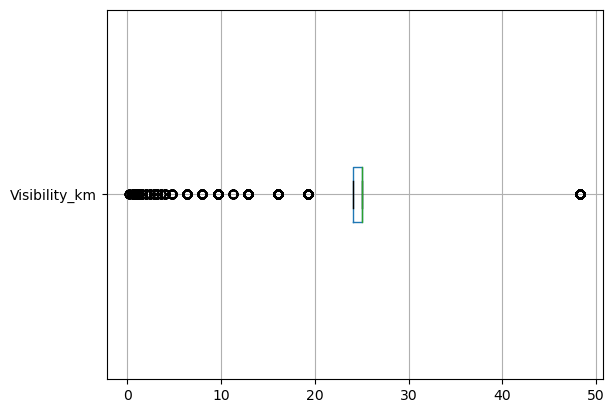

********************
Freezing Rain,Fog
moy
 7.55
Mode
 0    9.7
Name: Visibility_km, dtype: float64
Var
 10.67


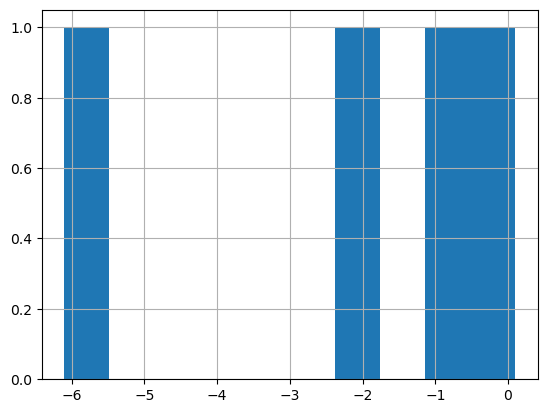

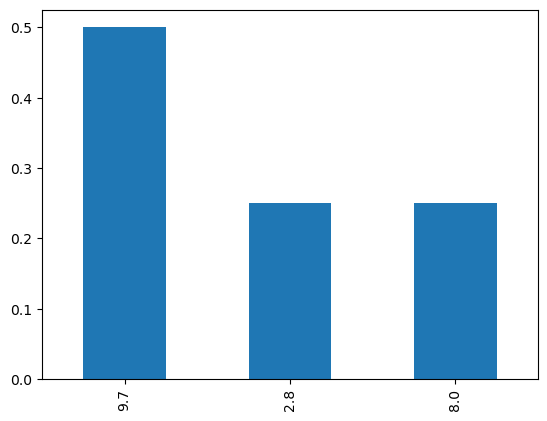

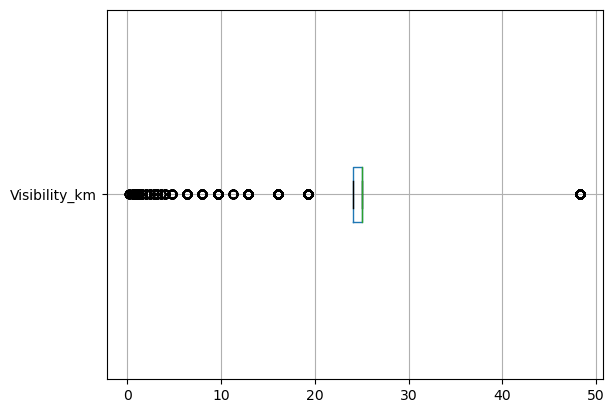

********************
Freezing Rain
moy
 8.242857142857144
Mode
 0    8.0
Name: Visibility_km, dtype: float64
Var
 14.74725274725275


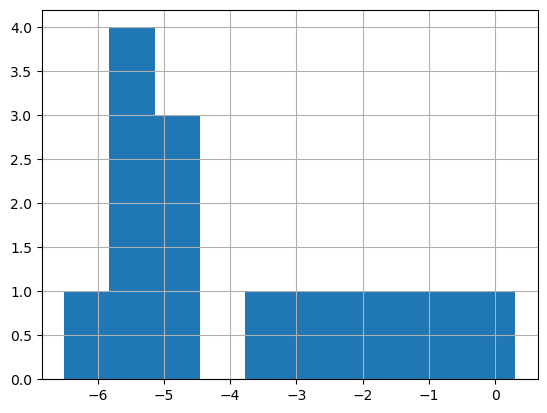

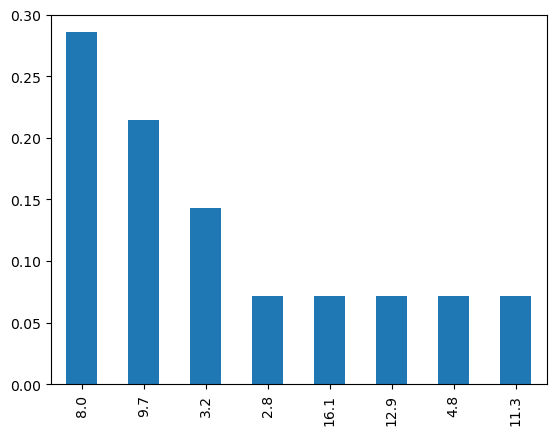

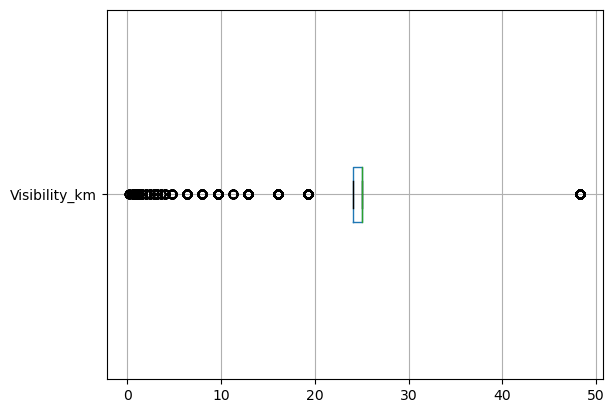

********************
Freezing Drizzle
moy
 9.2
Mode
 0     9.7
1    12.9
Name: Visibility_km, dtype: float64
Var
 9.420000000000002


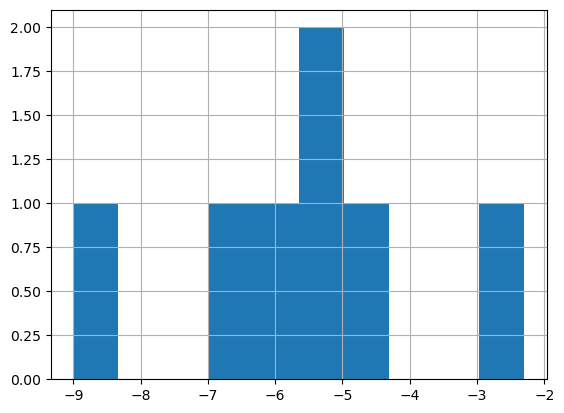

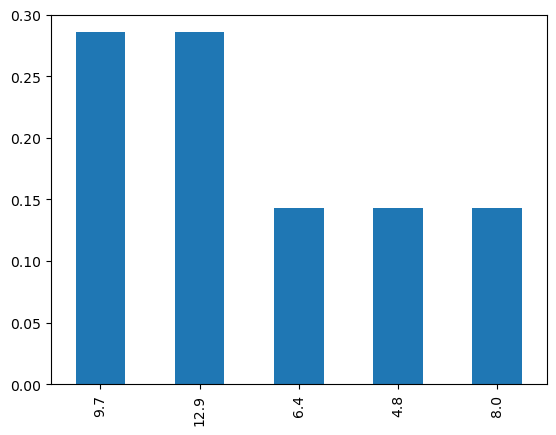

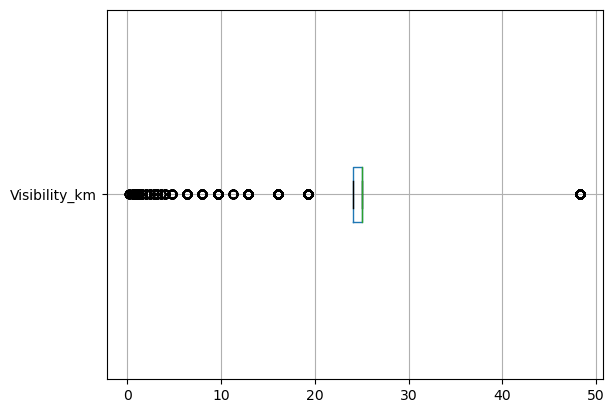

********************
Rain,Snow
moy
 11.672222222222224
Mode
 0     8.0
1    25.0
Name: Visibility_km, dtype: float64
Var
 63.663300653594796


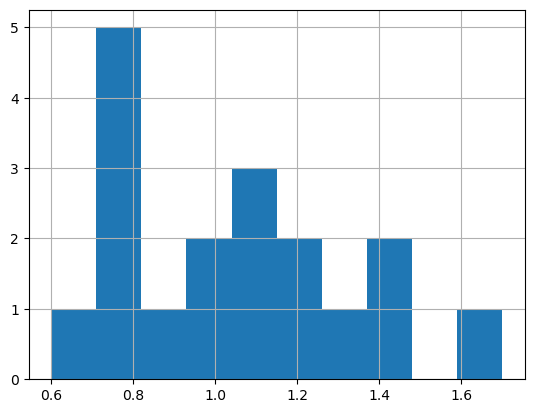

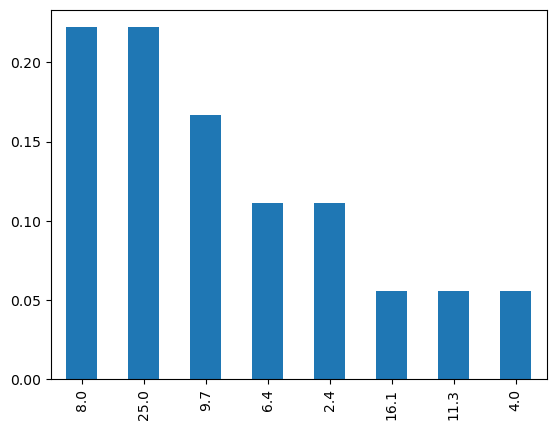

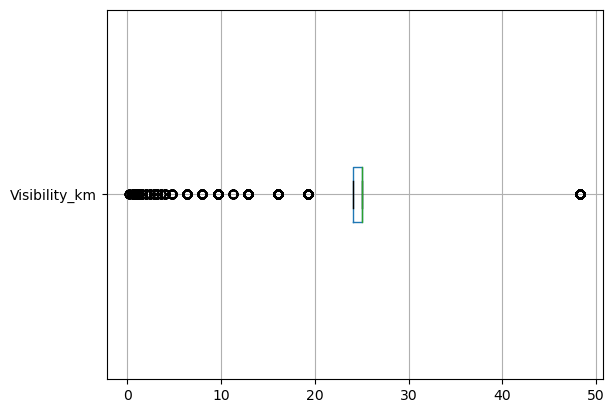

********************
Moderate Snow
moy
 0.75
Mode
 0    0.8
Name: Visibility_km, dtype: float64
Var
 0.010000000000000007


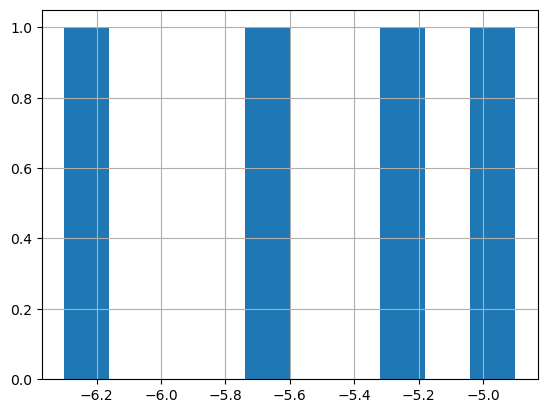

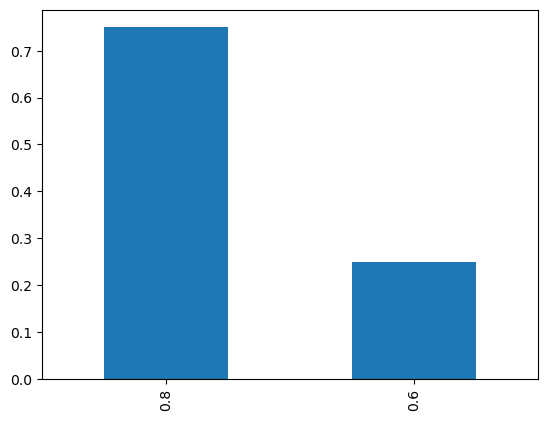

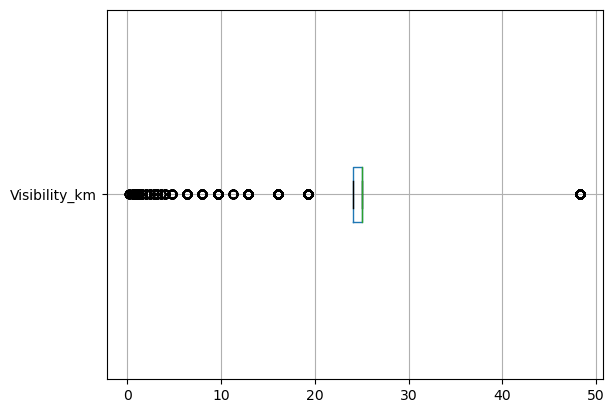

********************
Freezing Drizzle,Snow
moy
 5.872727272727272
Mode
 0    4.8
Name: Visibility_km, dtype: float64
Var
 10.272181818181817


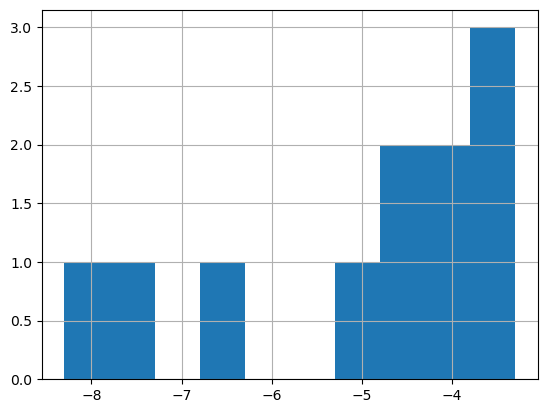

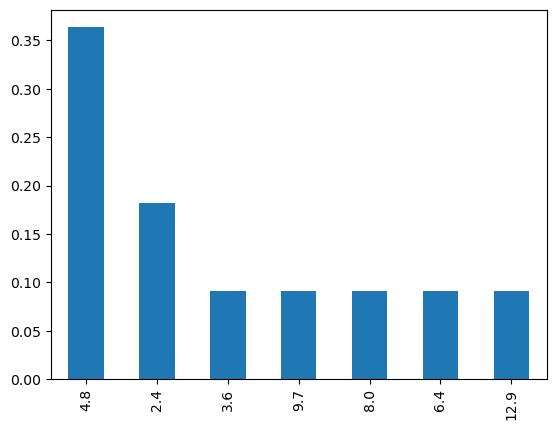

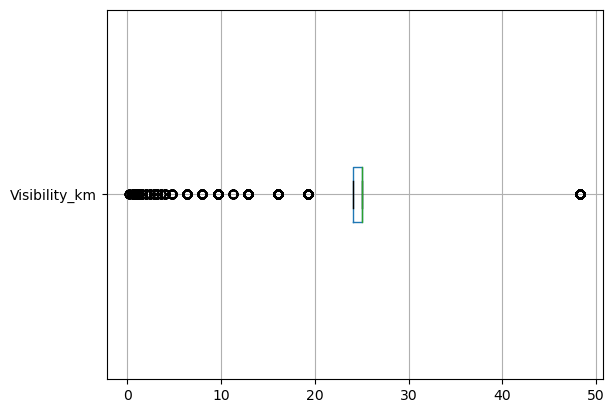

********************
Freezing Rain,Snow Grains
moy
 4.8
Mode
 0    4.8
Name: Visibility_km, dtype: float64
Var
 nan


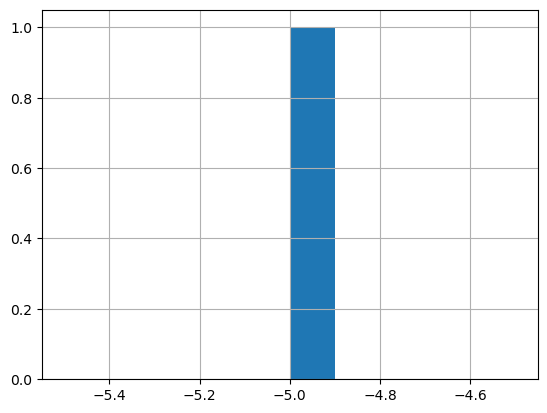

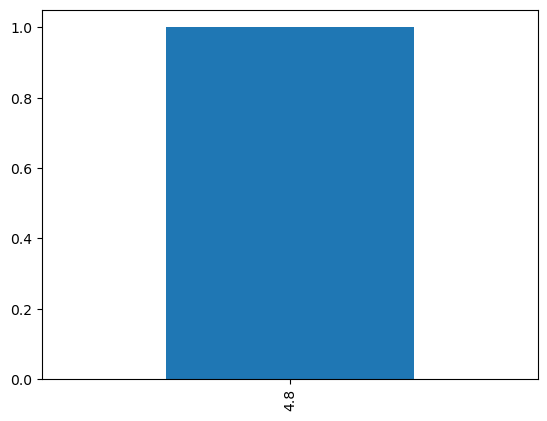

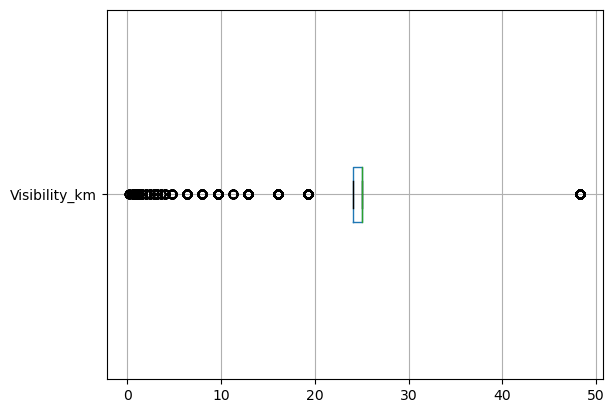

********************
Snow,Blowing Snow
moy
 4.105263157894737
Mode
 0    0.6
1    9.7
Name: Visibility_km, dtype: float64
Var
 13.794970760233912


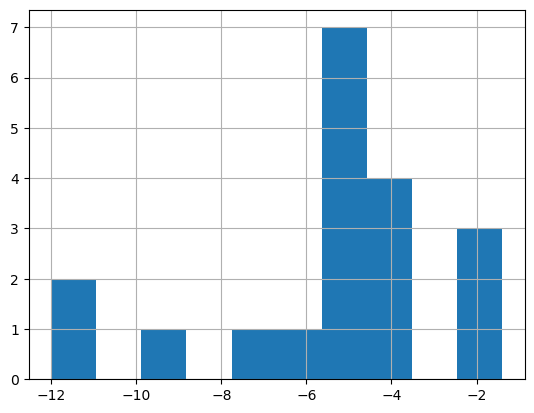

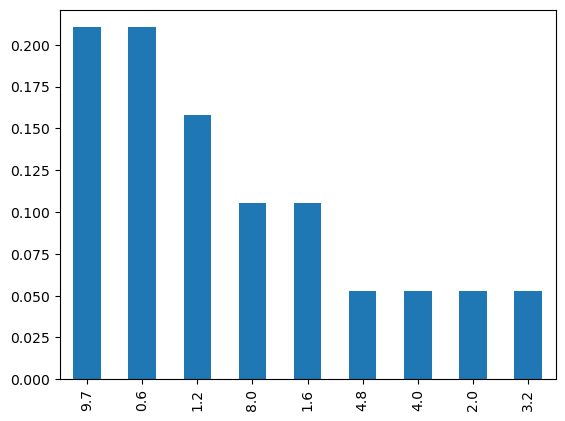

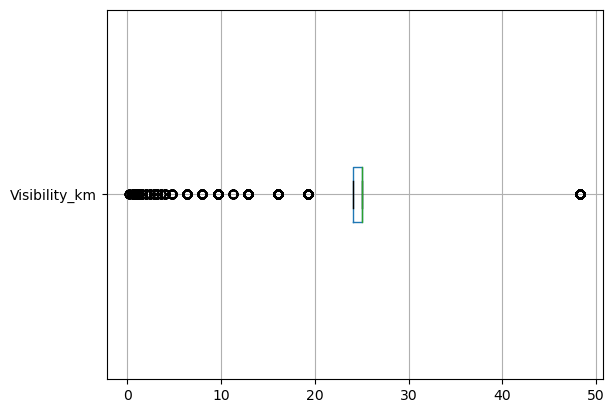

********************
Freezing Fog
moy
 0.6500000000000001
Mode
 0    0.8
Name: Visibility_km, dtype: float64
Var
 0.09000000000000001


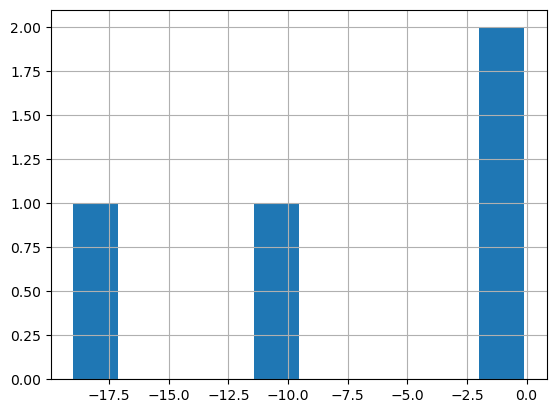

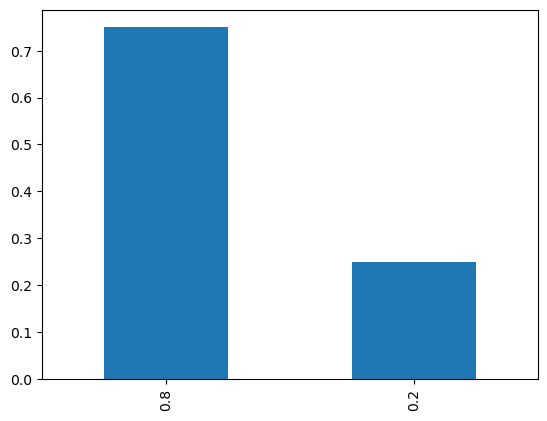

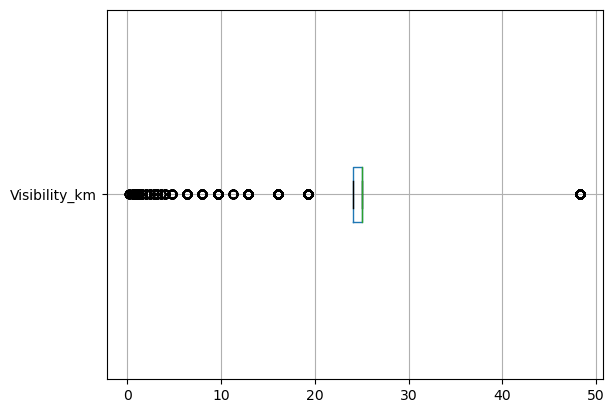

********************
Haze
moy
 7.831249999999999
Mode
 0    8.0
Name: Visibility_km, dtype: float64
Var
 2.8102916666666653


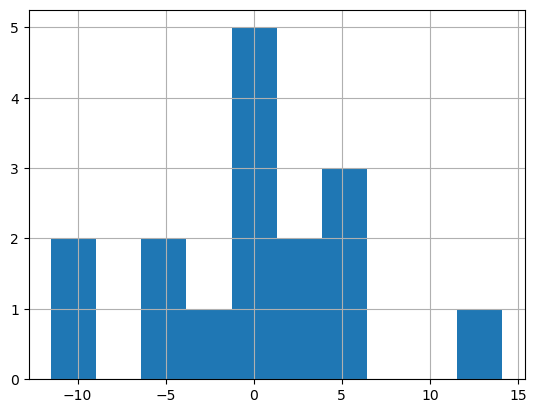

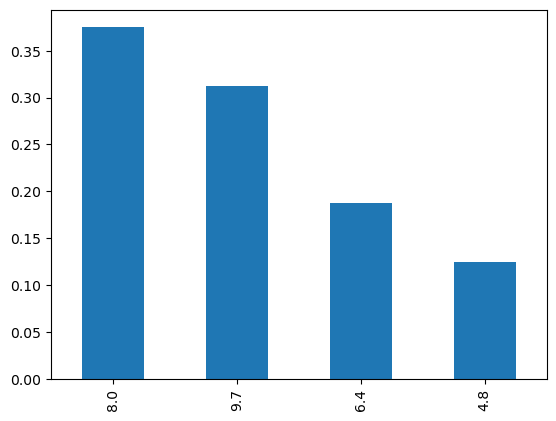

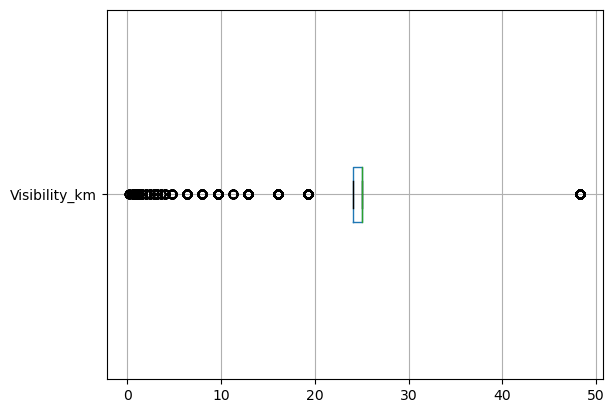

********************
Rain,Fog
moy
 6.873275862068965
Mode
 0    9.7
Name: Visibility_km, dtype: float64
Var
 5.325105697151424


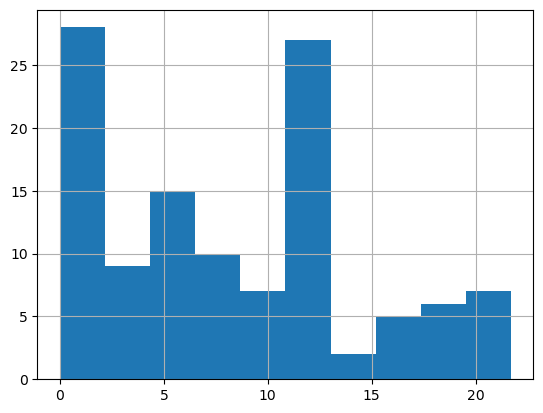

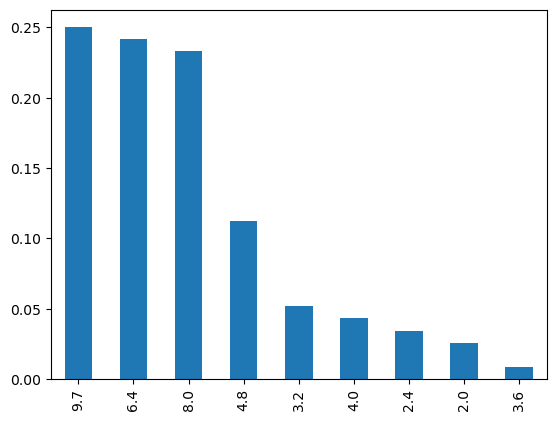

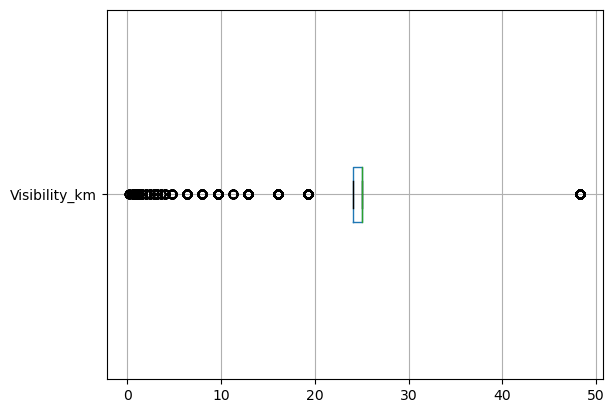

********************
Drizzle,Fog
moy
 5.2575
Mode
 0    2.4
1    9.7
Name: Visibility_km, dtype: float64
Var
 7.417411392405059


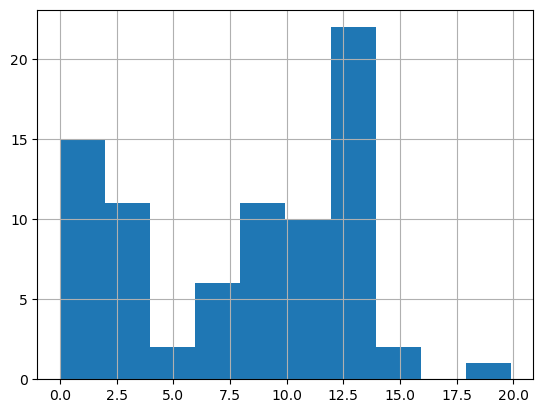

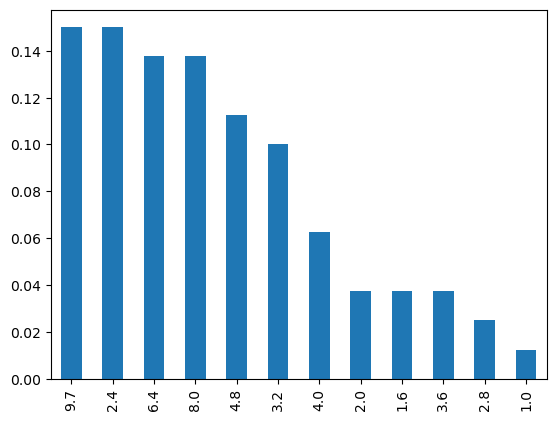

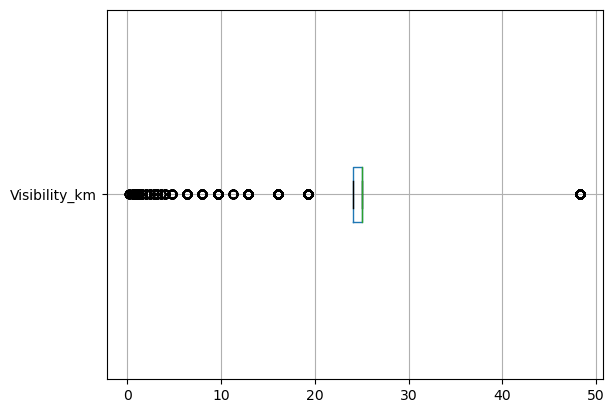

********************
Drizzle
moy
 17.931707317073172
Mode
 0    24.1
Name: Visibility_km, dtype: float64
Var
 34.706219512195126


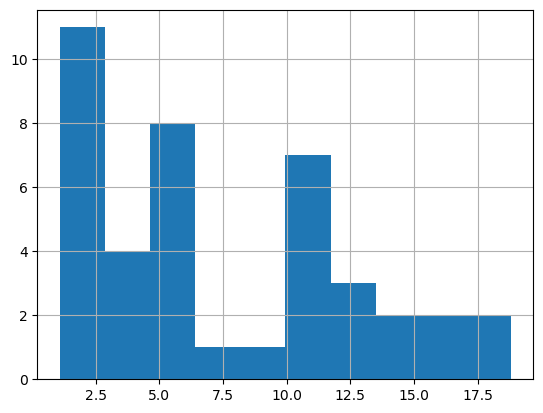

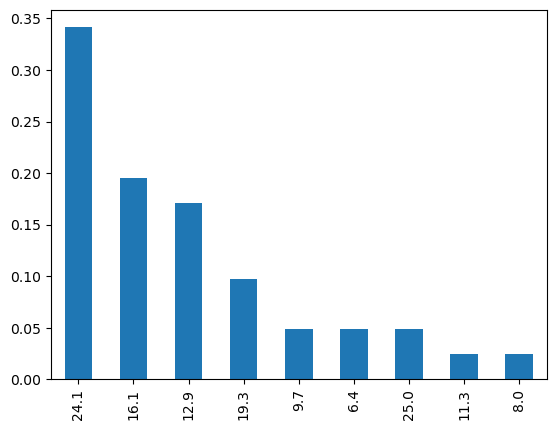

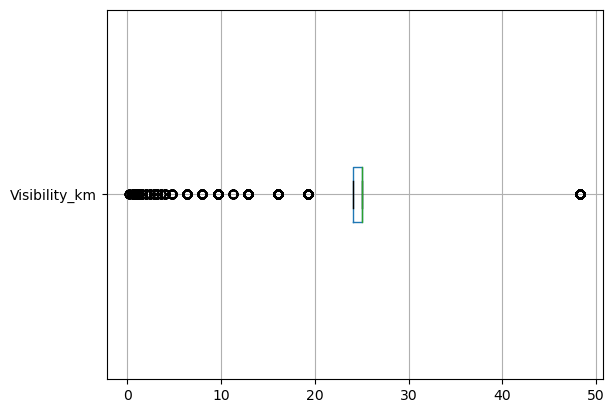

********************
Freezing Drizzle,Haze
moy
 2.6666666666666665
Mode
 0    2.0
Name: Visibility_km, dtype: float64
Var
 1.3333333333333333


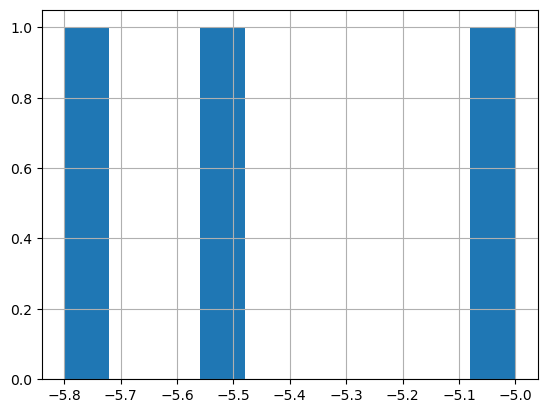

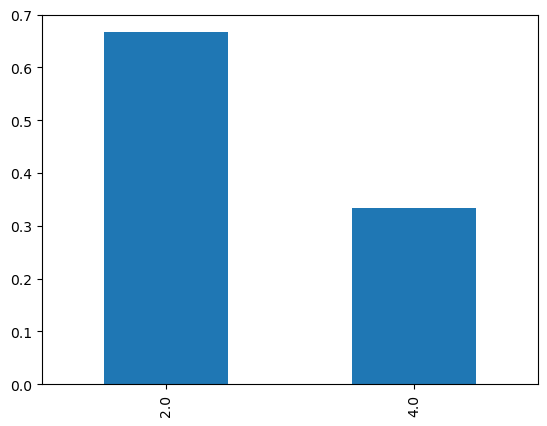

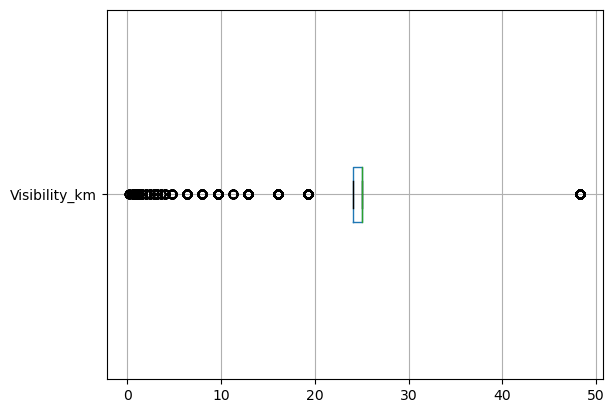

********************
Freezing Rain,Haze
moy
 2.4
Mode
 0    2.0
1    2.8
Name: Visibility_km, dtype: float64
Var
 0.31999999999999984


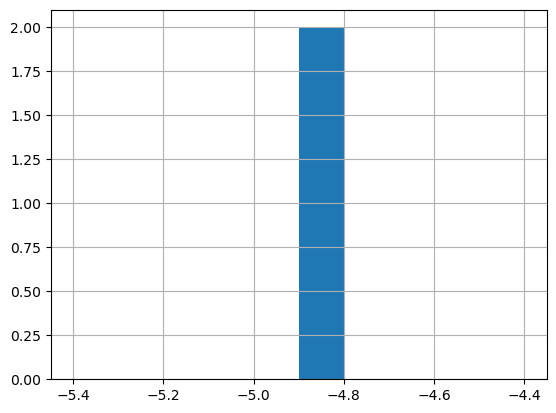

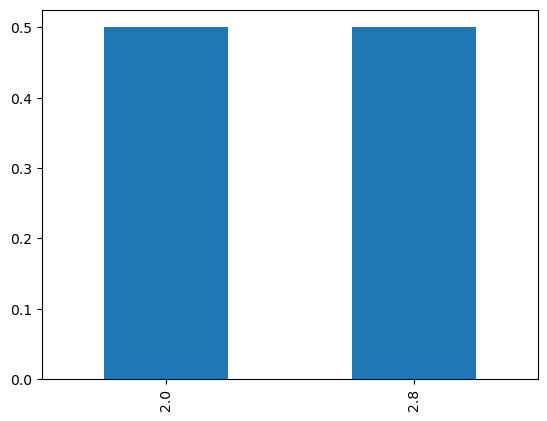

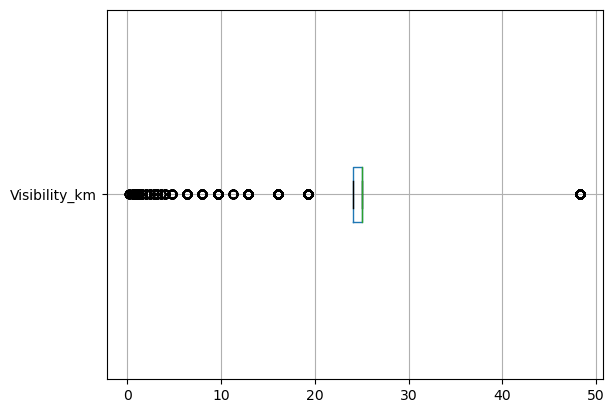

********************
Snow,Haze
moy
 4.64
Mode
 0    4.0
Name: Visibility_km, dtype: float64
Var
 1.0880000000000003


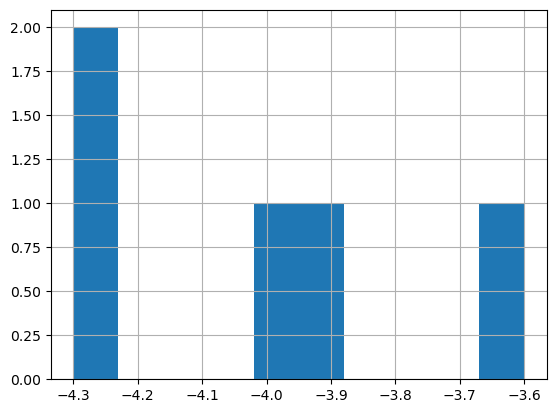

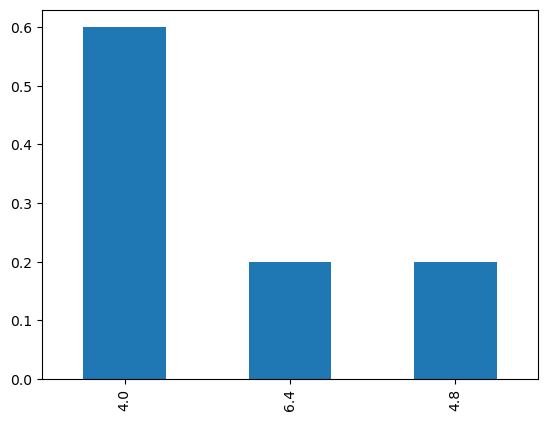

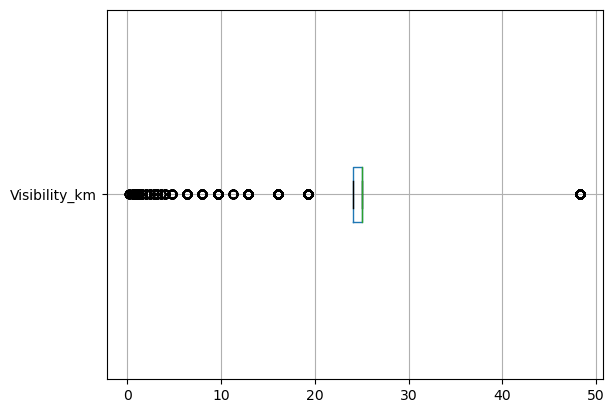

********************
Snow,Fog
moy
 4.537837837837837
Mode
 0    6.4
Name: Visibility_km, dtype: float64
Var
 6.3168618618618595


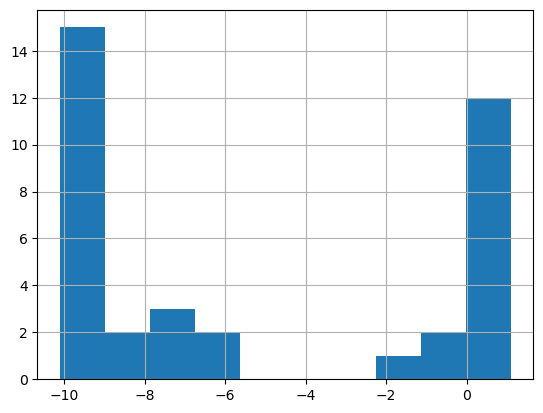

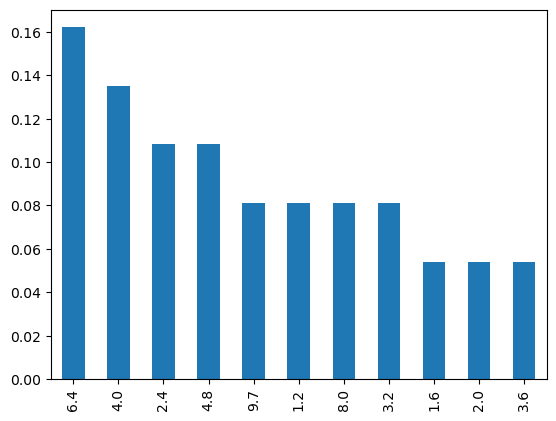

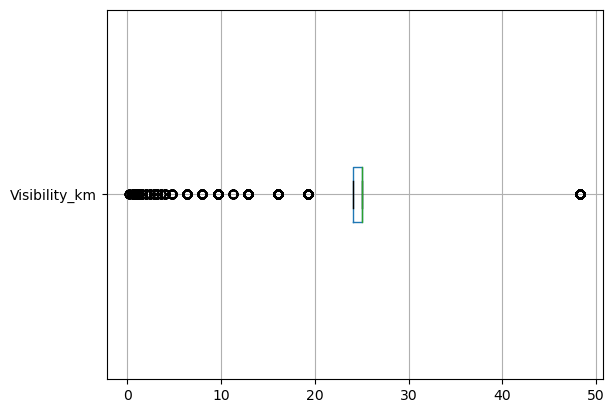

********************
Snow,Ice Pellets
moy
 7.416666666666667
Mode
 0    8.0
Name: Visibility_km, dtype: float64
Var
 7.689666666666669


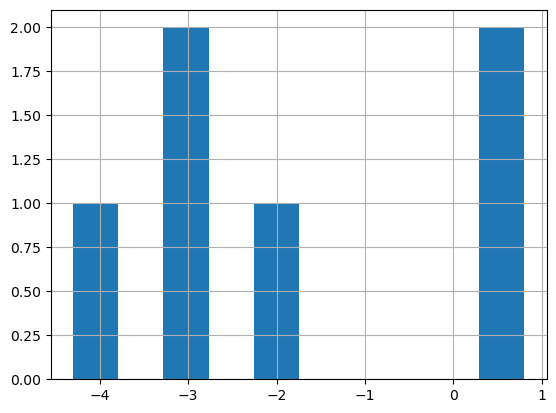

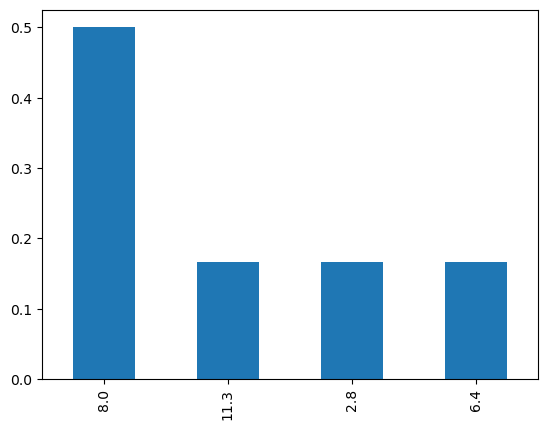

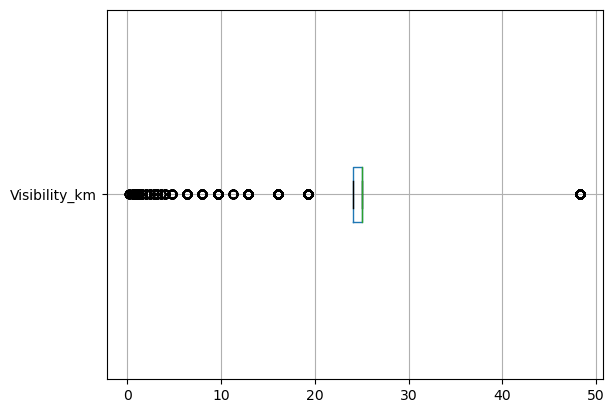

********************
Rain,Haze
moy
 6.7
Mode
 0    4.0
1    6.4
2    9.7
Name: Visibility_km, dtype: float64
Var
 8.189999999999998


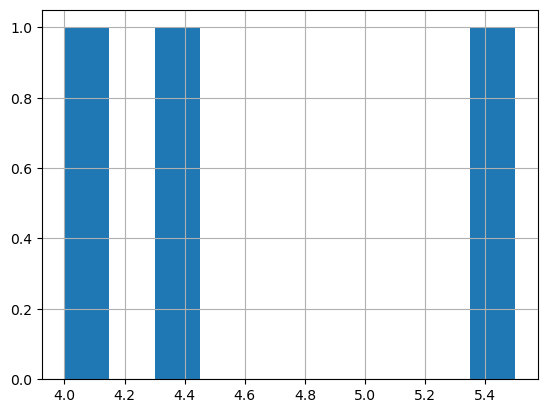

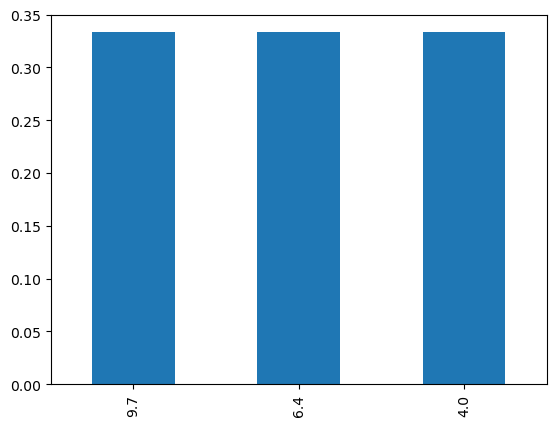

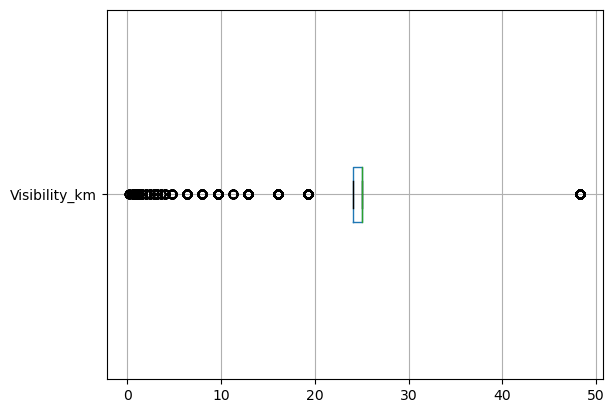

********************
Thunderstorms,Rain
moy
 19.833333333333332
Mode
 0    16.1
1    19.3
2    24.1
Name: Visibility_km, dtype: float64
Var
 16.21333333333333


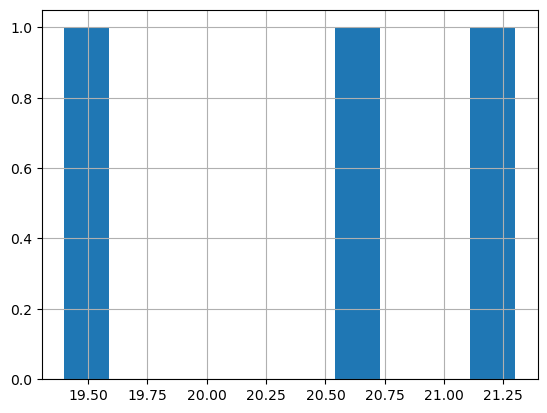

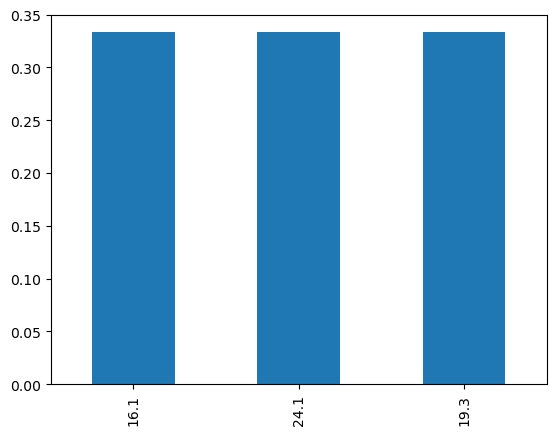

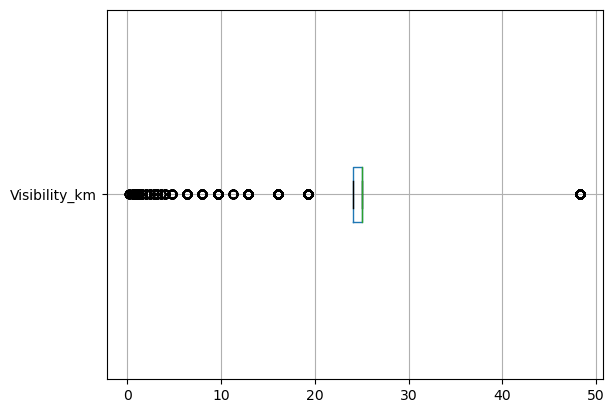

********************
Thunderstorms,Rain Showers
moy
 15.89375
Mode
 0    12.9
Name: Visibility_km, dtype: float64
Var
 48.277958333333345


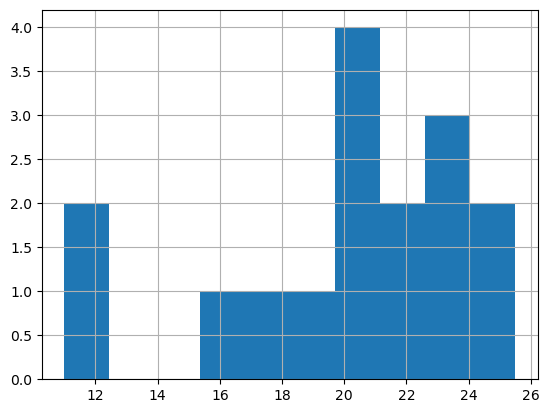

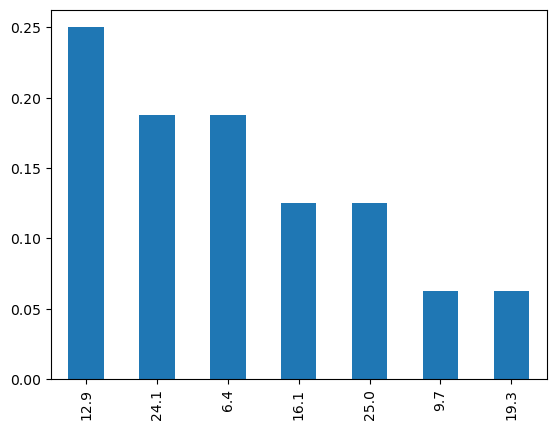

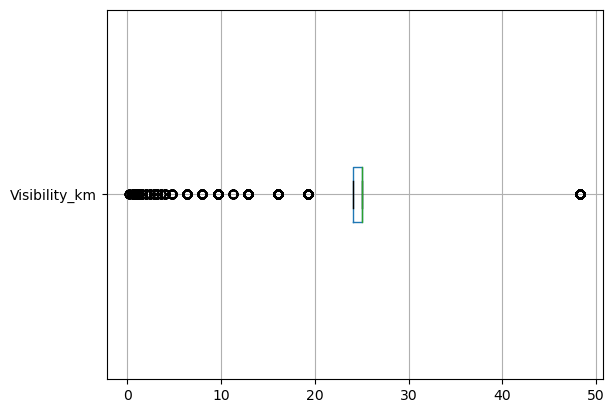

********************
Thunderstorms,Heavy Rain Showers
moy
 2.4
Mode
 0    2.4
Name: Visibility_km, dtype: float64
Var
 nan


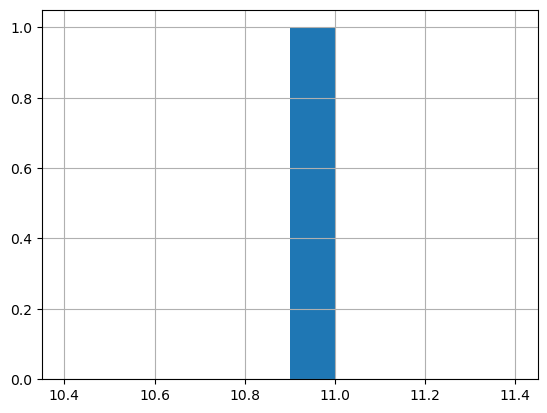

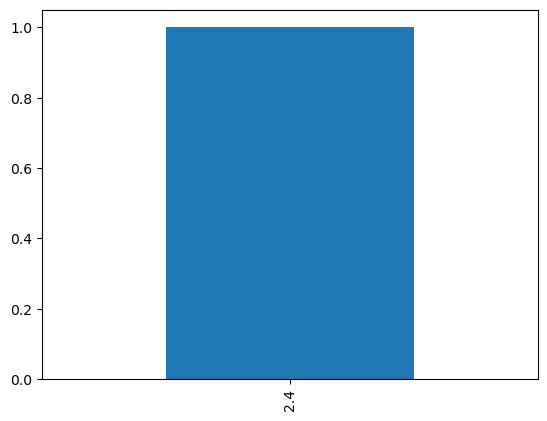

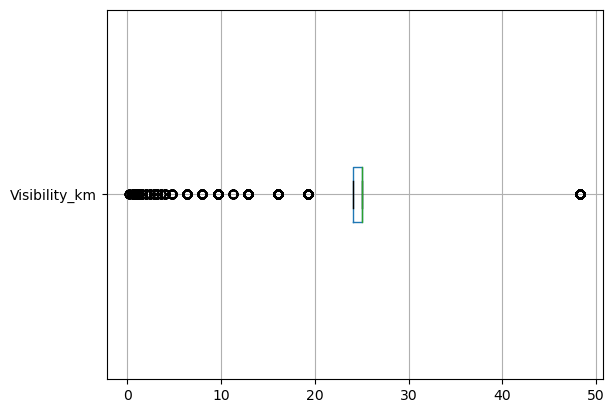

********************
Thunderstorms,Rain Showers,Fog
moy
 9.7
Mode
 0    9.7
Name: Visibility_km, dtype: float64
Var
 0.0


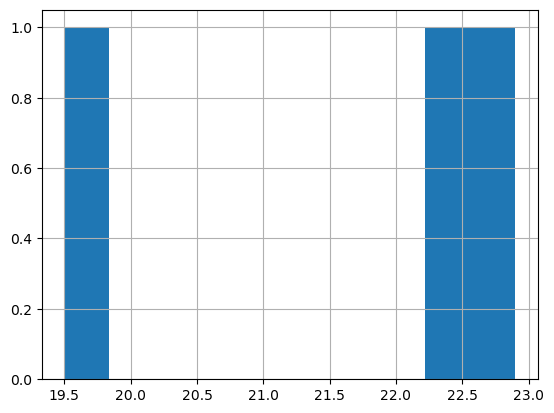

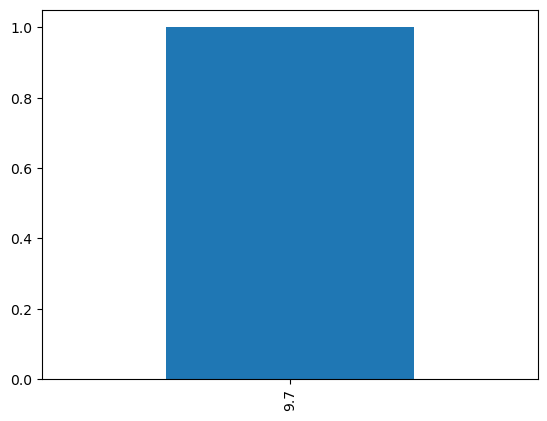

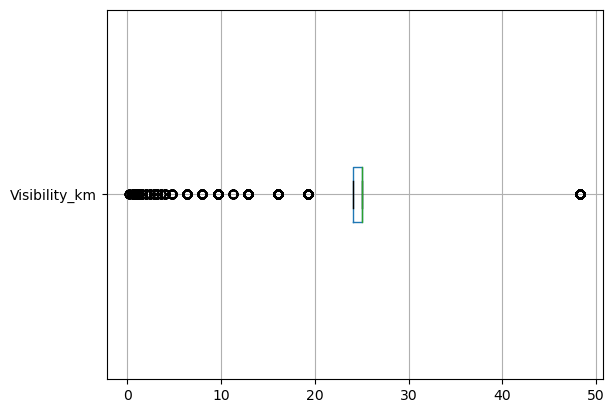

********************
Thunderstorms
moy
 24.55
Mode
 0    24.1
1    25.0
Name: Visibility_km, dtype: float64
Var
 0.4049999999999987


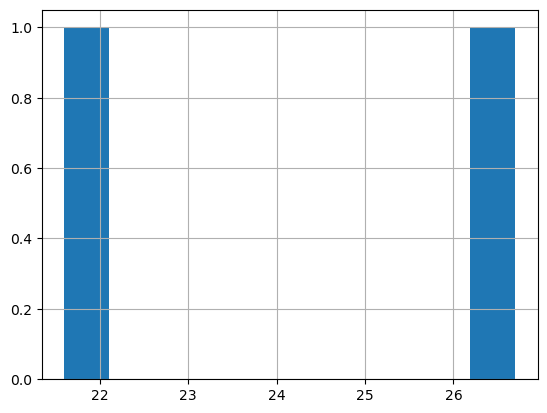

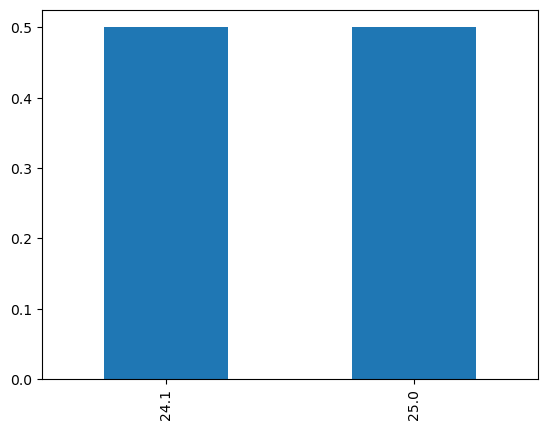

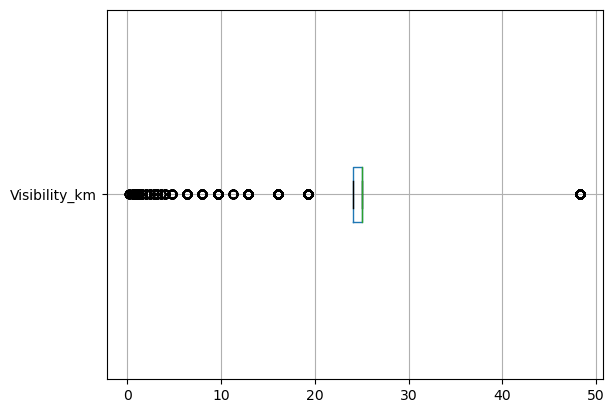

********************
Thunderstorms,Rain,Fog
moy
 4.8
Mode
 0    4.8
Name: Visibility_km, dtype: float64
Var
 nan


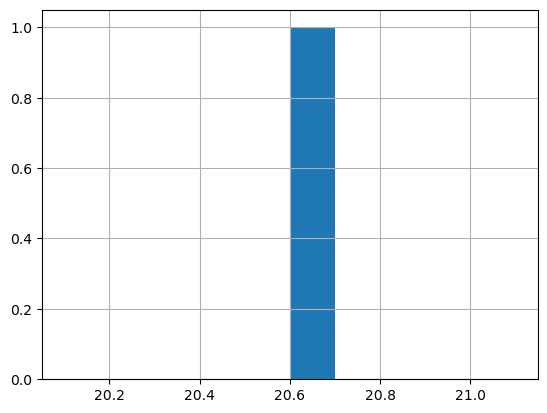

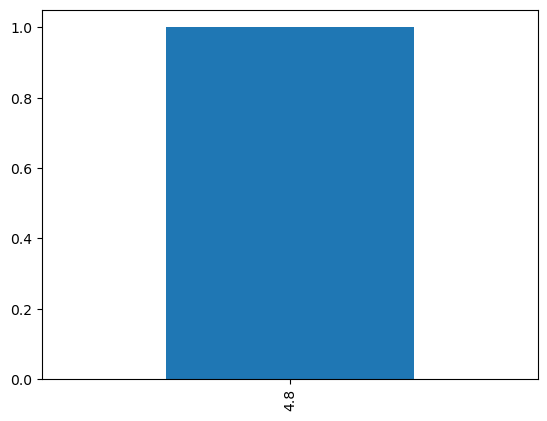

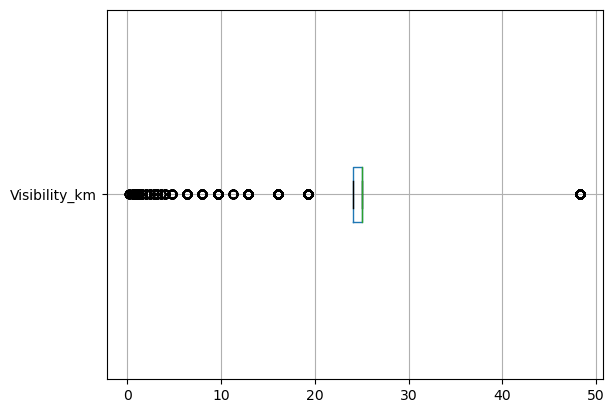

********************
Thunderstorms,Moderate Rain Showers,Fog
moy
 3.2
Mode
 0    3.2
Name: Visibility_km, dtype: float64
Var
 nan


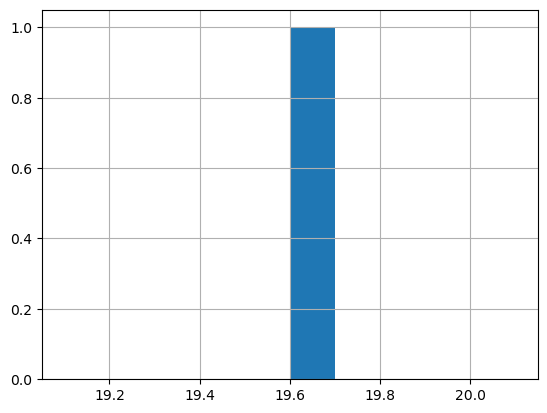

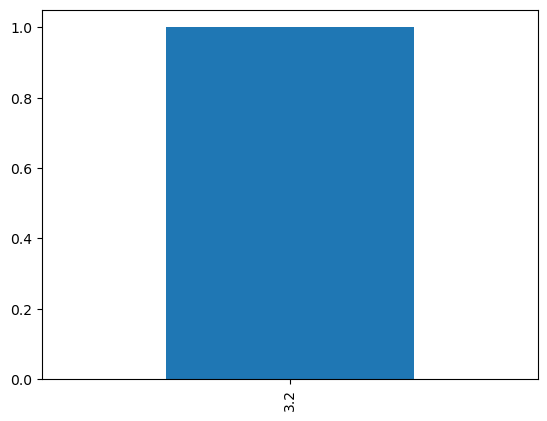

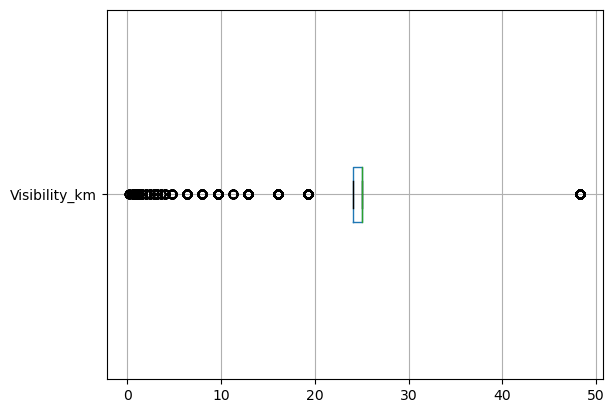

********************
Rain Showers,Fog
moy
 6.4
Mode
 0    6.4
Name: Visibility_km, dtype: float64
Var
 nan


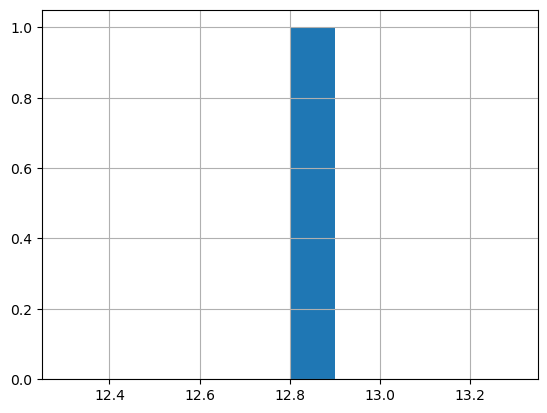

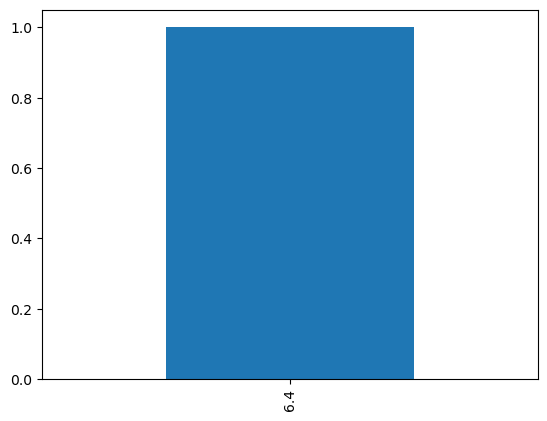

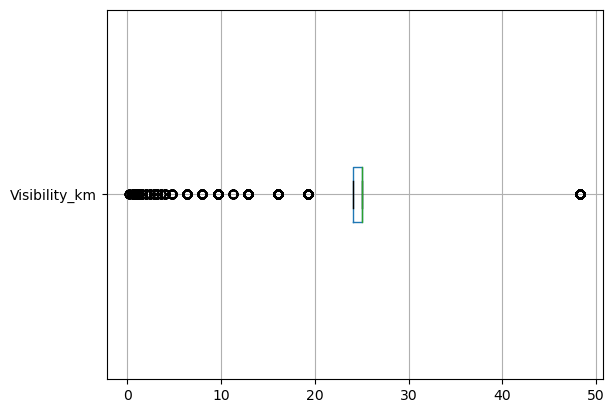

********************
Rain Showers,Snow Showers
moy
 21.700000000000003
Mode
 0    19.3
1    24.1
Name: Visibility_km, dtype: float64
Var
 11.520000000000003


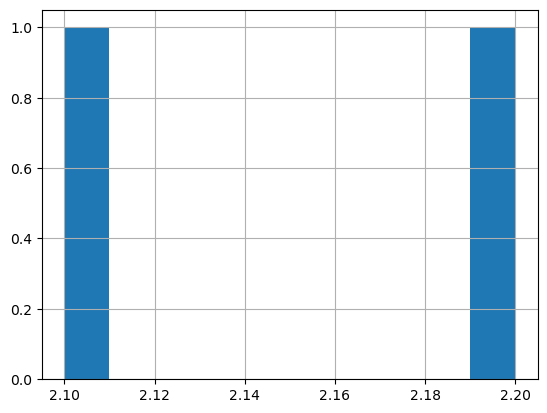

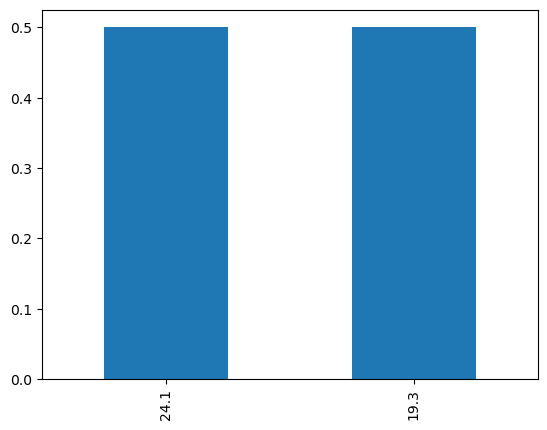

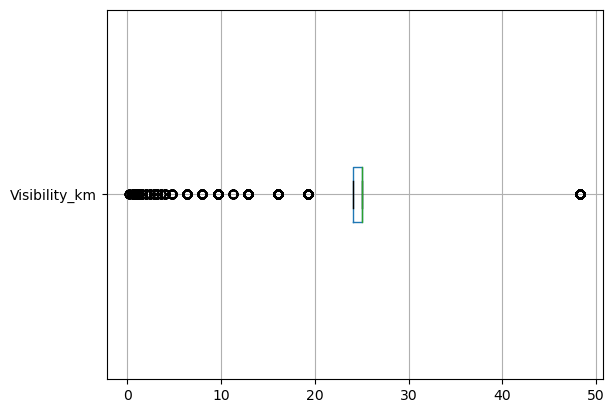

********************
Snow Pellets
moy
 2.4
Mode
 0    2.4
Name: Visibility_km, dtype: float64
Var
 nan


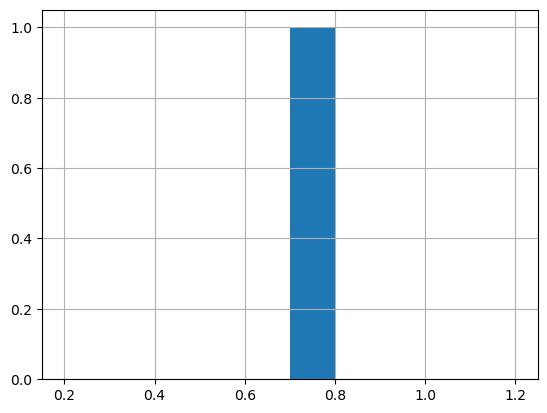

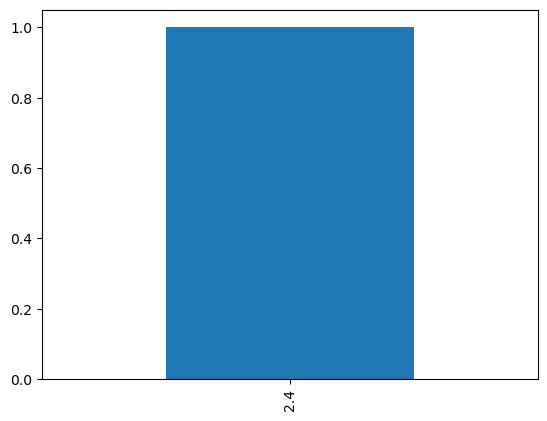

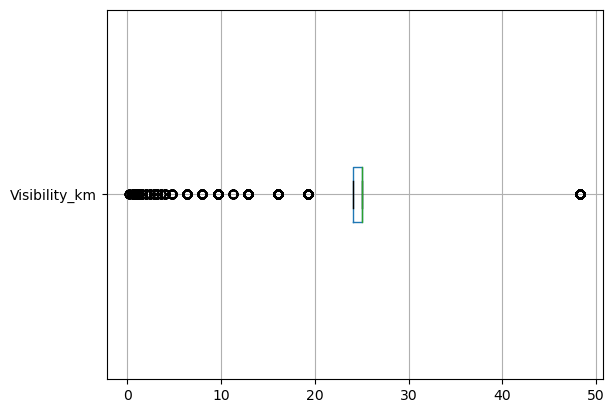

********************
Rain,Snow,Fog
moy
 6.4
Mode
 0    6.4
Name: Visibility_km, dtype: float64
Var
 nan


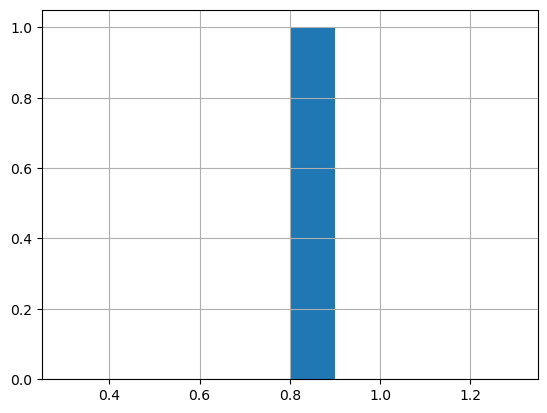

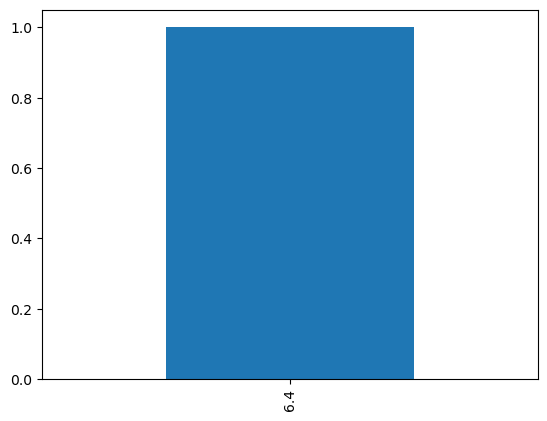

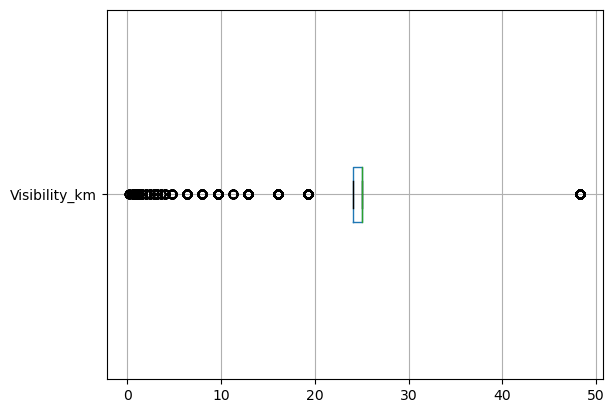

********************
Moderate Rain,Fog
moy
 6.4
Mode
 0    6.4
Name: Visibility_km, dtype: float64
Var
 nan


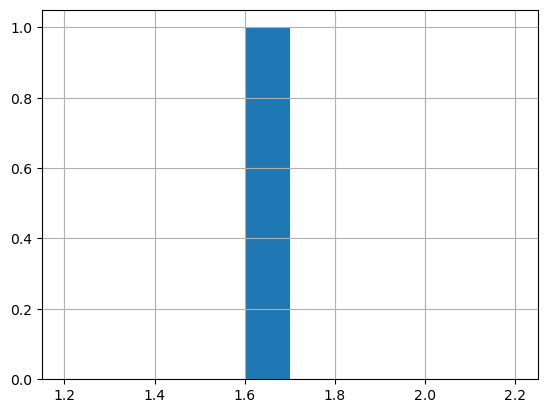

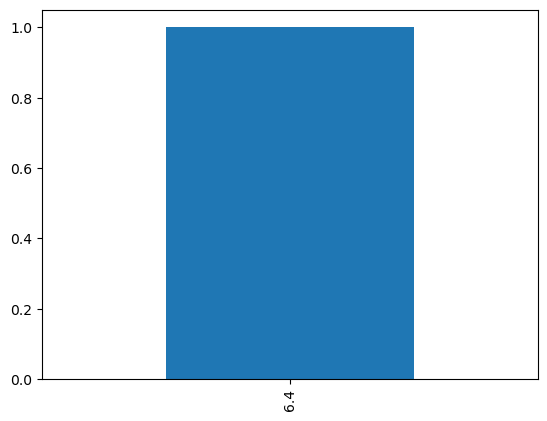

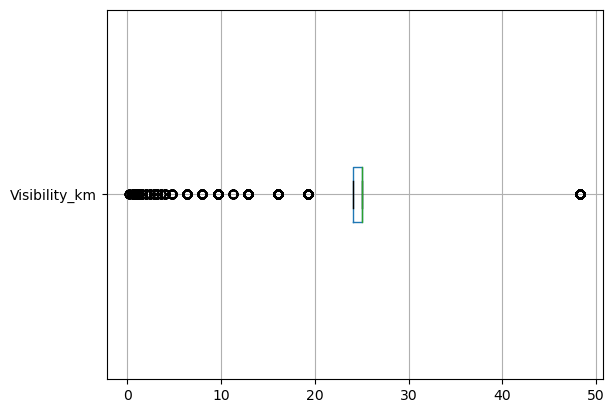

********************
Freezing Rain,Ice Pellets,Fog
moy
 8.0
Mode
 0    8.0
Name: Visibility_km, dtype: float64
Var
 nan


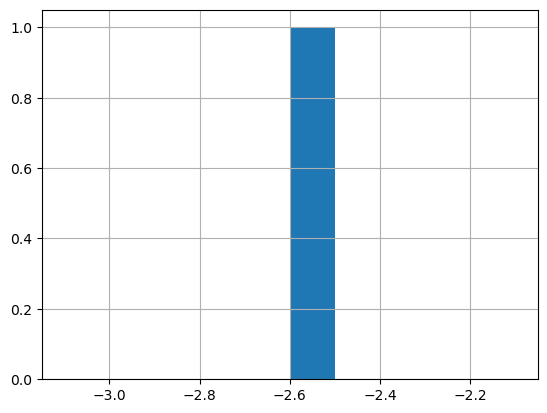

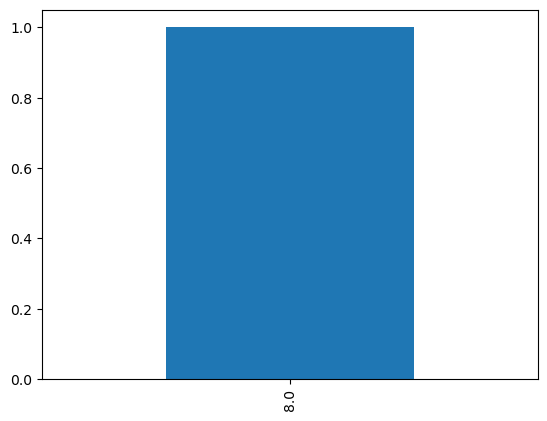

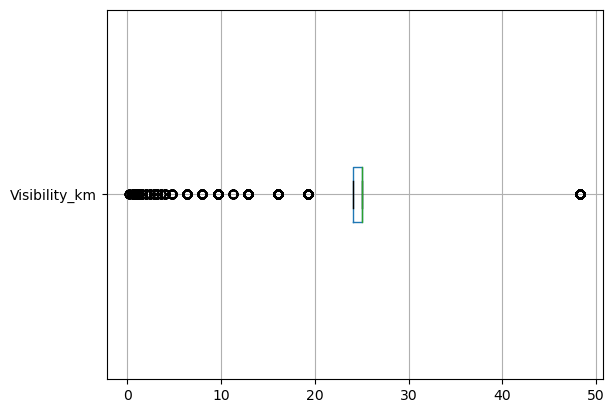

********************
Drizzle,Ice Pellets,Fog
moy
 4.0
Mode
 0    4.0
Name: Visibility_km, dtype: float64
Var
 nan


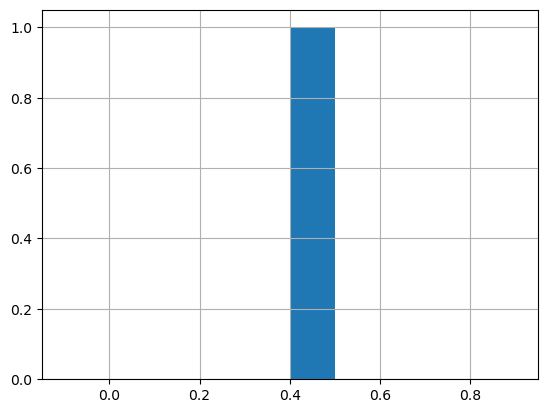

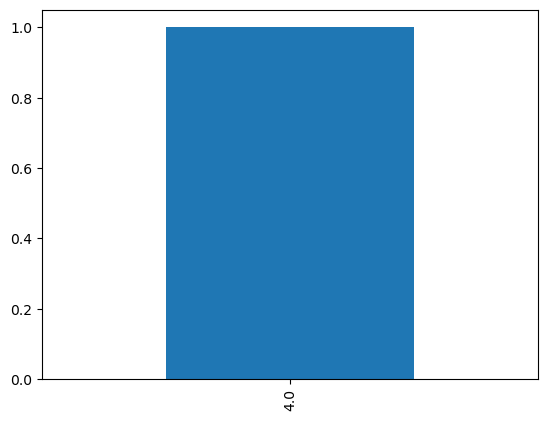

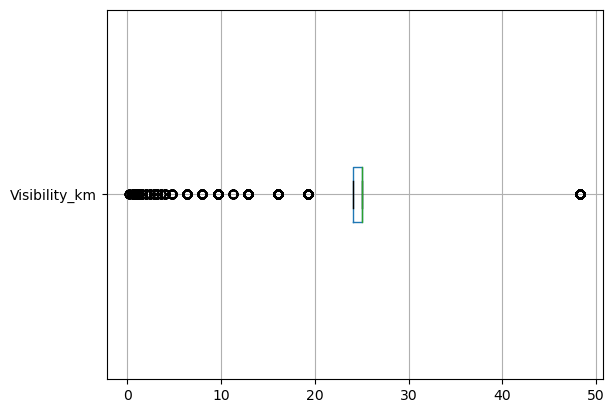

********************
Drizzle,Snow
moy
 10.5
Mode
 0     9.7
1    11.3
Name: Visibility_km, dtype: float64
Var
 1.2800000000000022


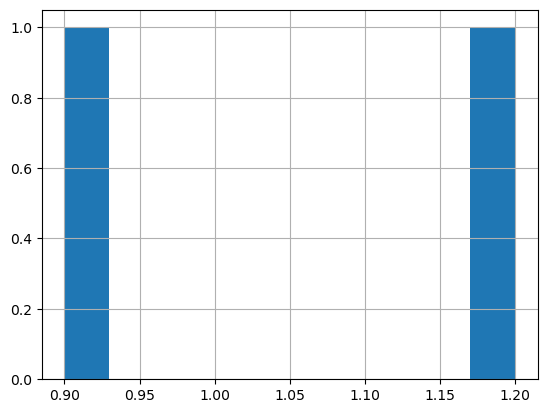

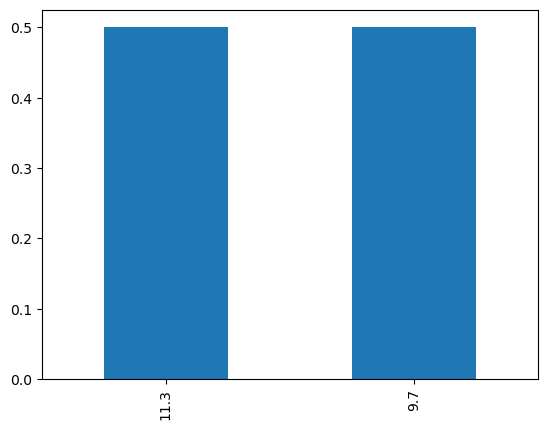

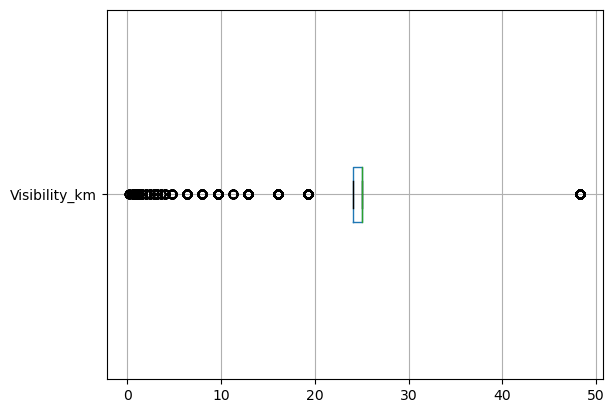

********************
Rain,Ice Pellets
moy
 9.7
Mode
 0    9.7
Name: Visibility_km, dtype: float64
Var
 nan


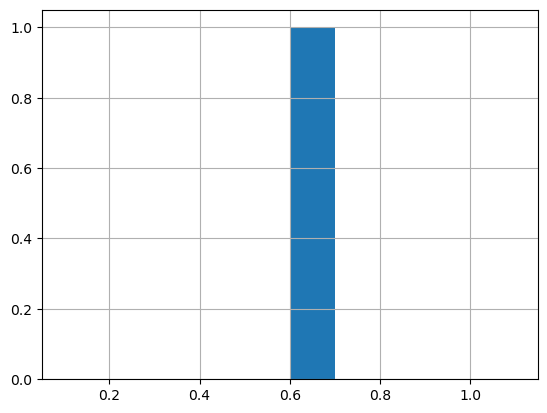

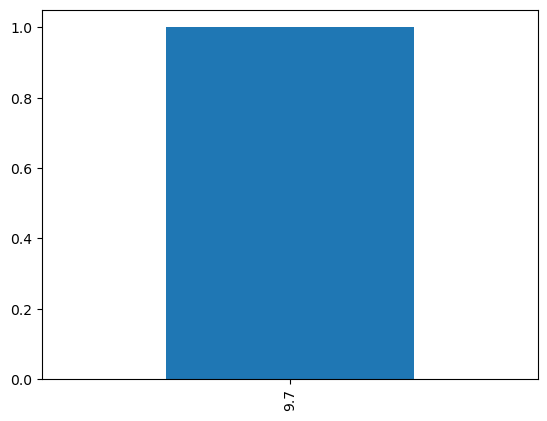

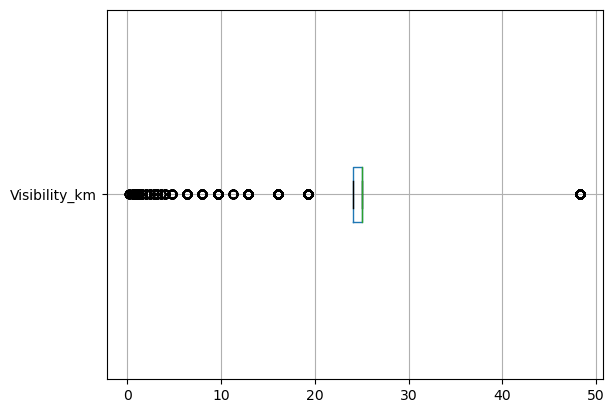

********************
Drizzle,Snow,Fog
moy
 5.5133333333333345
Mode
 0    3.2
Name: Visibility_km, dtype: float64
Var
 7.662666666666666


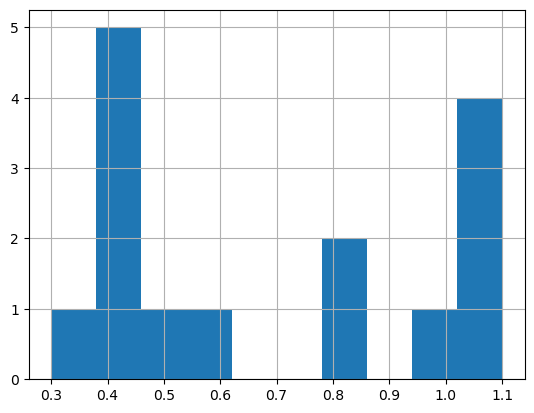

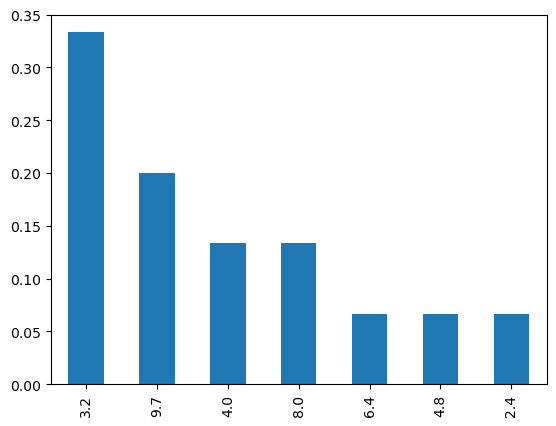

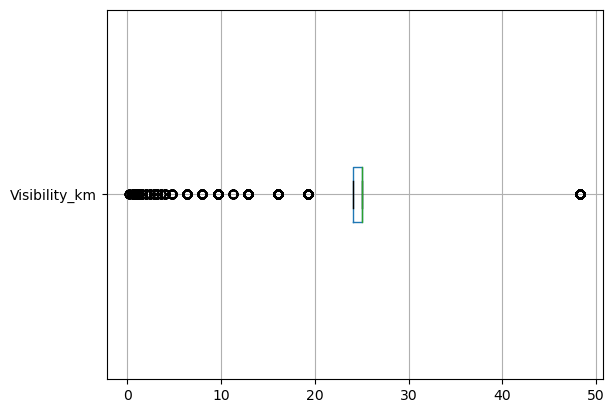

********************
Rain,Snow Grains
moy
 25.0
Mode
 0    25.0
Name: Visibility_km, dtype: float64
Var
 nan


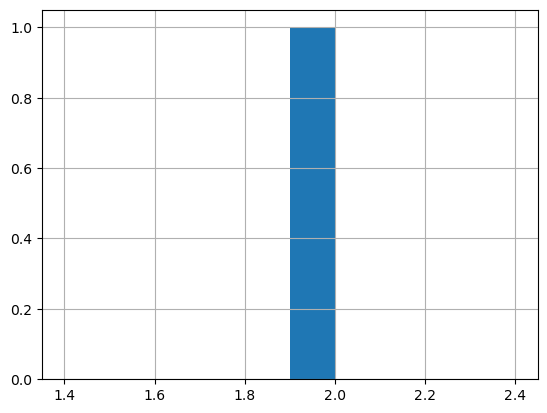

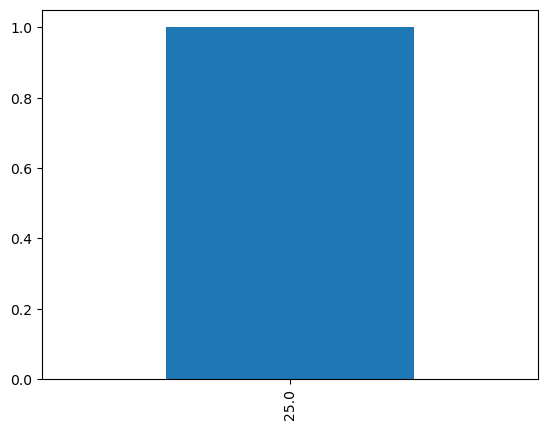

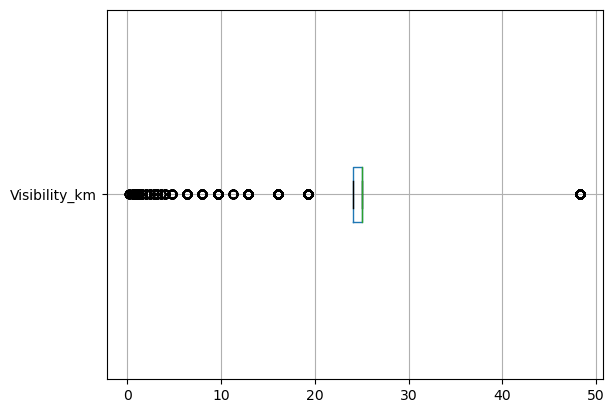

********************
Rain,Snow,Ice Pellets
moy
 6.0
Mode
 0    6.4
Name: Visibility_km, dtype: float64
Var
 0.6400000000000005


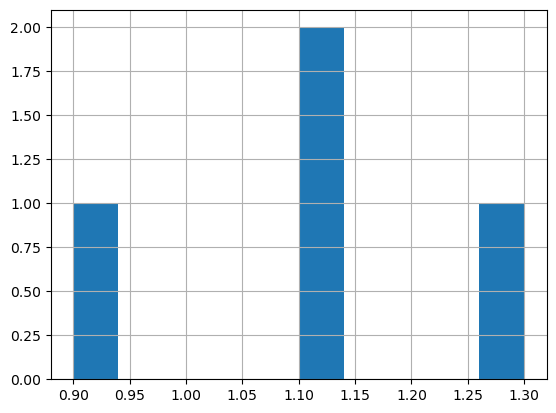

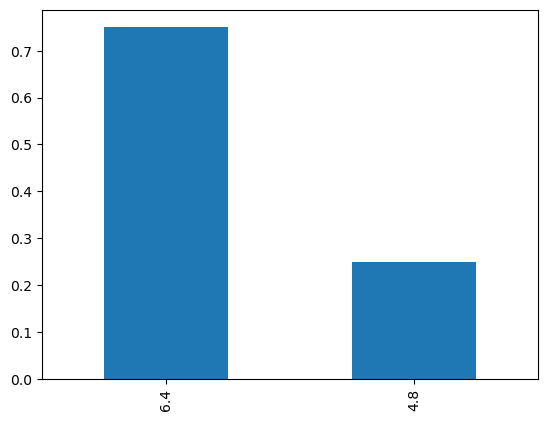

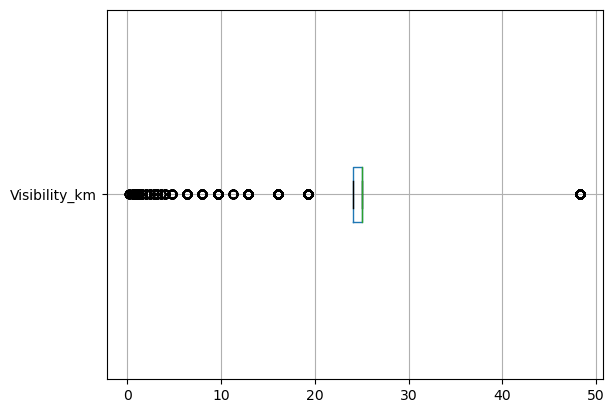

********************
Snow Showers,Fog
moy
 7.0249999999999995
Mode
 0    4.0
1    6.4
2    8.0
3    9.7
Name: Visibility_km, dtype: float64
Var
 5.882499999999998


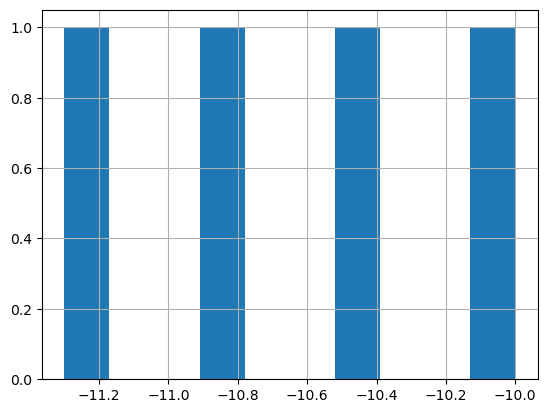

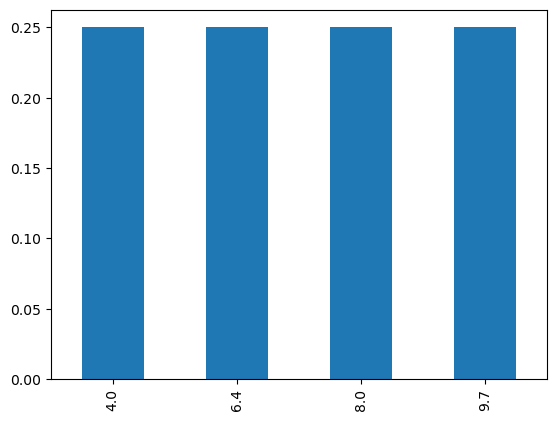

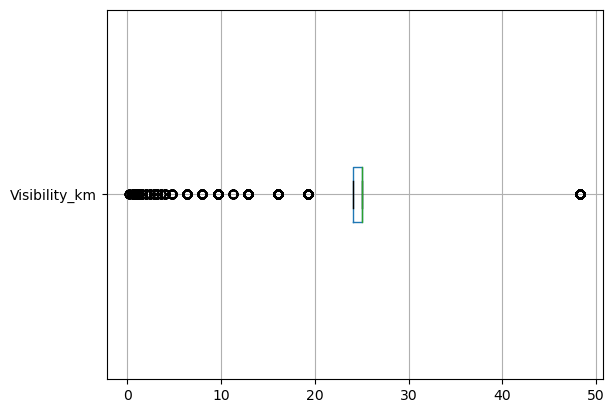

********************
Moderate Snow,Blowing Snow
moy
 0.6
Mode
 0    0.6
Name: Visibility_km, dtype: float64
Var
 0.0


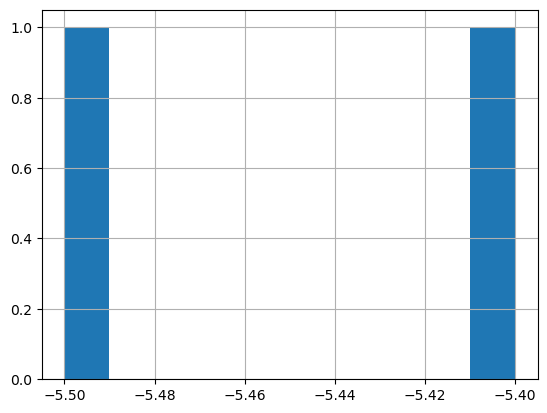

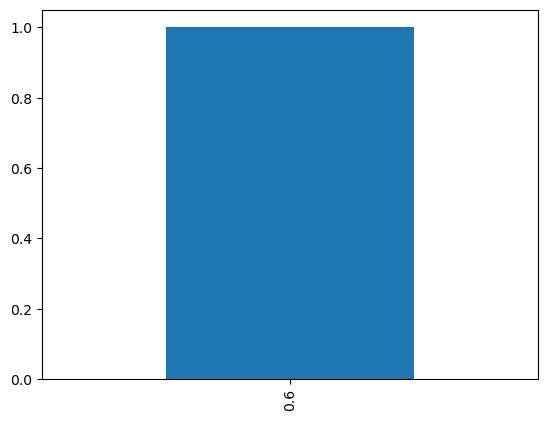

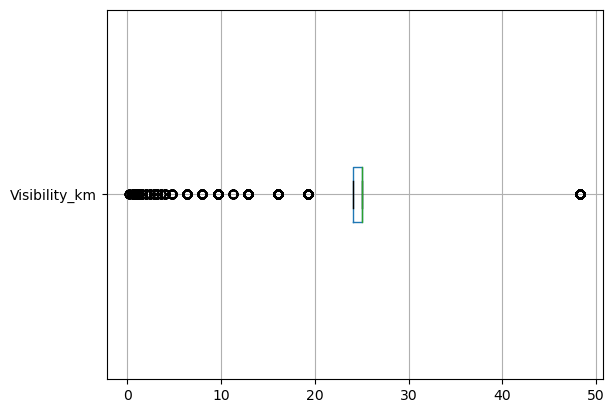

In [52]:
for Tep in data["Weather"].unique():
    subset = data[data.Weather == Tep]
    print("*"*20)
    print(Tep)
    print("moy\n",subset["Visibility_km"].mean())
    print("Mode\n",subset["Visibility_km"].mode())
    print("Var\n",subset["Visibility_km"].var())
    subset["Temp_C"].hist()
    plt.show()
    subset["Visibility_km"].value_counts(normalize = True).plot(kind = "bar")
    plt.show()
    data.boxplot(column = "Visibility_km" , vert = False)
    plt.show()

(2164, 9)
(1860, 9)


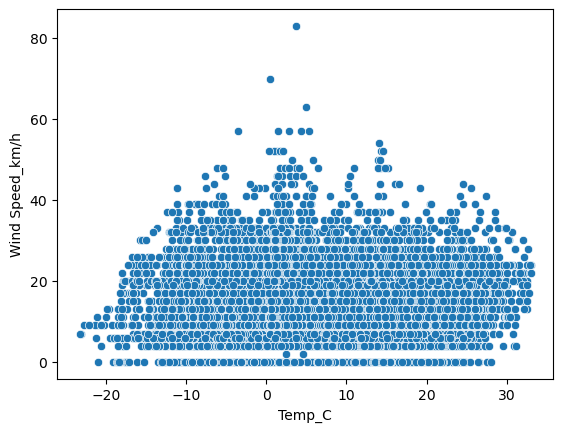

In [53]:
print(data[data["Temp_C"]<0].shape)
print(data[data["Wind Speed_km/h"] >20 ].shape)
sns.scatterplot(x="Temp_C",y="Wind Speed_km/h",data=data)
plt.show()

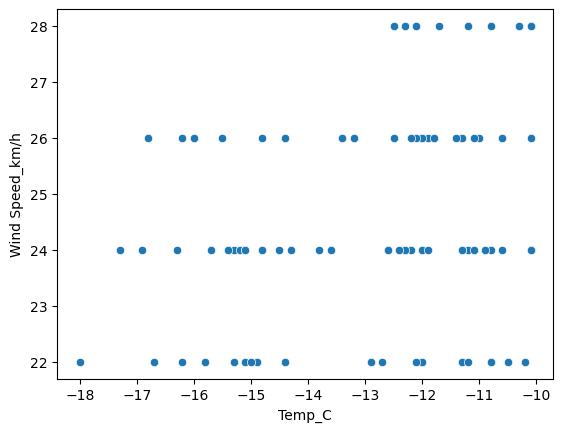

In [54]:
data1 = data[(data['Temp_C'] < -10) & (data['Temp_C'] > -20) & (data['Wind Speed_km/h'] > 20) & (data['Wind Speed_km/h'] < 30)]
sns.scatterplot(x="Temp_C",y="Wind Speed_km/h",data=data1)
plt.show()

In [55]:
data = pd.read_csv("Weather.Data.csv")
data_origine = data.copy()

In [56]:
data.head()

Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  Freezing Drizzle,Fog  
3            4.0     101.27  Freezing Drizzle,Fog  
4            4.8     101.23                   Fog